In [ ]:
#!unzip house-prices-advanced-regression-techniques.zip

## Task

Решить задачу машинного обучения с использованием фреймворка LightAutoML: подготовить данные и разделить их на обучающую и тестовую выборки, а затем обучить модель и оценить результаты.

- Загрузите датасет и подготовьте его к обучению.
Для работы используйте данные с ценами на жилье. Целевая метка — SalePrice.
- Обучите модель c использованием TabularAutoML.
- Оцените обученную модель, используя метрику MAE. МАЕ для test: ```15324.25```. МАЕ измеряется на cross-validation и на лучшей модели AutoML.
- Улучшите оценку модели, настраивая любые параметры task, presets и roles. Например, используя TabularUtilizedAutoML.


## Imports

In [ ]:
!pip install -U lightautoml==0.3.8.1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task
from lightautoml.report.report_deco import ReportDeco

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Чтение данных

In [ ]:
from google.colab import drive #Импортируем библиотеку для работы с Google Drive
drive.mount("/content/drive") #Монтируем Google-диск. После этой операции мы можем считывать файлы со своего Google-диска.

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/data/train.csv')
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

## EDA + Feature engineering

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
missing_percentage = (data.isna().sum() / len(data) * 100)
missing_percentage = missing_percentage[missing_percentage > 0]
print(missing_percentage.sort_values())

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64


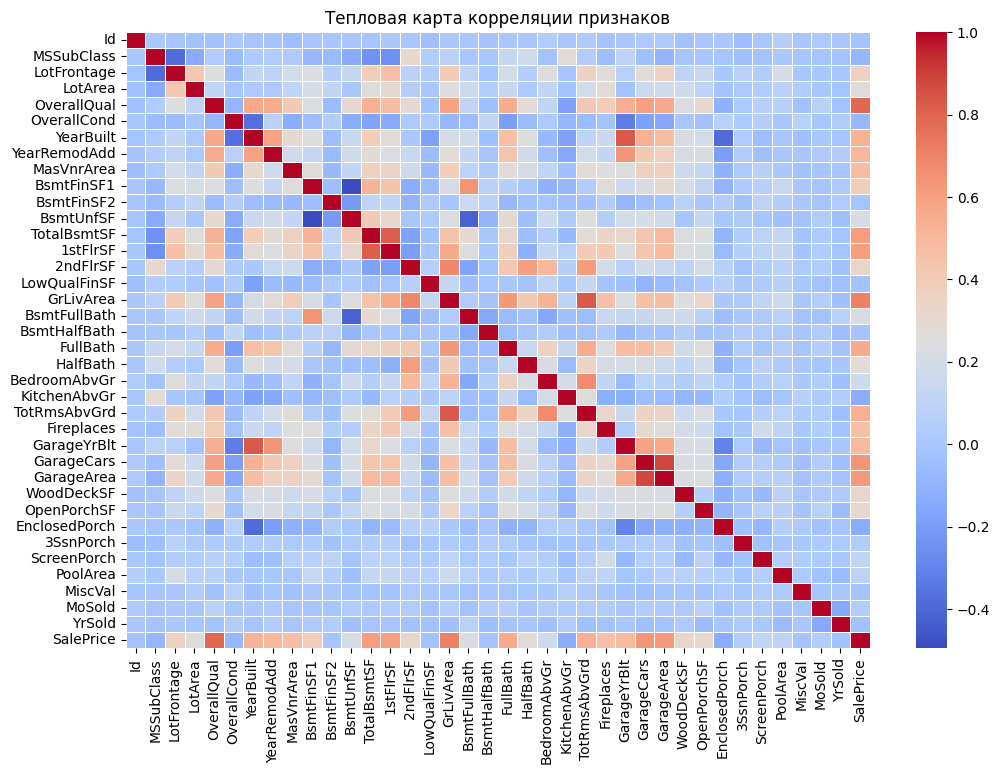

In [ ]:
# Корреляционная матрица
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='coolwarm', linewidths=0.5)
plt.title('Тепловая карта корреляции признаков')
plt.show()

In [ ]:
# удалим колонку 'Id', так как она не потребуетс япри обучении
df = data.drop('Id', axis=1)

In [ ]:
# посмотрим на распределение таргета
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Figure size 900x800 with 0 Axes>

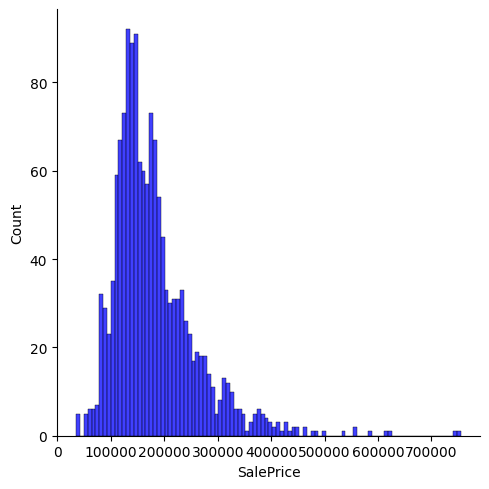

In [ ]:
plt.figure(figsize=(9, 8))
sns.displot(df['SalePrice'], color='b', bins=100)
plt.show()

In [ ]:
# посмотрим на распределение числовых данных

list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

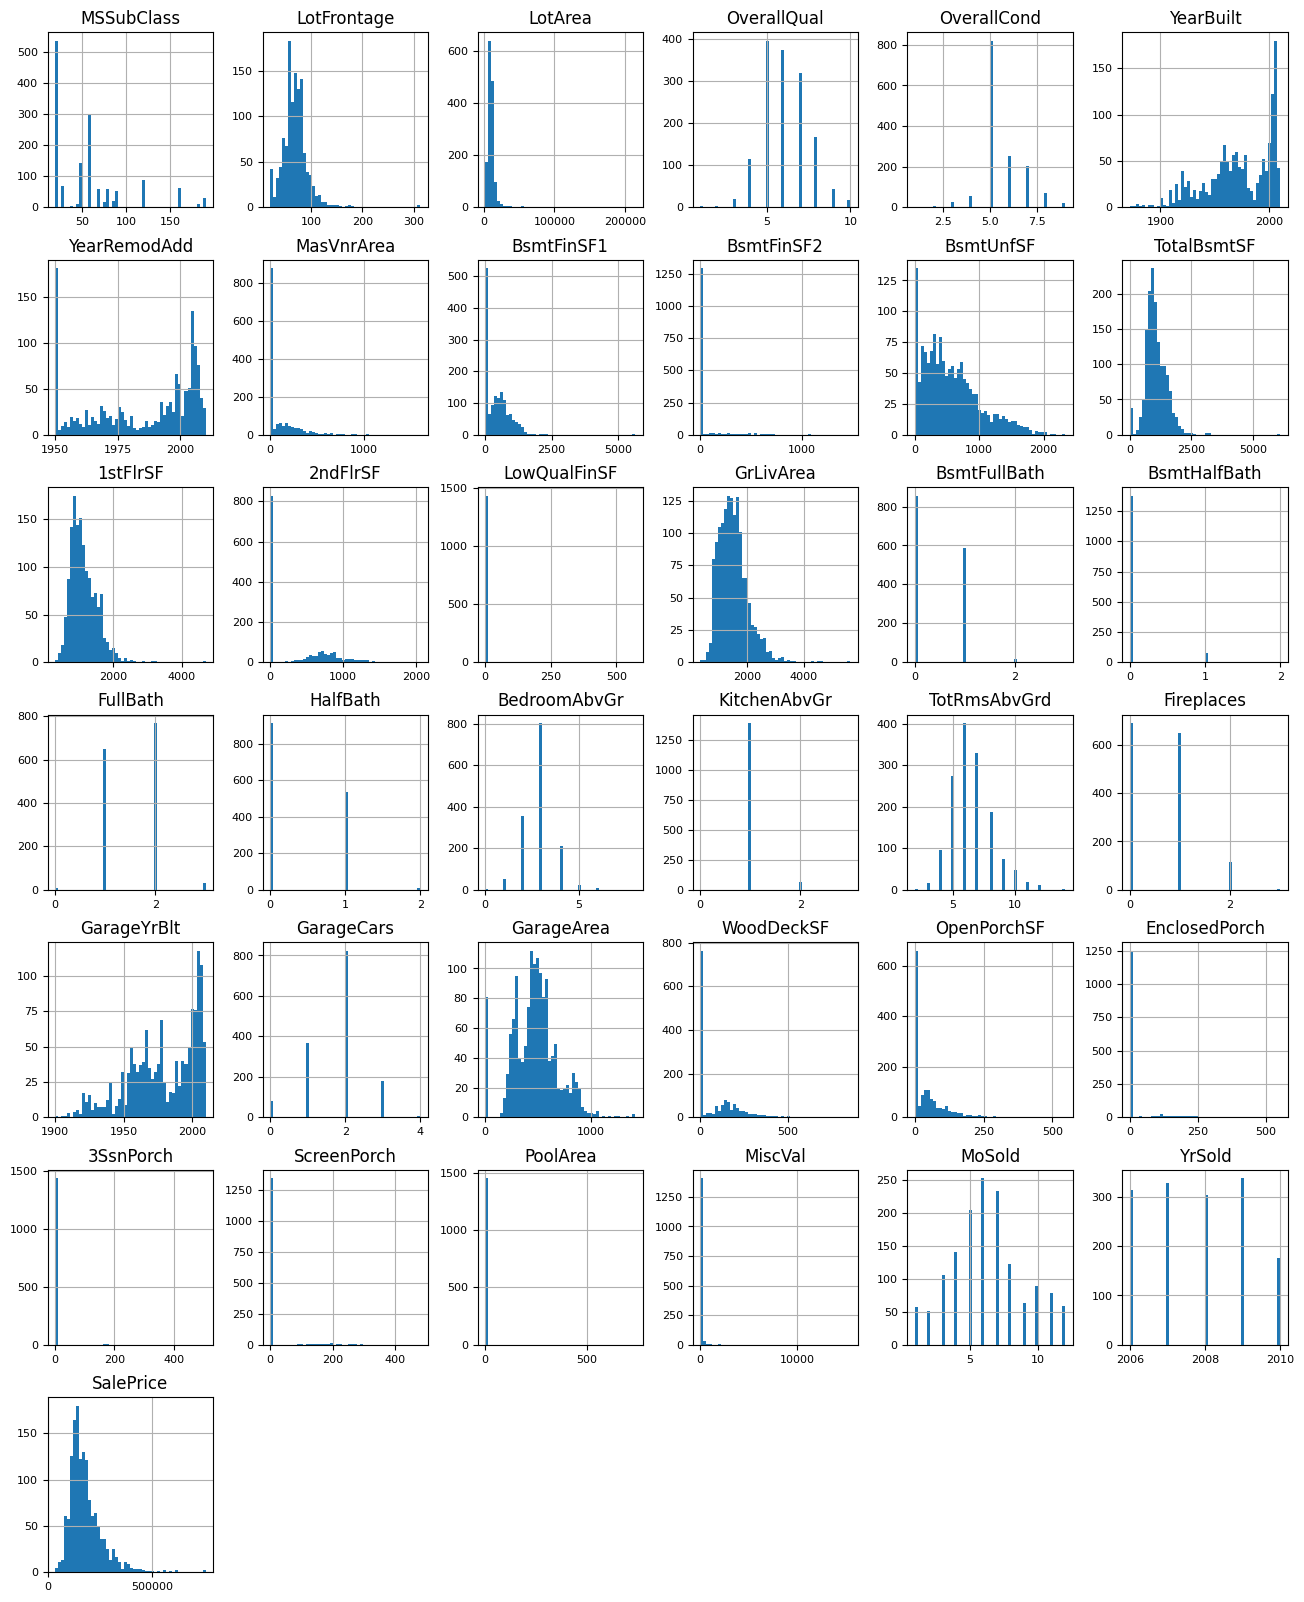

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

In [ ]:
df[['OverallQual', 'OverallCond']]

OverallQual  OverallCond
0               7            5
1               6            8
2               7            5
3               7            5
4               8            5
...           ...          ...
1455            6            5
1456            6            6
1457            7            9
1458            5            6
1459            5            6

[1460 rows x 2 columns]

In [ ]:
# создадим новую фичу Overall_sum

df['Overall_sum'] = df['OverallQual'] + df['OverallCond']

## Models + Evaluation

In [ ]:
random_state = 42

# разделим данные на train и test
train_data, test_data = train_test_split(df, test_size=0.2, random_state=random_state)

# размерности train и test
train_data.shape, test_data.shape

((1168, 81), (292, 81))

In [ ]:
# определим задачу - у нас регрессия с метрикой MAE
task = Task(name='reg', loss='mae')

# зададим целевой признак
target = 'SalePrice'

# определим роли
roles = {
    'target': target
}

timeout = 3600
threds = 4
cv = 4

In [ ]:
# Создаем модель TabularAutoML
automl = TabularAutoML(
    task = task,
    timeout = timeout,
    cpu_limit = threds,
    reader_params = {'n_jobs': threds, 'cv': cv, 'random_state': random_state}
)

# и заодно посмотрим посмотрим отчет по результатам работы бибилиотеки TabularAutoML
# создаем объект ReportDeco
RD = ReportDeco('/content/drive/MyDrive/ColabNotebooks/data/tabularAutoML_model_report')

automl_rd = RD(
    automl
)

oof_pred = automl_rd.fit_predict(train_data, roles=roles, verbose=3)

[11:39:08] Stdout logging level is INFO3.


INFO:lightautoml.automl.presets.base:Stdout logging level is INFO3.


[11:39:08] Task: reg



INFO:lightautoml.automl.presets.base:Task: reg



[11:39:08] Start automl preset with listed constraints:


INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:


[11:39:08] - time: 3600.00 seconds


INFO:lightautoml.automl.presets.base:- time: 3600.00 seconds


[11:39:08] - CPU: 4 cores


INFO:lightautoml.automl.presets.base:- CPU: 4 cores


[11:39:08] - memory: 16 GB



INFO:lightautoml.automl.presets.base:- memory: 16 GB



[11:39:08] Train data shape: (1168, 81)



INFO:lightautoml.reader.base:Train data shape: (1168, 81)



[11:39:17] Feats was rejected during automatic roles guess: []


INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []


[11:39:17] Layer 1 train process start. Time left 3591.05 secs


INFO:lightautoml.automl.base:Layer 1 train process start. Time left 3591.05 secs


[11:39:17] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105], 'embed_sizes': array([ 6, 13,  3,  2,  5,  4,  6,  5,  2,  7,  6,  8, 15,  8,  5, 25,  5,
        5,  6,  4,  5,  8,  8,  4,  5,  7,  5,  2,  9, 11,  3,  8,  5],
      dtype=int32), 'data_size': 106}


[11:39:17] ===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====


[11:39:17] Linear model: C = 1e-05 score = -6283271168.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1e-05 score = -6283271168.0


[11:39:17] Linear model: C = 5e-05 score = -6283216384.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 5e-05 score = -6283216384.0


[11:39:17] Linear model: C = 0.0001 score = -6283116544.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.0001 score = -6283116544.0


[11:39:17] Linear model: C = 0.0005 score = -6282343936.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.0005 score = -6282343936.0


[11:39:17] Linear model: C = 0.001 score = -6281342976.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.001 score = -6281342976.0


[11:39:17] Linear model: C = 0.005 score = -6273249792.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.005 score = -6273249792.0


[11:39:18] Linear model: C = 0.01 score = -6263149056.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.01 score = -6263149056.0


[11:39:18] Linear model: C = 0.05 score = -6182919168.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.05 score = -6182919168.0


[11:39:18] Linear model: C = 0.1 score = -6089120256.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.1 score = -6089120256.0


[11:39:18] Linear model: C = 0.5 score = -5364213248.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.5 score = -5364213248.0


[11:39:18] Linear model: C = 1 score = -4621856256.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1 score = -4621856256.0


[11:39:19] Linear model: C = 5 score = -2176473344.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 5 score = -2176473344.0


[11:39:19] Linear model: C = 10 score = -1595385344.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 10 score = -1595385344.0


[11:39:20] Linear model: C = 50 score = -912622144.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 50 score = -912622144.0


[11:39:20] Linear model: C = 100 score = -772494144.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 100 score = -772494144.0


[11:39:21] Linear model: C = 500 score = -676498816.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 500 score = -676498816.0


[11:39:21] Linear model: C = 1000 score = -676498752.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1000 score = -676498752.0


[11:39:21] Linear model: C = 5000 score = -676498496.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 5000 score = -676498496.0


[11:39:21] Linear model: C = 10000 score = -676498304.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 10000 score = -676498304.0


[11:39:21] Linear model: C = 50000 score = -642576896.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 50000 score = -642576896.0


[11:39:21] Linear model: C = 100000 score = -642576960.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 100000 score = -642576960.0


[11:39:21] ===== Start working with fold 1 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 1 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====


[11:39:21] Linear model: C = 1e-05 score = -38950871040.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1e-05 score = -38950871040.0


[11:39:21] Linear model: C = 5e-05 score = -6363661312.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 5e-05 score = -6363661312.0


[11:39:21] Linear model: C = 0.0001 score = -6363610624.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.0001 score = -6363610624.0


[11:39:21] Linear model: C = 0.0005 score = -6362832896.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.0005 score = -6362832896.0


[11:39:21] Linear model: C = 0.001 score = -6361772032.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.001 score = -6361772032.0


[11:39:22] Linear model: C = 0.005 score = -6353221632.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.005 score = -6353221632.0


[11:39:22] Linear model: C = 0.01 score = -6342899200.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.01 score = -6342899200.0


[11:39:22] Linear model: C = 0.05 score = -6259370496.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.05 score = -6259370496.0


[11:39:22] Linear model: C = 0.1 score = -6156563968.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.1 score = -6156563968.0


[11:39:22] Linear model: C = 0.5 score = -5389110272.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.5 score = -5389110272.0


[11:39:22] Linear model: C = 1 score = -4600568832.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1 score = -4600568832.0


[11:39:23] Linear model: C = 5 score = -2193564672.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 5 score = -2193564672.0


[11:39:23] Linear model: C = 10 score = -1614594944.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 10 score = -1614594944.0


[11:39:23] Linear model: C = 50 score = -1089732096.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 50 score = -1089732096.0


[11:39:24] Linear model: C = 100 score = -1021400128.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 100 score = -1021400128.0


[11:39:24] Linear model: C = 500 score = -1003528512.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 500 score = -1003528512.0


[11:39:24] Linear model: C = 1000 score = -1003528512.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1000 score = -1003528512.0


[11:39:25] Linear model: C = 5000 score = -1015197184.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 5000 score = -1015197184.0


[11:39:25] ===== Start working with fold 2 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 2 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====


[11:39:25] Linear model: C = 1e-05 score = -39607336960.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1e-05 score = -39607336960.0


[11:39:27] Linear model: C = 5e-05 score = -6735875584.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 5e-05 score = -6735875584.0


[11:39:27] Linear model: C = 0.0001 score = -6735825408.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.0001 score = -6735825408.0


[11:39:27] Linear model: C = 0.0005 score = -6735029760.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.0005 score = -6735029760.0


[11:39:27] Linear model: C = 0.001 score = -6733950976.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.001 score = -6733950976.0


[11:39:28] Linear model: C = 0.005 score = -6726036992.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.005 score = -6726036992.0


[11:39:28] Linear model: C = 0.01 score = -6716149760.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.01 score = -6716149760.0


[11:39:28] Linear model: C = 0.05 score = -6636216832.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.05 score = -6636216832.0


[11:39:28] Linear model: C = 0.1 score = -6538200576.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.1 score = -6538200576.0


[11:39:29] Linear model: C = 0.5 score = -5813782016.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.5 score = -5813782016.0


[11:39:29] Linear model: C = 1 score = -5095905280.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1 score = -5095905280.0


[11:39:29] Linear model: C = 5 score = -2789912832.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 5 score = -2789912832.0


[11:39:30] Linear model: C = 10 score = -2316315136.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 10 score = -2316315136.0


[11:39:30] Linear model: C = 50 score = -1920119296.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 50 score = -1920119296.0


[11:39:31] Linear model: C = 100 score = -1919384064.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 100 score = -1919384064.0


[11:39:31] Linear model: C = 500 score = -1900183296.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 500 score = -1900183296.0


[11:39:32] Linear model: C = 1000 score = -1891809792.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1000 score = -1891809792.0


[11:39:32] Linear model: C = 5000 score = -1879824000.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 5000 score = -1879824000.0


[11:39:32] Linear model: C = 10000 score = -1891030016.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 10000 score = -1891030016.0


[11:39:32] Linear model: C = 50000 score = -1891030272.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 50000 score = -1891030272.0


[11:39:32] ===== Start working with fold 3 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 3 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====


[11:39:32] Linear model: C = 1e-05 score = -37848006656.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1e-05 score = -37848006656.0


[11:39:33] Linear model: C = 5e-05 score = -5559992832.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 5e-05 score = -5559992832.0


[11:39:33] Linear model: C = 0.0001 score = -5559932416.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.0001 score = -5559932416.0


[11:39:33] Linear model: C = 0.0005 score = -5559206912.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.0005 score = -5559206912.0


[11:39:33] Linear model: C = 0.001 score = -5558316544.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.001 score = -5558316544.0


[11:39:33] Linear model: C = 0.005 score = -5550992896.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.005 score = -5550992896.0


[11:39:33] Linear model: C = 0.01 score = -5541911040.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.01 score = -5541911040.0


[11:39:33] Linear model: C = 0.05 score = -5469162496.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.05 score = -5469162496.0


[11:39:33] Linear model: C = 0.1 score = -5378899456.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.1 score = -5378899456.0


[11:39:33] Linear model: C = 0.5 score = -4717186048.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.5 score = -4717186048.0


[11:39:33] Linear model: C = 1 score = -4070319360.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1 score = -4070319360.0


[11:39:34] Linear model: C = 5 score = -1939336320.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 5 score = -1939336320.0


[11:39:34] Linear model: C = 10 score = -1405286656.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 10 score = -1405286656.0


[11:39:35] Linear model: C = 50 score = -725797824.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 50 score = -725797824.0


[11:39:35] Linear model: C = 100 score = -725797504.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 100 score = -725797504.0


[11:39:35] Linear model: C = 500 score = -482657280.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 500 score = -482657280.0


[11:39:36] Linear model: C = 1000 score = -459486208.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1000 score = -459486208.0


[11:39:36] Linear model: C = 5000 score = -447975552.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 5000 score = -447975552.0


[11:39:36] Linear model: C = 10000 score = -443502240.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 10000 score = -443502240.0


[11:39:37] Linear model: C = 50000 score = -440721408.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 50000 score = -440721408.0


[11:39:37] Linear model: C = 100000 score = -440721568.0


INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 100000 score = -440721568.0


[11:39:37] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -991662720.0


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -991662720.0


[11:39:37] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


[11:39:37] Time left 3570.62 secs



INFO:lightautoml.automl.base:Time left 3570.62 secs



[11:39:37] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.89197e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.69756e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.20417e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.94405e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.82573e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.20922e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.86963e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.59216e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.38051e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.29206e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.20568e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.13277e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.06444e+08
DEBUG:lightautoml.ml_algo.

[11:39:44] Selector_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Selector_LightGBM fitting and predicting completed


[11:39:44] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task': 'train', 'learning_rate': 0.01, 'num_leaves': 16, 'feature_fraction': 0.9, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 1, 'reg_lambda': 0.0, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 2, 'max_bin': 255, 'min_data_in_bin': 3, 'num_trees': 3000, 'early_stopping_rounds': 200, 'random_state': 42}


[11:39:44] ===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_0_LightGBM =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_0_LightGBM =====


[11:39:44] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.96529e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.75332e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.24176e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 1.01299e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.92628e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.38701e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 8.05202e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.90609e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.72567e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.63394e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.56778e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.36711e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.27356e+08
DEBUG:lightautoml.ml_algo.

[11:39:50] ===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_0_LightGBM =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_0_LightGBM =====


[11:39:50] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.91615e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.60452e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.00897e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 8.23472e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 7.53529e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 7.23592e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.06421e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 6.9761e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 6.94969e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 6.9302e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 6.91865e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 6.92583e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 6.91716e+08
DEBUG:lightautoml.ml_algo.bo

[11:39:52] ===== Start working with fold 2 for Lvl_0_Pipe_1_Mod_0_LightGBM =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 2 for Lvl_0_Pipe_1_Mod_0_LightGBM =====


[11:39:52] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 3.47487e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 2.28393e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.68311e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 1.39582e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 1.25549e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 1.18274e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 1.14811e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 1.12858e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 1.11704e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 1.10231e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 1.09561e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 1.08765e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 1.07797e+09
DEBUG:lightautoml.ml_algo.

[11:40:00] ===== Start working with fold 3 for Lvl_0_Pipe_1_Mod_0_LightGBM =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 3 for Lvl_0_Pipe_1_Mod_0_LightGBM =====


[11:40:00] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.57491e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.50326e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.0373e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 8.26439e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 7.25106e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 6.75424e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 6.49282e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 6.26867e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 6.09874e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 5.95944e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 5.78809e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 5.5694e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 5.53014e+08
DEBUG:lightautoml.ml_algo.bo

[11:40:04] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -735288640.0


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -735288640.0


[11:40:04] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed


[11:40:04] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 300.00 secs


INFO:lightautoml.ml_algo.tuning.optuna:Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 300.00 secs
INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-94f090c4-a993-4420-9398-4a2d445873c8


[11:40:04] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.79948e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.59125e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.12705e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.30877e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.49156e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.11414e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.83766e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.64844e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.5295e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.41751e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.34308e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.2517e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.22114e+08
DEBUG:lightautoml.ml_algo.bo

[11:40:12] Trial 1 with hyperparameters {'feature_fraction': 0.6872700594236812, 'num_leaves': 244, 'bagging_fraction': 0.8659969709057025, 'min_sum_hessian_in_leaf': 0.24810409748678125, 'reg_alpha': 2.5361081166471375e-07, 'reg_lambda': 2.5348407664333426e-07} scored -699043072.0 in 0:00:08.482326


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 1 with hyperparameters {'feature_fraction': 0.6872700594236812, 'num_leaves': 244, 'bagging_fraction': 0.8659969709057025, 'min_sum_hessian_in_leaf': 0.24810409748678125, 'reg_alpha': 2.5361081166471375e-07, 'reg_lambda': 2.5348407664333426e-07} scored -699043072.0 in 0:00:08.482326


[11:40:12] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.99123e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.74929e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.21545e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.86268e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.82138e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.30664e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.94113e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.75944e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.64574e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.54316e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.4232e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.28512e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.22791e+08
DEBUG:lightautoml.ml_algo.b

[11:40:16] Trial 2 with hyperparameters {'feature_fraction': 0.5290418060840998, 'num_leaves': 223, 'bagging_fraction': 0.8005575058716043, 'min_sum_hessian_in_leaf': 0.679657809075816, 'reg_alpha': 1.5320059381854043e-08, 'reg_lambda': 5.360294728728285} scored -692762176.0 in 0:00:03.685792


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 2 with hyperparameters {'feature_fraction': 0.5290418060840998, 'num_leaves': 223, 'bagging_fraction': 0.8005575058716043, 'min_sum_hessian_in_leaf': 0.679657809075816, 'reg_alpha': 1.5320059381854043e-08, 'reg_lambda': 5.360294728728285} scored -692762176.0 in 0:00:03.685792


[11:40:16] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.92708e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.70666e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.23505e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 1.02399e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 9.16671e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.71929e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 8.37153e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 8.08816e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 8.00261e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.92332e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.84729e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.72217e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.6722e+08
DEBUG:lightautoml.ml_algo.b

[11:40:24] Trial 3 with hyperparameters {'feature_fraction': 0.9162213204002109, 'num_leaves': 66, 'bagging_fraction': 0.5909124836035503, 'min_sum_hessian_in_leaf': 0.00541524411940254, 'reg_alpha': 5.472429642032198e-06, 'reg_lambda': 0.00052821153945323} scored -718548928.0 in 0:00:07.719452


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 3 with hyperparameters {'feature_fraction': 0.9162213204002109, 'num_leaves': 66, 'bagging_fraction': 0.5909124836035503, 'min_sum_hessian_in_leaf': 0.00541524411940254, 'reg_alpha': 5.472429642032198e-06, 'reg_lambda': 0.00052821153945323} scored -718548928.0 in 0:00:07.719452


[11:40:24] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.79999e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.58475e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.12377e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.27598e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.38623e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 7.97297e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.69486e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.53407e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.36981e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.31966e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.26903e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.18956e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.13641e+08
DEBUG:lightautoml.ml_algo.

[11:40:30] Trial 4 with hyperparameters {'feature_fraction': 0.7159725093210578, 'num_leaves': 85, 'bagging_fraction': 0.8059264473611898, 'min_sum_hessian_in_leaf': 0.003613894271216527, 'reg_alpha': 4.258943089524393e-06, 'reg_lambda': 1.9826980964985924e-05} scored -689915456.0 in 0:00:05.938086


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 4 with hyperparameters {'feature_fraction': 0.7159725093210578, 'num_leaves': 85, 'bagging_fraction': 0.8059264473611898, 'min_sum_hessian_in_leaf': 0.003613894271216527, 'reg_alpha': 4.258943089524393e-06, 'reg_lambda': 1.9826980964985924e-05} scored -689915456.0 in 0:00:05.938086


[11:40:30] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.90161e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.6791e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.2088e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 1.00612e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.98702e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.51684e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 8.20589e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.97612e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.80569e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.69686e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.61481e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.54613e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.46318e+08
DEBUG:lightautoml.ml_algo.bo

[11:40:34] Trial 5 with hyperparameters {'feature_fraction': 0.728034992108518, 'num_leaves': 204, 'bagging_fraction': 0.5998368910791798, 'min_sum_hessian_in_leaf': 0.11400863701127326, 'reg_alpha': 0.0021465011216654484, 'reg_lambda': 2.6185068507773707e-08} scored -713657408.0 in 0:00:04.003684


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 5 with hyperparameters {'feature_fraction': 0.728034992108518, 'num_leaves': 204, 'bagging_fraction': 0.5998368910791798, 'min_sum_hessian_in_leaf': 0.11400863701127326, 'reg_alpha': 0.0021465011216654484, 'reg_lambda': 2.6185068507773707e-08} scored -713657408.0 in 0:00:04.003684


[11:40:34] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 3.17878e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.96465e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.43395e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 1.17482e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 1.02777e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 9.40482e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 8.89348e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 8.5705e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 8.33963e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 8.13108e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 8.0171e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.85371e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.76628e+08
DEBUG:lightautoml.ml_algo.bo

[11:40:40] Trial 6 with hyperparameters {'feature_fraction': 0.8037724259507192, 'num_leaves': 56, 'bagging_fraction': 0.5325257964926398, 'min_sum_hessian_in_leaf': 6.245139574743075, 'reg_alpha': 4.905556676028774, 'reg_lambda': 0.18861495878553936} scored -701992704.0 in 0:00:06.613137


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 6 with hyperparameters {'feature_fraction': 0.8037724259507192, 'num_leaves': 56, 'bagging_fraction': 0.5325257964926398, 'min_sum_hessian_in_leaf': 6.245139574743075, 'reg_alpha': 4.905556676028774, 'reg_lambda': 0.18861495878553936} scored -701992704.0 in 0:00:06.613137


[11:40:40] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.80334e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.58322e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.11301e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.20596e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.32491e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 7.86987e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.64231e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.46227e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.35117e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.20474e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.14719e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.06952e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.04931e+08
DEBUG:lightautoml.ml_algo.

[11:40:44] Trial 7 with hyperparameters {'feature_fraction': 0.6523068845866853, 'num_leaves': 39, 'bagging_fraction': 0.8421165132560784, 'min_sum_hessian_in_leaf': 0.057624872164786026, 'reg_alpha': 1.254134495897175e-07, 'reg_lambda': 0.00028614897264046574} scored -683136640.0 in 0:00:04.110631


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 7 with hyperparameters {'feature_fraction': 0.6523068845866853, 'num_leaves': 39, 'bagging_fraction': 0.8421165132560784, 'min_sum_hessian_in_leaf': 0.057624872164786026, 'reg_alpha': 1.254134495897175e-07, 'reg_lambda': 0.00028614897264046574} scored -683136640.0 in 0:00:04.110631


[11:40:44] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.87476e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.64481e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.19685e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.87571e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.81545e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.30965e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.95865e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.7492e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.64438e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.53511e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.46617e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.39926e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.34845e+08
DEBUG:lightautoml.ml_algo.b

[11:40:52] Trial 8 with hyperparameters {'feature_fraction': 0.5171942605576092, 'num_leaves': 234, 'bagging_fraction': 0.6293899908000085, 'min_sum_hessian_in_leaf': 0.4467752817973907, 'reg_alpha': 6.388511557344611e-06, 'reg_lambda': 0.0004793052550782129} scored -692173184.0 in 0:00:07.573241


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 8 with hyperparameters {'feature_fraction': 0.5171942605576092, 'num_leaves': 234, 'bagging_fraction': 0.6293899908000085, 'min_sum_hessian_in_leaf': 0.4467752817973907, 'reg_alpha': 6.388511557344611e-06, 'reg_lambda': 0.0004793052550782129} scored -692173184.0 in 0:00:07.573241


[11:40:52] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.91788e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.70439e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.21249e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.73979e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.82435e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.38685e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 8.10282e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.94469e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.74163e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.406e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.28189e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.23054e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.20428e+08
DEBUG:lightautoml.ml_algo.bo

[11:40:58] Trial 9 with hyperparameters {'feature_fraction': 0.7733551396716398, 'num_leaves': 60, 'bagging_fraction': 0.9847923138822793, 'min_sum_hessian_in_leaf': 1.2604664585649468, 'reg_alpha': 2.854239907497756, 'reg_lambda': 1.1309571585271483} scored -688217408.0 in 0:00:05.891776


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 9 with hyperparameters {'feature_fraction': 0.7733551396716398, 'num_leaves': 60, 'bagging_fraction': 0.9847923138822793, 'min_sum_hessian_in_leaf': 1.2604664585649468, 'reg_alpha': 2.854239907497756, 'reg_lambda': 1.1309571585271483} scored -688217408.0 in 0:00:05.891776


[11:40:58] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.92739e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.68967e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.21679e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 1.01687e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 9.09695e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.55513e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 8.1626e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.87839e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.74991e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.60174e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.53569e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.4065e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.3565e+08
DEBUG:lightautoml.ml_algo.boo

[11:41:05] Trial 10 with hyperparameters {'feature_fraction': 0.7989499894055425, 'num_leaves': 237, 'bagging_fraction': 0.5442462510259598, 'min_sum_hessian_in_leaf': 0.006080390190296602, 'reg_alpha': 2.5529693461039728e-08, 'reg_lambda': 8.471746987003668e-06} scored -704061184.0 in 0:00:06.942010


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 10 with hyperparameters {'feature_fraction': 0.7989499894055425, 'num_leaves': 237, 'bagging_fraction': 0.5442462510259598, 'min_sum_hessian_in_leaf': 0.006080390190296602, 'reg_alpha': 2.5529693461039728e-08, 'reg_lambda': 8.471746987003668e-06} scored -704061184.0 in 0:00:06.942010


[11:41:05] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.91841e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.72274e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.21099e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.81865e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.7235e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.20784e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.90185e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.74696e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.61756e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.50298e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.41694e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.34203e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.29322e+08
DEBUG:lightautoml.ml_algo.b

[11:41:10] Trial 11 with hyperparameters {'feature_fraction': 0.6229610028762618, 'num_leaves': 17, 'bagging_fraction': 0.9515481201295128, 'min_sum_hessian_in_leaf': 0.024400771927662206, 'reg_alpha': 0.002507789482047843, 'reg_lambda': 0.016301353379407527} scored -694816384.0 in 0:00:05.513350


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 11 with hyperparameters {'feature_fraction': 0.6229610028762618, 'num_leaves': 17, 'bagging_fraction': 0.9515481201295128, 'min_sum_hessian_in_leaf': 0.024400771927662206, 'reg_alpha': 0.002507789482047843, 'reg_lambda': 0.016301353379407527} scored -694816384.0 in 0:00:05.513350


[11:41:10] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 3.05772e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.79728e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.30364e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 1.06708e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 9.54336e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.92317e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 8.53004e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 8.3242e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 8.07319e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.69934e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.48482e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.44137e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.40514e+08
DEBUG:lightautoml.ml_algo.b

[11:41:15] Trial 12 with hyperparameters {'feature_fraction': 0.8673512178923002, 'num_leaves': 118, 'bagging_fraction': 0.9743245943075546, 'min_sum_hessian_in_leaf': 3.105840981358399, 'reg_alpha': 8.540823200302832, 'reg_lambda': 0.01881061891210943} scored -699667392.0 in 0:00:04.672366


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 12 with hyperparameters {'feature_fraction': 0.8673512178923002, 'num_leaves': 118, 'bagging_fraction': 0.9743245943075546, 'min_sum_hessian_in_leaf': 3.105840981358399, 'reg_alpha': 8.540823200302832, 'reg_lambda': 0.01881061891210943} scored -699667392.0 in 0:00:04.672366


[11:41:16] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.98297e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.77379e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.27326e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 1.02582e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 9.07039e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.57587e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 8.23264e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 8.01159e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.84346e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.59738e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.48149e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.43494e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.39953e+08
DEBUG:lightautoml.ml_algo.

[11:41:22] Trial 13 with hyperparameters {'feature_fraction': 0.631590611326652, 'num_leaves': 26, 'bagging_fraction': 0.9009799030302936, 'min_sum_hessian_in_leaf': 0.032772539629616924, 'reg_alpha': 0.07178352731373416, 'reg_lambda': 9.61381188507591} scored -699469568.0 in 0:00:07.094107


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 13 with hyperparameters {'feature_fraction': 0.631590611326652, 'num_leaves': 26, 'bagging_fraction': 0.9009799030302936, 'min_sum_hessian_in_leaf': 0.032772539629616924, 'reg_alpha': 0.07178352731373416, 'reg_lambda': 9.61381188507591} scored -699469568.0 in 0:00:07.094107


[11:41:22] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.83045e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.64584e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.18023e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.78763e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.71344e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.24619e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.94353e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.7741e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.62813e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.54829e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.47585e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.37291e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.31636e+08
DEBUG:lightautoml.ml_algo.b

[11:41:28] Trial 14 with hyperparameters {'feature_fraction': 0.6193172323078975, 'num_leaves': 159, 'bagging_fraction': 0.7317214013361089, 'min_sum_hessian_in_leaf': 1.456609683767739, 'reg_alpha': 0.10130492013778519, 'reg_lambda': 1.5155324681197734e-05} scored -694684160.0 in 0:00:05.352131


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 14 with hyperparameters {'feature_fraction': 0.6193172323078975, 'num_leaves': 159, 'bagging_fraction': 0.7317214013361089, 'min_sum_hessian_in_leaf': 1.456609683767739, 'reg_alpha': 0.10130492013778519, 'reg_lambda': 1.5155324681197734e-05} scored -694684160.0 in 0:00:05.352131


[11:41:28] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.85525e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.6388e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.16439e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.6397e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.6912e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.25841e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.94147e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.77628e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.66976e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.55944e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.48792e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.4127e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.28772e+08
DEBUG:lightautoml.ml_algo.boos

[11:41:35] Trial 15 with hyperparameters {'feature_fraction': 0.9675883727096062, 'num_leaves': 110, 'bagging_fraction': 0.6969312335315181, 'min_sum_hessian_in_leaf': 0.024260608958544427, 'reg_alpha': 0.0001802570422237294, 'reg_lambda': 0.010120698664942722} scored -703865024.0 in 0:00:06.891150


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 15 with hyperparameters {'feature_fraction': 0.9675883727096062, 'num_leaves': 110, 'bagging_fraction': 0.6969312335315181, 'min_sum_hessian_in_leaf': 0.024260608958544427, 'reg_alpha': 0.0001802570422237294, 'reg_lambda': 0.010120698664942722} scored -703865024.0 in 0:00:06.891150


[11:41:35] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.85611e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.63059e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.14464e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.51465e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.62046e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.21206e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.93835e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.75968e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.67841e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.56507e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.37741e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.33091e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.28426e+08
DEBUG:lightautoml.ml_algo.

[11:41:40] Trial 16 with hyperparameters {'feature_fraction': 0.82120682356946, 'num_leaves': 46, 'bagging_fraction': 0.8933089301490281, 'min_sum_hessian_in_leaf': 0.08770357148364596, 'reg_alpha': 0.19329039126385797, 'reg_lambda': 0.6763370807232384} scored -710496640.0 in 0:00:05.041848


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 16 with hyperparameters {'feature_fraction': 0.82120682356946, 'num_leaves': 46, 'bagging_fraction': 0.8933089301490281, 'min_sum_hessian_in_leaf': 0.08770357148364596, 'reg_alpha': 0.19329039126385797, 'reg_lambda': 0.6763370807232384} scored -710496640.0 in 0:00:05.041848


[11:41:40] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.75894e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.57002e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.11021e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.38737e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.44165e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.02538e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.87539e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.72553e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.63113e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.52315e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.4156e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.38694e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.32338e+08
DEBUG:lightautoml.ml_algo.b

[11:41:49] Trial 17 with hyperparameters {'feature_fraction': 0.6654564209034074, 'num_leaves': 88, 'bagging_fraction': 0.9970140272197909, 'min_sum_hessian_in_leaf': 9.63979853269097, 'reg_alpha': 0.0001240323453231823, 'reg_lambda': 9.55778458076705e-05} scored -700641984.0 in 0:00:09.516624


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 17 with hyperparameters {'feature_fraction': 0.6654564209034074, 'num_leaves': 88, 'bagging_fraction': 0.9970140272197909, 'min_sum_hessian_in_leaf': 9.63979853269097, 'reg_alpha': 0.0001240323453231823, 'reg_lambda': 9.55778458076705e-05} scored -700641984.0 in 0:00:09.516624


[11:41:49] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.77193e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.57855e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.10781e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.05763e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.16213e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 7.80368e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.4876e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.34759e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.21117e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.11844e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.05515e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.01951e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 6.98135e+08
DEBUG:lightautoml.ml_algo.b

[11:41:54] Trial 18 with hyperparameters {'feature_fraction': 0.5712570490453718, 'num_leaves': 158, 'bagging_fraction': 0.8035089623026216, 'min_sum_hessian_in_leaf': 1.4211115566707067, 'reg_alpha': 5.482417813288472e-07, 'reg_lambda': 6.057573596368527e-07} scored -676514176.0 in 0:00:05.006271


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 18 with hyperparameters {'feature_fraction': 0.5712570490453718, 'num_leaves': 158, 'bagging_fraction': 0.8035089623026216, 'min_sum_hessian_in_leaf': 1.4211115566707067, 'reg_alpha': 5.482417813288472e-07, 'reg_lambda': 6.057573596368527e-07} scored -676514176.0 in 0:00:05.006271


[11:41:54] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.80565e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.58251e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.12004e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.40848e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.44318e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.05618e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.75737e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.56281e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.42956e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.3684e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.31251e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.28434e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.20956e+08
DEBUG:lightautoml.ml_algo.b

[11:42:03] Trial 19 with hyperparameters {'feature_fraction': 0.56391216214132, 'num_leaves': 165, 'bagging_fraction': 0.8093748947929323, 'min_sum_hessian_in_leaf': 0.09344028792207693, 'reg_alpha': 1.8804343456734505e-07, 'reg_lambda': 5.332451778371549e-07} scored -692339968.0 in 0:00:08.902819


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 19 with hyperparameters {'feature_fraction': 0.56391216214132, 'num_leaves': 165, 'bagging_fraction': 0.8093748947929323, 'min_sum_hessian_in_leaf': 0.09344028792207693, 'reg_alpha': 1.8804343456734505e-07, 'reg_lambda': 5.332451778371549e-07} scored -692339968.0 in 0:00:08.902819


[11:42:03] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.82657e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.62542e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.15855e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.65493e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.61904e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.09472e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.80219e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.59454e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.45242e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.35147e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.29803e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.18518e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.12705e+08
DEBUG:lightautoml.ml_algo.

[11:42:09] Trial 20 with hyperparameters {'feature_fraction': 0.5716602373034152, 'num_leaves': 177, 'bagging_fraction': 0.7495051078557746, 'min_sum_hessian_in_leaf': 0.31914768556465484, 'reg_alpha': 3.4144383353918687e-07, 'reg_lambda': 8.197345997313042e-07} scored -682134720.0 in 0:00:05.492950


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 20 with hyperparameters {'feature_fraction': 0.5716602373034152, 'num_leaves': 177, 'bagging_fraction': 0.7495051078557746, 'min_sum_hessian_in_leaf': 0.31914768556465484, 'reg_alpha': 3.4144383353918687e-07, 'reg_lambda': 8.197345997313042e-07} scored -682134720.0 in 0:00:05.492950


[11:42:09] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.85588e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.6373e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.18755e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.84556e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.90984e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.42291e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 8.08342e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.90081e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.78798e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.69907e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.59149e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.51628e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.4104e+08
DEBUG:lightautoml.ml_algo.bo

[11:42:21] Trial 21 with hyperparameters {'feature_fraction': 0.5718639453487053, 'num_leaves': 185, 'bagging_fraction': 0.6830580245933595, 'min_sum_hessian_in_leaf': 0.2503590977010438, 'reg_alpha': 1.0025757876059058e-06, 'reg_lambda': 1.6340250254137068e-08} scored -703350592.0 in 0:00:12.245726


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 21 with hyperparameters {'feature_fraction': 0.5718639453487053, 'num_leaves': 185, 'bagging_fraction': 0.6830580245933595, 'min_sum_hessian_in_leaf': 0.2503590977010438, 'reg_alpha': 1.0025757876059058e-06, 'reg_lambda': 1.6340250254137068e-08} scored -703350592.0 in 0:00:12.245726


[11:42:21] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.79573e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.60479e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.14258e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.49028e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.47504e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 7.98924e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.64426e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.48583e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.32599e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.21849e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.1513e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.09516e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.03699e+08
DEBUG:lightautoml.ml_algo.b

[11:42:43] Trial 22 with hyperparameters {'feature_fraction': 0.5734902149187054, 'num_leaves': 144, 'bagging_fraction': 0.7598833582304323, 'min_sum_hessian_in_leaf': 1.802913216152521, 'reg_alpha': 1.1028865184389958e-07, 'reg_lambda': 1.0025764148514758e-06} scored -680558336.0 in 0:00:21.639306


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 22 with hyperparameters {'feature_fraction': 0.5734902149187054, 'num_leaves': 144, 'bagging_fraction': 0.7598833582304323, 'min_sum_hessian_in_leaf': 1.802913216152521, 'reg_alpha': 1.1028865184389958e-07, 'reg_lambda': 1.0025764148514758e-06} scored -680558336.0 in 0:00:21.639306


[11:42:43] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.75867e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.5974e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.13598e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.58155e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.55014e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.09513e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.82877e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.61549e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.46954e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.38499e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.28283e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.2017e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.14037e+08
DEBUG:lightautoml.ml_algo.bo

[11:42:50] Trial 23 with hyperparameters {'feature_fraction': 0.5821778105737762, 'num_leaves': 140, 'bagging_fraction': 0.7568201880121567, 'min_sum_hessian_in_leaf': 3.1329760231008987, 'reg_alpha': 1.074138891085584e-06, 'reg_lambda': 1.0675030079527693e-06} scored -684115712.0 in 0:00:07.369943


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 23 with hyperparameters {'feature_fraction': 0.5821778105737762, 'num_leaves': 140, 'bagging_fraction': 0.7568201880121567, 'min_sum_hessian_in_leaf': 3.1329760231008987, 'reg_alpha': 1.074138891085584e-06, 'reg_lambda': 1.0675030079527693e-06} scored -684115712.0 in 0:00:07.369943


[11:42:50] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.79697e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.5983e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.15682e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.71125e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.63871e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.18473e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.90048e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.71649e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.59615e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.48665e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.41209e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.31307e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.27705e+08
DEBUG:lightautoml.ml_algo.b

[11:43:00] Trial 24 with hyperparameters {'feature_fraction': 0.5026486160226129, 'num_leaves': 187, 'bagging_fraction': 0.750127730097361, 'min_sum_hessian_in_leaf': 1.5487859555578103, 'reg_alpha': 2.6010281931010144e-05, 'reg_lambda': 1.496048157395328e-07} scored -691486400.0 in 0:00:10.376528


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 24 with hyperparameters {'feature_fraction': 0.5026486160226129, 'num_leaves': 187, 'bagging_fraction': 0.750127730097361, 'min_sum_hessian_in_leaf': 1.5487859555578103, 'reg_alpha': 2.6010281931010144e-05, 'reg_lambda': 1.496048157395328e-07} scored -691486400.0 in 0:00:10.376528


[11:43:00] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.81937e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.61623e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.1562e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.46004e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.55153e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.02955e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.72286e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.55242e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.46391e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.34608e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.27001e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.18867e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.11078e+08
DEBUG:lightautoml.ml_algo.b

[11:43:05] Trial 25 with hyperparameters {'feature_fraction': 0.5818622905448765, 'num_leaves': 144, 'bagging_fraction': 0.6844343145733532, 'min_sum_hessian_in_leaf': 0.4972364851232088, 'reg_alpha': 4.621089446253056e-08, 'reg_lambda': 2.117913207132817e-06} scored -683777600.0 in 0:00:04.228098


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 25 with hyperparameters {'feature_fraction': 0.5818622905448765, 'num_leaves': 144, 'bagging_fraction': 0.6844343145733532, 'min_sum_hessian_in_leaf': 0.4972364851232088, 'reg_alpha': 4.621089446253056e-08, 'reg_lambda': 2.117913207132817e-06} scored -683777600.0 in 0:00:04.228098


[11:43:05] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.78929e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.59202e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.14698e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.52277e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.60874e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.21894e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.9409e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.76615e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.60588e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.47688e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.36028e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.2622e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.22964e+08
DEBUG:lightautoml.ml_algo.bo

[11:43:12] Trial 26 with hyperparameters {'feature_fraction': 0.5476387209848578, 'num_leaves': 174, 'bagging_fraction': 0.775625623854605, 'min_sum_hessian_in_leaf': 3.5371694712898414, 'reg_alpha': 6.747025983175082e-07, 'reg_lambda': 1.0304155071008631e-07} scored -696281600.0 in 0:00:07.910394


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 26 with hyperparameters {'feature_fraction': 0.5476387209848578, 'num_leaves': 174, 'bagging_fraction': 0.775625623854605, 'min_sum_hessian_in_leaf': 3.5371694712898414, 'reg_alpha': 6.747025983175082e-07, 'reg_lambda': 1.0304155071008631e-07} scored -696281600.0 in 0:00:07.910394


[11:43:13] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.8332e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.64807e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.16811e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.55463e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.58823e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.17667e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.831e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.67961e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.50591e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.39496e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.33606e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.23035e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.10833e+08
DEBUG:lightautoml.ml_algo.boo

[11:43:17] Trial 27 with hyperparameters {'feature_fraction': 0.6953867167967416, 'num_leaves': 119, 'bagging_fraction': 0.7142942731344918, 'min_sum_hessian_in_leaf': 0.2050223211680349, 'reg_alpha': 3.0589223080984364e-05, 'reg_lambda': 5.7625793724134645e-06} scored -679838272.0 in 0:00:04.967351


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 27 with hyperparameters {'feature_fraction': 0.6953867167967416, 'num_leaves': 119, 'bagging_fraction': 0.7142942731344918, 'min_sum_hessian_in_leaf': 0.2050223211680349, 'reg_alpha': 3.0589223080984364e-05, 'reg_lambda': 5.7625793724134645e-06} scored -679838272.0 in 0:00:04.967351


[11:43:18] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.84889e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.64802e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.1854e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.86163e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.81898e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.27053e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.94982e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.7084e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.54793e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.47484e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.4376e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.41044e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.32372e+08
DEBUG:lightautoml.ml_algo.boo

[11:43:22] Trial 28 with hyperparameters {'feature_fraction': 0.6869241487988196, 'num_leaves': 119, 'bagging_fraction': 0.65477426123904, 'min_sum_hessian_in_leaf': 0.8718417090996203, 'reg_alpha': 2.7217278948374945e-05, 'reg_lambda': 3.853626996247435e-06} scored -695652736.0 in 0:00:04.109183


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 28 with hyperparameters {'feature_fraction': 0.6869241487988196, 'num_leaves': 119, 'bagging_fraction': 0.65477426123904, 'min_sum_hessian_in_leaf': 0.8718417090996203, 'reg_alpha': 2.7217278948374945e-05, 'reg_lambda': 3.853626996247435e-06} scored -695652736.0 in 0:00:04.109183


[11:43:22] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.84298e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.64873e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.19421e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.79605e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.78184e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.32426e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 8.00366e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.866e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.73279e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.63067e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.56367e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.46207e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.30065e+08
DEBUG:lightautoml.ml_algo.bo

[11:43:28] Trial 29 with hyperparameters {'feature_fraction': 0.7344746401702463, 'num_leaves': 96, 'bagging_fraction': 0.7177458283419875, 'min_sum_hessian_in_leaf': 0.17966114902022146, 'reg_alpha': 0.0006535251464604664, 'reg_lambda': 6.431218379866017e-05} scored -708928064.0 in 0:00:06.672150


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 29 with hyperparameters {'feature_fraction': 0.7344746401702463, 'num_leaves': 96, 'bagging_fraction': 0.7177458283419875, 'min_sum_hessian_in_leaf': 0.17966114902022146, 'reg_alpha': 0.0006535251464604664, 'reg_lambda': 6.431218379866017e-05} scored -708928064.0 in 0:00:06.672150


[11:43:28] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.79513e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.58383e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.12807e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.4923e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.48577e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.07537e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.83146e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.69091e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.5473e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.48388e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.40265e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.33334e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.29881e+08
DEBUG:lightautoml.ml_algo.bo

[11:43:33] Trial 30 with hyperparameters {'feature_fraction': 0.6903079196274335, 'num_leaves': 129, 'bagging_fraction': 0.8553710198056813, 'min_sum_hessian_in_leaf': 0.0013030133773607152, 'reg_alpha': 2.0612233109746236e-05, 'reg_lambda': 6.754709621777275e-08} scored -710184256.0 in 0:00:04.882514


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 30 with hyperparameters {'feature_fraction': 0.6903079196274335, 'num_leaves': 129, 'bagging_fraction': 0.8553710198056813, 'min_sum_hessian_in_leaf': 0.0013030133773607152, 'reg_alpha': 2.0612233109746236e-05, 'reg_lambda': 6.754709621777275e-08} scored -710184256.0 in 0:00:04.882514


[11:43:33] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.79984e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.58273e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.12784e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.24621e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.3534e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.00536e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.71598e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.55605e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.40726e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.277e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.23552e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.20151e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.12383e+08
DEBUG:lightautoml.ml_algo.boo

[11:43:41] Trial 31 with hyperparameters {'feature_fraction': 0.6143445935145857, 'num_leaves': 150, 'bagging_fraction': 0.8319002940783512, 'min_sum_hessian_in_leaf': 2.035660028728188, 'reg_alpha': 4.9435567692736854e-08, 'reg_lambda': 3.9849950883452067e-07} scored -690467392.0 in 0:00:08.037721


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 31 with hyperparameters {'feature_fraction': 0.6143445935145857, 'num_leaves': 150, 'bagging_fraction': 0.8319002940783512, 'min_sum_hessian_in_leaf': 2.035660028728188, 'reg_alpha': 4.9435567692736854e-08, 'reg_lambda': 3.9849950883452067e-07} scored -690467392.0 in 0:00:08.037721


[11:43:41] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.80354e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.62064e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.15511e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.5665e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.64355e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.14019e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.78639e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.61153e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.48396e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.41323e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.31879e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.27594e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.23594e+08
DEBUG:lightautoml.ml_algo.b

[11:43:46] Trial 32 with hyperparameters {'feature_fraction': 0.5973634023221903, 'num_leaves': 203, 'bagging_fraction': 0.7654007406791228, 'min_sum_hessian_in_leaf': 0.30242999509498997, 'reg_alpha': 3.8917808977903086e-07, 'reg_lambda': 2.0165261167945592e-06} scored -696656960.0 in 0:00:05.130111


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 32 with hyperparameters {'feature_fraction': 0.5973634023221903, 'num_leaves': 203, 'bagging_fraction': 0.7654007406791228, 'min_sum_hessian_in_leaf': 0.30242999509498997, 'reg_alpha': 3.8917808977903086e-07, 'reg_lambda': 2.0165261167945592e-06} scored -696656960.0 in 0:00:05.130111


[11:43:46] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.83846e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.62843e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.17577e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.7984e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.84603e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.39513e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 8.05078e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.85096e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.66049e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.58097e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.47774e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.38773e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.27767e+08
DEBUG:lightautoml.ml_algo.b

[11:43:55] Trial 33 with hyperparameters {'feature_fraction': 0.5423891388574524, 'num_leaves': 133, 'bagging_fraction': 0.7227258846001099, 'min_sum_hessian_in_leaf': 0.7743024020419947, 'reg_alpha': 1.0498691338208784e-08, 'reg_lambda': 3.2263416830962263e-07} scored -692005184.0 in 0:00:08.194189


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 33 with hyperparameters {'feature_fraction': 0.5423891388574524, 'num_leaves': 133, 'bagging_fraction': 0.7227258846001099, 'min_sum_hessian_in_leaf': 0.7743024020419947, 'reg_alpha': 1.0498691338208784e-08, 'reg_lambda': 3.2263416830962263e-07} scored -692005184.0 in 0:00:08.194189


[11:43:55] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.75807e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.57342e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.13188e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.45332e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.5535e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.07552e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.78626e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.58173e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.46076e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.38253e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.30222e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.24106e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.18983e+08
DEBUG:lightautoml.ml_algo.b

[11:44:00] Trial 34 with hyperparameters {'feature_fraction': 0.5323804450899626, 'num_leaves': 208, 'bagging_fraction': 0.7833069895421403, 'min_sum_hessian_in_leaf': 0.34511044147615594, 'reg_alpha': 3.1694993754472976e-06, 'reg_lambda': 4.099042744995077e-06} scored -685506112.0 in 0:00:05.549330


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 34 with hyperparameters {'feature_fraction': 0.5323804450899626, 'num_leaves': 208, 'bagging_fraction': 0.7833069895421403, 'min_sum_hessian_in_leaf': 0.34511044147615594, 'reg_alpha': 3.1694993754472976e-06, 'reg_lambda': 4.099042744995077e-06} scored -685506112.0 in 0:00:05.549330


[11:44:00] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.84854e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.62874e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.19081e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.8779e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.80205e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.28446e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.92766e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.73251e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.62487e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.56766e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.50717e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.42714e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.32054e+08
DEBUG:lightautoml.ml_algo.b

[11:44:06] Trial 35 with hyperparameters {'feature_fraction': 0.6575372842840832, 'num_leaves': 175, 'bagging_fraction': 0.6519219839301161, 'min_sum_hessian_in_leaf': 0.16724895017160904, 'reg_alpha': 1.581444423124336e-07, 'reg_lambda': 2.6984785075997502e-05} scored -709209152.0 in 0:00:05.797881


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 35 with hyperparameters {'feature_fraction': 0.6575372842840832, 'num_leaves': 175, 'bagging_fraction': 0.6519219839301161, 'min_sum_hessian_in_leaf': 0.16724895017160904, 'reg_alpha': 1.581444423124336e-07, 'reg_lambda': 2.6984785075997502e-05} scored -709209152.0 in 0:00:05.797881


[11:44:06] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.77341e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.56338e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.12838e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.42191e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.49266e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.00378e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.6707e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.48579e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.36831e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.28063e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.17236e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.11174e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.0773e+08
DEBUG:lightautoml.ml_algo.bo

[11:44:12] Trial 36 with hyperparameters {'feature_fraction': 0.5022403165557372, 'num_leaves': 156, 'bagging_fraction': 0.8063907768655074, 'min_sum_hessian_in_leaf': 0.7449924918803948, 'reg_alpha': 2.43618199077036e-06, 'reg_lambda': 6.70271553858465e-08} scored -682072512.0 in 0:00:06.163482


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 36 with hyperparameters {'feature_fraction': 0.5022403165557372, 'num_leaves': 156, 'bagging_fraction': 0.8063907768655074, 'min_sum_hessian_in_leaf': 0.7449924918803948, 'reg_alpha': 2.43618199077036e-06, 'reg_lambda': 6.70271553858465e-08} scored -682072512.0 in 0:00:06.163482


[11:44:12] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.77849e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.57055e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.12187e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.37001e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.47607e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.05549e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.78965e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.63219e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.47988e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.31725e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.23553e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.182e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.156e+08
DEBUG:lightautoml.ml_algo.boos

[11:44:16] Trial 37 with hyperparameters {'feature_fraction': 0.5128183311377508, 'num_leaves': 158, 'bagging_fraction': 0.8162422465103163, 'min_sum_hessian_in_leaf': 0.6272061686271092, 'reg_alpha': 2.274460335793563e-06, 'reg_lambda': 3.755795613967103e-08} scored -697315264.0 in 0:00:04.034605


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 37 with hyperparameters {'feature_fraction': 0.5128183311377508, 'num_leaves': 158, 'bagging_fraction': 0.8162422465103163, 'min_sum_hessian_in_leaf': 0.6272061686271092, 'reg_alpha': 2.274460335793563e-06, 'reg_lambda': 3.755795613967103e-08} scored -697315264.0 in 0:00:04.034605


[11:44:16] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.78435e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.55825e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.1093e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.24299e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.39482e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 7.94648e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.66017e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.51464e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.39725e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.28471e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.22972e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.19181e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.16327e+08
DEBUG:lightautoml.ml_algo.b

[11:44:28] Trial 38 with hyperparameters {'feature_fraction': 0.5536523837013768, 'num_leaves': 103, 'bagging_fraction': 0.8940592932171195, 'min_sum_hessian_in_leaf': 5.115365566131105, 'reg_alpha': 9.839498835158097e-06, 'reg_lambda': 1.6397248452043291e-07} scored -686588608.0 in 0:00:11.391515


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 38 with hyperparameters {'feature_fraction': 0.5536523837013768, 'num_leaves': 103, 'bagging_fraction': 0.8940592932171195, 'min_sum_hessian_in_leaf': 5.115365566131105, 'reg_alpha': 9.839498835158097e-06, 'reg_lambda': 1.6397248452043291e-07} scored -686588608.0 in 0:00:11.391515


[11:44:28] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.80099e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.6234e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.15479e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.50041e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.60444e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.11937e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.89399e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.71394e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.55174e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.46996e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.40503e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.3603e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.32223e+08
DEBUG:lightautoml.ml_algo.bo

[11:44:35] Trial 39 with hyperparameters {'feature_fraction': 0.7026440923413693, 'num_leaves': 76, 'bagging_fraction': 0.7860042260337629, 'min_sum_hessian_in_leaf': 1.0325260893095636, 'reg_alpha': 7.356647098069526e-05, 'reg_lambda': 2.502430548983983e-08} scored -707552832.0 in 0:00:07.513843


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 39 with hyperparameters {'feature_fraction': 0.7026440923413693, 'num_leaves': 76, 'bagging_fraction': 0.7860042260337629, 'min_sum_hessian_in_leaf': 1.0325260893095636, 'reg_alpha': 7.356647098069526e-05, 'reg_lambda': 2.502430548983983e-08} scored -707552832.0 in 0:00:07.513843


[11:44:35] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.77569e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.57267e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.13425e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.53865e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.66268e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.22843e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.96663e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.74897e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.61303e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.52133e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.42926e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.38191e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.29318e+08
DEBUG:lightautoml.ml_algo.

[11:44:42] Trial 40 with hyperparameters {'feature_fraction': 0.7649317900719365, 'num_leaves': 124, 'bagging_fraction': 0.8789622334230687, 'min_sum_hessian_in_leaf': 2.188760444803619, 'reg_alpha': 7.832178645648311e-08, 'reg_lambda': 1.1121294736868137e-08} scored -705937152.0 in 0:00:06.847451


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 40 with hyperparameters {'feature_fraction': 0.7649317900719365, 'num_leaves': 124, 'bagging_fraction': 0.8789622334230687, 'min_sum_hessian_in_leaf': 2.188760444803619, 'reg_alpha': 7.832178645648311e-08, 'reg_lambda': 1.1121294736868137e-08} scored -705937152.0 in 0:00:06.847451


[11:44:42] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.76517e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.54693e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.11229e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.43268e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.42912e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.01431e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.7373e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.52999e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.39546e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.31276e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.23413e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.20781e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.17131e+08
DEBUG:lightautoml.ml_algo.b

[11:44:52] Trial 41 with hyperparameters {'feature_fraction': 0.5288716902042926, 'num_leaves': 150, 'bagging_fraction': 0.9347000744075684, 'min_sum_hessian_in_leaf': 6.303242994708643, 'reg_alpha': 0.0007112789930270506, 'reg_lambda': 0.0020702170136874245} scored -688864960.0 in 0:00:09.415082


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 41 with hyperparameters {'feature_fraction': 0.5288716902042926, 'num_leaves': 150, 'bagging_fraction': 0.9347000744075684, 'min_sum_hessian_in_leaf': 6.303242994708643, 'reg_alpha': 0.0007112789930270506, 'reg_lambda': 0.0020702170136874245} scored -688864960.0 in 0:00:09.415082


[11:44:52] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.80508e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.60937e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.145e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.47315e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.56185e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.1104e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.83658e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.58758e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.4402e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.33186e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.27617e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.23276e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.19526e+08
DEBUG:lightautoml.ml_algo.boos

[11:44:57] Trial 42 with hyperparameters {'feature_fraction': 0.5970760634518899, 'num_leaves': 171, 'bagging_fraction': 0.7431144285611263, 'min_sum_hessian_in_leaf': 0.47981161236058145, 'reg_alpha': 1.922206991475557e-06, 'reg_lambda': 8.305253814474662e-07} scored -681176448.0 in 0:00:05.722180


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 42 with hyperparameters {'feature_fraction': 0.5970760634518899, 'num_leaves': 171, 'bagging_fraction': 0.7431144285611263, 'min_sum_hessian_in_leaf': 0.47981161236058145, 'reg_alpha': 1.922206991475557e-06, 'reg_lambda': 8.305253814474662e-07} scored -681176448.0 in 0:00:05.722180


[11:44:57] Training until validation scores don't improve for 200 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.77367e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.55633e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.09622e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.10814e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.27055e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 7.91594e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.63209e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.44171e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.34074e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.25995e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.20766e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.18291e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	valid's l2: 7.12709e+08
DEBUG:lightautoml.ml_algo.

[11:45:06] Trial 43 with hyperparameters {'feature_fraction': 0.6036626740866804, 'num_leaves': 195, 'bagging_fraction': 0.8002369826470002, 'min_sum_hessian_in_leaf': 0.1698558420651979, 'reg_alpha': 1.408590722641017e-06, 'reg_lambda': 4.832887706269535e-06} scored -676670080.0 in 0:00:09.018155


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 43 with hyperparameters {'feature_fraction': 0.6036626740866804, 'num_leaves': 195, 'bagging_fraction': 0.8002369826470002, 'min_sum_hessian_in_leaf': 0.1698558420651979, 'reg_alpha': 1.408590722641017e-06, 'reg_lambda': 4.832887706269535e-06} scored -676670080.0 in 0:00:09.018155


[11:45:06] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed


INFO:lightautoml.ml_algo.tuning.optuna:Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed


[11:45:06] The set of hyperparameters {'feature_fraction': 0.5712570490453718, 'num_leaves': 158, 'bagging_fraction': 0.8035089623026216, 'min_sum_hessian_in_leaf': 1.4211115566707067, 'reg_alpha': 5.482417813288472e-07, 'reg_lambda': 6.057573596368527e-07}
 achieve -676514176.0000 mse


INFO2:lightautoml.ml_algo.tuning.optuna:The set of hyperparameters {'feature_fraction': 0.5712570490453718, 'num_leaves': 158, 'bagging_fraction': 0.8035089623026216, 'min_sum_hessian_in_leaf': 1.4211115566707067, 'reg_alpha': 5.482417813288472e-07, 'reg_lambda': 6.057573596368527e-07}
 achieve -676514176.0000 mse


[11:45:06] Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task': 'train', 'learning_rate': 0.05, 'num_leaves': 158, 'feature_fraction': 0.5712570490453718, 'bagging_fraction': 0.8035089623026216, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 5.482417813288472e-07, 'reg_lambda': 6.057573596368527e-07, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 2, 'max_bin': 255, 'min_data_in_bin': 3, 'num_trees': 3000, 'early_stopping_rounds': 100, 'random_state': 42, 'min_sum_hessian_in_leaf': 1.4211115566707067}


[11:45:06] ===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====


[11:45:06] Training until validation scores don't improve for 100 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 100 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 8.92997e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 8.02317e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 7.58851e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 7.47547e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 7.44603e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 7.41307e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.37015e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.35656e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[766]	valid's l2: 7.35013e+08


[11:45:08] ===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====


[11:45:08] Training until validation scores don't improve for 100 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 100 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 7.63605e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 7.0654e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 6.96173e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 6.95536e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 6.97095e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[402]	valid's l2: 6.9432e+08


[11:45:09] ===== Start working with fold 2 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 2 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====


[11:45:09] Training until validation scores don't improve for 100 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 100 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 1.24277e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.10129e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.08916e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 1.08044e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 1.07189e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 1.07002e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 1.06665e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 1.06609e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 1.06483e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 1.06343e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[940]	valid's l2: 1.06209e+09


[11:45:12] ===== Start working with fold 3 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 3 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====


[11:45:12] Training until validation scores don't improve for 100 rounds


INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 100 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 6.48141e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 5.6128e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 5.39176e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 5.29791e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 5.15995e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 5.11398e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 5.06512e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 5.05512e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 5.02651e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 4.95279e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[984]	valid's l2: 4.94996e+08


[11:45:16] Fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM finished. score = -746604096.0


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM finished. score = -746604096.0


[11:45:16] Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM fitting and predicting completed


[11:45:16] Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task_type': 'CPU', 'thread_count': 2, 'random_seed': 42, 'num_trees': 2000, 'learning_rate': 0.05, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'boost_from_average': True, 'od_type': 'Iter', 'od_wait': 300, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': 100, 'allow_writing_files': False}


[11:45:16] ===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_2_CatBoost =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_2_CatBoost =====


[11:45:16] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 2.26ms	remaining: 4.52s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 2.26ms	remaining: 4.52s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 195ms	remaining: 3.67s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 359ms	remaining: 3.21s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 528ms	remaining: 2.98s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 695ms	remaining: 2.77s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 871ms	remaining: 2.61s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 1.04s	remaining: 2.41s
DEBUG:lightautoml.ml_algo.boost_cb:700:	lear

[11:45:20] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:45:20] bestTest = 24410.14904


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24410.14904


[11:45:20] bestIteration = 1646


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1646


[11:45:20] Shrink model to first 1647 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1647 iterations.


[11:45:20] ===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_2_CatBoost =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_2_CatBoost =====


[11:45:20] 0:	learn: 76954.7597340	test: 77997.0939503	best: 77997.0939503 (0)	total: 2.07ms	remaining: 4.13s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 76954.7597340	test: 77997.0939503	best: 77997.0939503 (0)	total: 2.07ms	remaining: 4.13s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27288.8737569	test: 30389.8097268	best: 30389.8097268 (100)	total: 186ms	remaining: 3.49s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 19222.7202083	test: 27281.8584983	best: 27281.8584983 (200)	total: 350ms	remaining: 3.13s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 16470.5008619	test: 27507.0867519	best: 27237.9857010 (207)	total: 519ms	remaining: 2.93s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 14530.0036614	test: 27194.0134721	best: 27186.6930893 (398)	total: 712ms	remaining: 2.84s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 13250.4549333	test: 27107.6731063	best: 27050.8275887 (494)	total: 881ms	remaining: 2.63s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 12029.6656903	test: 27262.6823409	best: 27050.8275887 (494)	total: 1.05s	remaining: 2.44s
DEBUG:lightautoml.ml_algo.boost_cb:700:	lear

[11:45:21] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:45:21] bestTest = 27050.82759


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 27050.82759


[11:45:21] bestIteration = 494


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 494


[11:45:21] Shrink model to first 495 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 495 iterations.


[11:45:21] ===== Start working with fold 2 for Lvl_0_Pipe_1_Mod_2_CatBoost =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 2 for Lvl_0_Pipe_1_Mod_2_CatBoost =====


[11:45:21] 0:	learn: 75621.8097398	test: 80054.8998276	best: 80054.8998276 (0)	total: 1.93ms	remaining: 3.87s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 75621.8097398	test: 80054.8998276	best: 80054.8998276 (0)	total: 1.93ms	remaining: 3.87s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 26154.2813571	test: 39273.5478085	best: 39273.5478085 (100)	total: 197ms	remaining: 3.71s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 19267.7618931	test: 34989.8725128	best: 34989.8725128 (200)	total: 364ms	remaining: 3.26s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 16241.0583000	test: 33064.1638315	best: 33063.9117753 (297)	total: 532ms	remaining: 3s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 14413.9424244	test: 32659.3756888	best: 32587.6922953 (363)	total: 714ms	remaining: 2.85s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 13235.4374832	test: 32308.2989946	best: 32308.2989946 (500)	total: 884ms	remaining: 2.64s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 12424.6187890	test: 32187.3926280	best: 32178.4792321 (595)	total: 1.06s	remaining: 2.46s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn: 

[11:45:25] bestTest = 31693.73108


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 31693.73108


[11:45:25] bestIteration = 1989


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1989


[11:45:25] Shrink model to first 1990 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1990 iterations.


[11:45:25] ===== Start working with fold 3 for Lvl_0_Pipe_1_Mod_2_CatBoost =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 3 for Lvl_0_Pipe_1_Mod_2_CatBoost =====


[11:45:25] 0:	learn: 78366.5090744	test: 72516.2436170	best: 72516.2436170 (0)	total: 4.43ms	remaining: 8.85s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 78366.5090744	test: 72516.2436170	best: 72516.2436170 (0)	total: 4.43ms	remaining: 8.85s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 28381.1494233	test: 26434.2424568	best: 26434.2424568 (100)	total: 496ms	remaining: 9.33s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 19649.1958174	test: 21835.3366366	best: 21835.3366366 (200)	total: 785ms	remaining: 7.02s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 16958.0214169	test: 21349.4718114	best: 21312.2223046 (292)	total: 1.2s	remaining: 6.76s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 15057.2203254	test: 21122.2796197	best: 21097.0465640 (388)	total: 1.57s	remaining: 6.26s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 13817.3462410	test: 20943.8068720	best: 20939.6267763 (490)	total: 1.99s	remaining: 5.95s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 12322.9955605	test: 20843.8076474	best: 20829.2403000 (589)	total: 2.43s	remaining: 5.65s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn

[11:45:30] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:45:30] bestTest = 20512.183


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 20512.183


[11:45:30] bestIteration = 1161


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1161


[11:45:30] Shrink model to first 1162 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1162 iterations.


[11:45:30] Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = -688211200.0


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = -688211200.0


[11:45:30] Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed


[11:45:30] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 300.00 secs


INFO:lightautoml.ml_algo.tuning.optuna:Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 300.00 secs
INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-7dbc7247-c08d-4c2d-8c8c-72da1fd5a8d5


[11:45:30] 0:	learn: 77374.7226706	test: 77807.2060809	best: 77807.2060809 (0)	total: 1.3ms	remaining: 2.61s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77374.7226706	test: 77807.2060809	best: 77807.2060809 (0)	total: 1.3ms	remaining: 2.61s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 28943.4576649	test: 32809.3756305	best: 32809.3756305 (100)	total: 140ms	remaining: 2.63s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 22336.7460246	test: 28638.2330352	best: 28634.9920443 (199)	total: 265ms	remaining: 2.37s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 18878.1604354	test: 27197.7480175	best: 27197.7480175 (300)	total: 389ms	remaining: 2.2s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 17408.4267921	test: 26719.5685762	best: 26668.6819638 (391)	total: 511ms	remaining: 2.04s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 16202.2122252	test: 26464.5320240	best: 26442.7679265 (477)	total: 633ms	remaining: 1.9s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 15464.2903409	test: 26342.4263473	best: 26342.4263473 (600)	total: 757ms	remaining: 1.76s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn: 

[11:45:32] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:45:32] bestTest = 26189.04121


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 26189.04121


[11:45:32] bestIteration = 934


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 934


[11:45:32] Shrink model to first 935 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 935 iterations.
INFO:optuna.study.study:Trial 0 finished with value: -685865856.0 and parameters: {'max_depth': 4, 'nan_mode': 'Max', 'l2_leaf_reg': 0.0024430162614261413, 'min_data_in_leaf': 4}. Best is trial 0 with value: -685865856.0.


[11:45:32] Trial 1 with hyperparameters {'max_depth': 4, 'nan_mode': 'Max', 'l2_leaf_reg': 0.0024430162614261413, 'min_data_in_leaf': 4} scored -685865856.0 in 0:00:01.834891


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 1 with hyperparameters {'max_depth': 4, 'nan_mode': 'Max', 'l2_leaf_reg': 0.0024430162614261413, 'min_data_in_leaf': 4} scored -685865856.0 in 0:00:01.834891


[11:45:32] 0:	learn: 77534.7858229	test: 78005.0573501	best: 78005.0573501 (0)	total: 1.69ms	remaining: 3.38s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77534.7858229	test: 78005.0573501	best: 78005.0573501 (0)	total: 1.69ms	remaining: 3.38s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 32861.5828932	test: 34761.7659801	best: 34761.7659801 (100)	total: 128ms	remaining: 2.41s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 26089.7937664	test: 29486.8261948	best: 29486.8261948 (200)	total: 218ms	remaining: 1.95s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 22832.1730210	test: 27962.3498261	best: 27931.1263993 (298)	total: 321ms	remaining: 1.81s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 21503.4204313	test: 27380.2370718	best: 27380.2370718 (400)	total: 410ms	remaining: 1.64s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 20448.1470912	test: 27337.9474409	best: 27296.6812406 (418)	total: 505ms	remaining: 1.51s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 19135.8258785	test: 27124.5974928	best: 27112.0911648 (598)	total: 598ms	remaining: 1.39s
DEBUG:lightautoml.ml_algo.boost_cb:700:	lear

[11:45:34] bestTest = 26424.89722


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 26424.89722


[11:45:34] bestIteration = 1938


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1938


[11:45:34] Shrink model to first 1939 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1939 iterations.
INFO:optuna.study.study:Trial 1 finished with value: -698275200.0 and parameters: {'max_depth': 3, 'nan_mode': 'Min', 'l2_leaf_reg': 0.002570603566117598, 'min_data_in_leaf': 15}. Best is trial 0 with value: -685865856.0.


[11:45:34] Trial 2 with hyperparameters {'max_depth': 3, 'nan_mode': 'Min', 'l2_leaf_reg': 0.002570603566117598, 'min_data_in_leaf': 15} scored -698275200.0 in 0:00:02.148128


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 2 with hyperparameters {'max_depth': 3, 'nan_mode': 'Min', 'l2_leaf_reg': 0.002570603566117598, 'min_data_in_leaf': 15} scored -698275200.0 in 0:00:02.148128


[11:45:34] 0:	learn: 77554.0646343	test: 78022.0295045	best: 78022.0295045 (0)	total: 1.1ms	remaining: 2.2s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77554.0646343	test: 78022.0295045	best: 78022.0295045 (0)	total: 1.1ms	remaining: 2.2s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 32770.4906636	test: 33987.9119051	best: 33987.9119051 (100)	total: 96.1ms	remaining: 1.81s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 26630.5344070	test: 29706.1555399	best: 29706.1555399 (200)	total: 191ms	remaining: 1.71s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 23547.6391661	test: 28042.5144584	best: 28040.3355195 (295)	total: 285ms	remaining: 1.61s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 21842.9289344	test: 27073.8964959	best: 27073.8964959 (400)	total: 377ms	remaining: 1.5s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 20326.5340013	test: 26585.4106874	best: 26584.2223413 (499)	total: 473ms	remaining: 1.41s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 19528.4177395	test: 26388.9372171	best: 26385.0268445 (594)	total: 564ms	remaining: 1.31s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn:

[11:45:36] bestTest = 25647.48987


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 25647.48987


[11:45:36] bestIteration = 1982


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1982


[11:45:36] Shrink model to first 1983 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1983 iterations.
INFO:optuna.study.study:Trial 2 finished with value: -657793728.0 and parameters: {'max_depth': 3, 'nan_mode': 'Max', 'l2_leaf_reg': 8.148018307012941e-07, 'min_data_in_leaf': 4}. Best is trial 2 with value: -657793728.0.


[11:45:36] Trial 3 with hyperparameters {'max_depth': 3, 'nan_mode': 'Max', 'l2_leaf_reg': 8.148018307012941e-07, 'min_data_in_leaf': 4} scored -657793728.0 in 0:00:02.132461


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 3 with hyperparameters {'max_depth': 3, 'nan_mode': 'Max', 'l2_leaf_reg': 8.148018307012941e-07, 'min_data_in_leaf': 4} scored -657793728.0 in 0:00:02.132461


[11:45:36] 0:	learn: 77534.7858229	test: 78005.0573501	best: 78005.0573501 (0)	total: 1.15ms	remaining: 2.31s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77534.7858229	test: 78005.0573501	best: 78005.0573501 (0)	total: 1.15ms	remaining: 2.31s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 32861.5828932	test: 34761.7659801	best: 34761.7659801 (100)	total: 103ms	remaining: 1.93s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 26089.7937664	test: 29486.8261948	best: 29486.8261948 (200)	total: 195ms	remaining: 1.75s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 22832.1730210	test: 27962.3498261	best: 27931.1263993 (298)	total: 285ms	remaining: 1.61s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 21503.4204313	test: 27380.2370718	best: 27380.2370718 (400)	total: 375ms	remaining: 1.5s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 20448.1470912	test: 27337.9474409	best: 27296.6812406 (418)	total: 468ms	remaining: 1.4s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 19135.8258785	test: 27124.5974928	best: 27112.0911648 (598)	total: 558ms	remaining: 1.3s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn: 

[11:45:38] bestTest = 26424.89722


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 26424.89722


[11:45:38] bestIteration = 1938


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1938


[11:45:38] Shrink model to first 1939 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1939 iterations.
INFO:optuna.study.study:Trial 3 finished with value: -698275200.0 and parameters: {'max_depth': 3, 'nan_mode': 'Min', 'l2_leaf_reg': 7.71800699380605e-05, 'min_data_in_leaf': 6}. Best is trial 2 with value: -657793728.0.


[11:45:38] Trial 4 with hyperparameters {'max_depth': 3, 'nan_mode': 'Min', 'l2_leaf_reg': 7.71800699380605e-05, 'min_data_in_leaf': 6} scored -698275200.0 in 0:00:02.176292


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 4 with hyperparameters {'max_depth': 3, 'nan_mode': 'Min', 'l2_leaf_reg': 7.71800699380605e-05, 'min_data_in_leaf': 6} scored -698275200.0 in 0:00:02.176292


[11:45:38] 0:	learn: 77447.5715566	test: 77960.4984742	best: 77960.4984742 (0)	total: 2.75ms	remaining: 5.49s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77447.5715566	test: 77960.4984742	best: 77960.4984742 (0)	total: 2.75ms	remaining: 5.49s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 25625.3961948	test: 32511.6343419	best: 32511.6343419 (100)	total: 240ms	remaining: 4.52s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 17028.0134674	test: 28439.4870908	best: 28439.4870908 (200)	total: 642ms	remaining: 5.74s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 12702.5382713	test: 27211.5153338	best: 27203.4243357 (299)	total: 1.26s	remaining: 7.09s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 10810.3935427	test: 26929.2127701	best: 26917.0450914 (393)	total: 1.75s	remaining: 6.97s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 9681.8177620	test: 26734.8523413	best: 26721.8300604 (497)	total: 2.32s	remaining: 6.95s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 8415.8409494	test: 26518.2018439	best: 26509.4719406 (597)	total: 2.94s	remaining: 6.85s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn:

[11:45:45] bestTest = 25992.39516


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 25992.39516


[11:45:46] bestIteration = 1969


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1969


[11:45:46] Shrink model to first 1970 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1970 iterations.
INFO:optuna.study.study:Trial 4 finished with value: -675604608.0 and parameters: {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 1.9826980964985924e-05, 'min_data_in_leaf': 10}. Best is trial 2 with value: -657793728.0.


[11:45:46] Trial 5 with hyperparameters {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 1.9826980964985924e-05, 'min_data_in_leaf': 10} scored -675604608.0 in 0:00:07.373482


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 5 with hyperparameters {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 1.9826980964985924e-05, 'min_data_in_leaf': 10} scored -675604608.0 in 0:00:07.373482


[11:45:46] 0:	learn: 77447.5715566	test: 77960.4984742	best: 77960.4984742 (0)	total: 3.15ms	remaining: 6.29s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77447.5715566	test: 77960.4984742	best: 77960.4984742 (0)	total: 3.15ms	remaining: 6.29s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 25625.3961948	test: 32511.6343419	best: 32511.6343419 (100)	total: 258ms	remaining: 4.85s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 17028.0134674	test: 28439.4870908	best: 28439.4870908 (200)	total: 498ms	remaining: 4.45s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 12702.5382713	test: 27211.5153338	best: 27203.4243357 (299)	total: 732ms	remaining: 4.13s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 10810.3935427	test: 26929.2127701	best: 26917.0450914 (393)	total: 988ms	remaining: 3.94s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 9681.8177620	test: 26734.8523413	best: 26721.8300604 (497)	total: 1.23s	remaining: 3.67s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 8415.8409494	test: 26518.2018439	best: 26509.4719406 (597)	total: 1.46s	remaining: 3.4s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn: 

[11:45:51] bestTest = 25992.39516


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 25992.39516


[11:45:51] bestIteration = 1969


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1969


[11:45:51] Shrink model to first 1970 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1970 iterations.
INFO:optuna.study.study:Trial 5 finished with value: -675604608.0 and parameters: {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 0.0021465011216654484, 'min_data_in_leaf': 1}. Best is trial 2 with value: -657793728.0.


[11:45:51] Trial 6 with hyperparameters {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 0.0021465011216654484, 'min_data_in_leaf': 1} scored -675604608.0 in 0:00:05.125650


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 6 with hyperparameters {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 0.0021465011216654484, 'min_data_in_leaf': 1} scored -675604608.0 in 0:00:05.125650


[11:45:51] 0:	learn: 77265.0734288	test: 77778.2997416	best: 77778.2997416 (0)	total: 2.75ms	remaining: 5.51s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77265.0734288	test: 77778.2997416	best: 77778.2997416 (0)	total: 2.75ms	remaining: 5.51s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 24558.0363372	test: 31911.4383289	best: 31911.4383289 (100)	total: 255ms	remaining: 4.79s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 17560.0283888	test: 29211.4937734	best: 29211.4937734 (200)	total: 495ms	remaining: 4.43s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 13638.4236888	test: 28375.9743441	best: 28363.5201889 (298)	total: 730ms	remaining: 4.12s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 11243.1066091	test: 27927.7262556	best: 27921.2252607 (398)	total: 980ms	remaining: 3.91s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 10104.3808108	test: 27835.2553163	best: 27800.1533973 (462)	total: 1.22s	remaining: 3.64s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 9340.6901180	test: 27770.1103022	best: 27770.1103022 (600)	total: 1.46s	remaining: 3.39s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn

[11:45:56] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:45:56] bestTest = 27307.90195


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 27307.90195


[11:45:56] bestIteration = 1082


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1082


[11:45:56] Shrink model to first 1083 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1083 iterations.
INFO:optuna.study.study:Trial 6 finished with value: -745721536.0 and parameters: {'max_depth': 6, 'nan_mode': 'Max', 'l2_leaf_reg': 3.4671276804481113, 'min_data_in_leaf': 20}. Best is trial 2 with value: -657793728.0.


[11:45:56] Trial 7 with hyperparameters {'max_depth': 6, 'nan_mode': 'Max', 'l2_leaf_reg': 3.4671276804481113, 'min_data_in_leaf': 20} scored -745721536.0 in 0:00:05.697765


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 7 with hyperparameters {'max_depth': 6, 'nan_mode': 'Max', 'l2_leaf_reg': 3.4671276804481113, 'min_data_in_leaf': 20} scored -745721536.0 in 0:00:05.697765


[11:45:57] 0:	learn: 77200.8740114	test: 77721.6903768	best: 77721.6903768 (0)	total: 8.36ms	remaining: 16.7s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77200.8740114	test: 77721.6903768	best: 77721.6903768 (0)	total: 8.36ms	remaining: 16.7s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 21558.3510893	test: 32273.3638051	best: 32273.3638051 (100)	total: 447ms	remaining: 8.4s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 14177.5493567	test: 29570.3369445	best: 29570.3369445 (200)	total: 802ms	remaining: 7.18s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 10709.7336450	test: 28852.1822512	best: 28823.5749346 (282)	total: 1.15s	remaining: 6.51s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 8843.2609677	test: 28160.4045364	best: 28119.4407519 (387)	total: 1.52s	remaining: 6.07s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 7469.3194347	test: 27795.8533717	best: 27778.6868950 (486)	total: 1.88s	remaining: 5.63s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 6473.6716281	test: 27619.4218573	best: 27618.8713170 (597)	total: 2.23s	remaining: 5.2s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn: 57

[11:46:04] bestTest = 26980.56734


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 26980.56734


[11:46:04] bestIteration = 1752


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1752


[11:46:04] Shrink model to first 1753 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1753 iterations.
INFO:optuna.study.study:Trial 7 finished with value: -727950976.0 and parameters: {'max_depth': 7, 'nan_mode': 'Max', 'l2_leaf_reg': 0.014391207615728067, 'min_data_in_leaf': 9}. Best is trial 2 with value: -657793728.0.


[11:46:04] Trial 8 with hyperparameters {'max_depth': 7, 'nan_mode': 'Max', 'l2_leaf_reg': 0.014391207615728067, 'min_data_in_leaf': 9} scored -727950976.0 in 0:00:07.761950


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 8 with hyperparameters {'max_depth': 7, 'nan_mode': 'Max', 'l2_leaf_reg': 0.014391207615728067, 'min_data_in_leaf': 9} scored -727950976.0 in 0:00:07.761950


[11:46:04] 0:	learn: 77554.0646343	test: 78022.0295045	best: 78022.0295045 (0)	total: 1.07ms	remaining: 2.15s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77554.0646343	test: 78022.0295045	best: 78022.0295045 (0)	total: 1.07ms	remaining: 2.15s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 32492.8866403	test: 33906.6522683	best: 33906.6522683 (100)	total: 99.9ms	remaining: 1.88s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 26111.3068730	test: 29894.8679168	best: 29894.8679168 (200)	total: 192ms	remaining: 1.72s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 23281.7010084	test: 28356.5162305	best: 28356.5162305 (300)	total: 286ms	remaining: 1.61s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 21781.4165500	test: 27571.1905953	best: 27567.0026021 (397)	total: 378ms	remaining: 1.5s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 20593.0370866	test: 27227.9906972	best: 27227.3772865 (499)	total: 476ms	remaining: 1.42s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 19853.1518353	test: 26986.5722343	best: 26967.4318094 (590)	total: 579ms	remaining: 1.35s
DEBUG:lightautoml.ml_algo.boost_cb:700:	lear

[11:46:06] bestTest = 26213.60024


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 26213.60024


[11:46:06] bestIteration = 1965


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1965


[11:46:06] Shrink model to first 1966 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1966 iterations.
INFO:optuna.study.study:Trial 8 finished with value: -687152832.0 and parameters: {'max_depth': 3, 'nan_mode': 'Max', 'l2_leaf_reg': 1.527156759251193, 'min_data_in_leaf': 6}. Best is trial 2 with value: -657793728.0.


[11:46:06] Trial 9 with hyperparameters {'max_depth': 3, 'nan_mode': 'Max', 'l2_leaf_reg': 1.527156759251193, 'min_data_in_leaf': 6} scored -687152832.0 in 0:00:02.174450


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 9 with hyperparameters {'max_depth': 3, 'nan_mode': 'Max', 'l2_leaf_reg': 1.527156759251193, 'min_data_in_leaf': 6} scored -687152832.0 in 0:00:02.174450


[11:46:07] 0:	learn: 77447.5715566	test: 77960.4984742	best: 77960.4984742 (0)	total: 4.24ms	remaining: 8.48s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77447.5715566	test: 77960.4984742	best: 77960.4984742 (0)	total: 4.24ms	remaining: 8.48s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 25625.3961948	test: 32511.6343419	best: 32511.6343419 (100)	total: 325ms	remaining: 6.11s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 17028.0134674	test: 28439.4870908	best: 28439.4870908 (200)	total: 854ms	remaining: 7.65s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 12702.5382713	test: 27211.5153338	best: 27203.4243357 (299)	total: 1.4s	remaining: 7.89s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 10810.3935427	test: 26929.2127701	best: 26917.0450914 (393)	total: 1.99s	remaining: 7.92s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 9681.8177620	test: 26734.8523413	best: 26721.8300604 (497)	total: 2.54s	remaining: 7.61s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 8415.8409494	test: 26518.2018439	best: 26509.4719406 (597)	total: 3.07s	remaining: 7.14s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn: 

[11:46:14] bestTest = 25992.39516


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 25992.39516


[11:46:14] bestIteration = 1969


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1969


[11:46:14] Shrink model to first 1970 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1970 iterations.
INFO:optuna.study.study:Trial 9 finished with value: -675604608.0 and parameters: {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 0.0008325158565947976, 'min_data_in_leaf': 4}. Best is trial 2 with value: -657793728.0.


[11:46:14] Trial 10 with hyperparameters {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 0.0008325158565947976, 'min_data_in_leaf': 4} scored -675604608.0 in 0:00:07.435228


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 10 with hyperparameters {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 0.0008325158565947976, 'min_data_in_leaf': 4} scored -675604608.0 in 0:00:07.435228


[11:46:14] 0:	learn: 77374.7226706	test: 77807.2060809	best: 77807.2060809 (0)	total: 1.72ms	remaining: 3.44s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77374.7226706	test: 77807.2060809	best: 77807.2060809 (0)	total: 1.72ms	remaining: 3.44s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 28943.4576649	test: 32809.3756305	best: 32809.3756305 (100)	total: 131ms	remaining: 2.46s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 22336.7460246	test: 28638.2330352	best: 28634.9920443 (199)	total: 260ms	remaining: 2.33s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 18878.1604354	test: 27197.7480175	best: 27197.7480175 (300)	total: 384ms	remaining: 2.17s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 17408.4267921	test: 26719.5685762	best: 26668.6819638 (391)	total: 509ms	remaining: 2.03s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 16202.2122252	test: 26464.5320240	best: 26442.7679265 (477)	total: 659ms	remaining: 1.97s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 15464.2903409	test: 26342.4263473	best: 26342.4263473 (600)	total: 787ms	remaining: 1.83s
DEBUG:lightautoml.ml_algo.boost_cb:700:	lear

[11:46:16] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:46:16] bestTest = 26189.04121


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 26189.04121


[11:46:16] bestIteration = 934


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 934


[11:46:16] Shrink model to first 935 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 935 iterations.
INFO:optuna.study.study:Trial 10 finished with value: -685865856.0 and parameters: {'max_depth': 4, 'nan_mode': 'Max', 'l2_leaf_reg': 1.169299795821202e-08, 'min_data_in_leaf': 14}. Best is trial 2 with value: -657793728.0.


[11:46:16] Trial 11 with hyperparameters {'max_depth': 4, 'nan_mode': 'Max', 'l2_leaf_reg': 1.169299795821202e-08, 'min_data_in_leaf': 14} scored -685865856.0 in 0:00:01.838723


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 11 with hyperparameters {'max_depth': 4, 'nan_mode': 'Max', 'l2_leaf_reg': 1.169299795821202e-08, 'min_data_in_leaf': 14} scored -685865856.0 in 0:00:01.838723


[11:46:16] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.91ms	remaining: 3.81s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.91ms	remaining: 3.81s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 188ms	remaining: 3.53s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 357ms	remaining: 3.19s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 529ms	remaining: 2.98s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 698ms	remaining: 2.78s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 887ms	remaining: 2.65s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 1.06s	remaining: 2.47s
DEBUG:lightautoml.ml_algo.boost_cb:700:	lear

[11:46:19] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:46:19] bestTest = 24410.14904


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24410.14904


[11:46:19] bestIteration = 1646


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1646


[11:46:19] Shrink model to first 1647 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1647 iterations.
INFO:optuna.study.study:Trial 11 finished with value: -595855360.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.3571934027864156e-06, 'min_data_in_leaf': 11}. Best is trial 11 with value: -595855360.0.


[11:46:19] Trial 12 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.3571934027864156e-06, 'min_data_in_leaf': 11} scored -595855360.0 in 0:00:03.698857


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 12 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.3571934027864156e-06, 'min_data_in_leaf': 11} scored -595855360.0 in 0:00:03.698857


[11:46:20] 0:	learn: 77374.7226706	test: 77807.2060809	best: 77807.2060809 (0)	total: 1.37ms	remaining: 2.74s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77374.7226706	test: 77807.2060809	best: 77807.2060809 (0)	total: 1.37ms	remaining: 2.74s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 28943.4576649	test: 32809.3756305	best: 32809.3756305 (100)	total: 151ms	remaining: 2.83s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 22336.7460246	test: 28638.2330352	best: 28634.9920443 (199)	total: 295ms	remaining: 2.64s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 18878.1604354	test: 27197.7480175	best: 27197.7480175 (300)	total: 424ms	remaining: 2.39s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 17408.4267921	test: 26719.5685762	best: 26668.6819638 (391)	total: 556ms	remaining: 2.22s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 16202.2122252	test: 26464.5320240	best: 26442.7679265 (477)	total: 686ms	remaining: 2.05s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 15464.2903409	test: 26342.4263473	best: 26342.4263473 (600)	total: 820ms	remaining: 1.91s
DEBUG:lightautoml.ml_algo.boost_cb:700:	lear

[11:46:22] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:46:22] bestTest = 26189.04121


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 26189.04121


[11:46:22] bestIteration = 934


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 934


[11:46:22] Shrink model to first 935 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 935 iterations.
INFO:optuna.study.study:Trial 12 finished with value: -685865856.0 and parameters: {'max_depth': 4, 'nan_mode': 'Max', 'l2_leaf_reg': 3.408505562496105e-07, 'min_data_in_leaf': 13}. Best is trial 11 with value: -595855360.0.


[11:46:22] Trial 13 with hyperparameters {'max_depth': 4, 'nan_mode': 'Max', 'l2_leaf_reg': 3.408505562496105e-07, 'min_data_in_leaf': 13} scored -685865856.0 in 0:00:02.416953


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 13 with hyperparameters {'max_depth': 4, 'nan_mode': 'Max', 'l2_leaf_reg': 3.408505562496105e-07, 'min_data_in_leaf': 13} scored -685865856.0 in 0:00:02.416953


[11:46:22] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 2.35ms	remaining: 4.71s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 2.35ms	remaining: 4.71s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 448ms	remaining: 8.42s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 908ms	remaining: 8.13s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 1.3s	remaining: 7.35s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 1.75s	remaining: 6.97s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 2.18s	remaining: 6.53s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 2.49s	remaining: 5.8s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn:

[11:46:27] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:46:27] bestTest = 24410.14904


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24410.14904


[11:46:27] bestIteration = 1646


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1646


[11:46:27] Shrink model to first 1647 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1647 iterations.
INFO:optuna.study.study:Trial 13 finished with value: -595855360.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.1704464678021376e-06, 'min_data_in_leaf': 17}. Best is trial 11 with value: -595855360.0.


[11:46:27] Trial 14 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.1704464678021376e-06, 'min_data_in_leaf': 17} scored -595855360.0 in 0:00:05.583254


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 14 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.1704464678021376e-06, 'min_data_in_leaf': 17} scored -595855360.0 in 0:00:05.583254


[11:46:28] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 2.25ms	remaining: 4.49s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 2.25ms	remaining: 4.49s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 177ms	remaining: 3.33s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 355ms	remaining: 3.18s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 549ms	remaining: 3.1s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 714ms	remaining: 2.85s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 885ms	remaining: 2.65s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 1.05s	remaining: 2.45s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn

[11:46:31] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:46:31] bestTest = 24410.14904


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24410.14904


[11:46:31] bestIteration = 1646


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1646


[11:46:31] Shrink model to first 1647 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1647 iterations.
INFO:optuna.study.study:Trial 14 finished with value: -595855360.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 2.528830125346667e-06, 'min_data_in_leaf': 19}. Best is trial 11 with value: -595855360.0.


[11:46:31] Trial 15 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 2.528830125346667e-06, 'min_data_in_leaf': 19} scored -595855360.0 in 0:00:03.684122


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 15 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 2.528830125346667e-06, 'min_data_in_leaf': 19} scored -595855360.0 in 0:00:03.684122


[11:46:31] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.78ms	remaining: 3.56s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.78ms	remaining: 3.56s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 225ms	remaining: 4.22s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 394ms	remaining: 3.53s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 576ms	remaining: 3.25s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 743ms	remaining: 2.96s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 932ms	remaining: 2.79s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 1.11s	remaining: 2.58s
DEBUG:lightautoml.ml_algo.boost_cb:700:	lear

[11:46:35] bestTest = 24347.63335


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24347.63335


[11:46:35] bestIteration = 1904


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1904


[11:46:35] Shrink model to first 1905 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1905 iterations.
INFO:optuna.study.study:Trial 15 finished with value: -592807232.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 2.3944964687285394e-08, 'min_data_in_leaf': 17}. Best is trial 15 with value: -592807232.0.


[11:46:35] Trial 16 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 2.3944964687285394e-08, 'min_data_in_leaf': 17} scored -592807232.0 in 0:00:03.940824


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 16 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 2.3944964687285394e-08, 'min_data_in_leaf': 17} scored -592807232.0 in 0:00:03.940824


[11:46:35] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 6.03ms	remaining: 12s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 6.03ms	remaining: 12s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 372ms	remaining: 7s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 818ms	remaining: 7.32s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 1.2s	remaining: 6.75s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 1.5s	remaining: 6s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 1.93s	remaining: 5.78s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 2.26s	remaining: 5.26s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn: 11118.2

[11:46:41] bestTest = 24347.63335


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24347.63335


[11:46:41] bestIteration = 1904


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1904


[11:46:41] Shrink model to first 1905 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1905 iterations.
INFO:optuna.study.study:Trial 16 finished with value: -592807232.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.0755929952530324e-08, 'min_data_in_leaf': 12}. Best is trial 15 with value: -592807232.0.


[11:46:41] Trial 17 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.0755929952530324e-08, 'min_data_in_leaf': 12} scored -592807232.0 in 0:00:05.918735


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 17 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.0755929952530324e-08, 'min_data_in_leaf': 12} scored -592807232.0 in 0:00:05.918735


[11:46:41] 0:	learn: 77312.0509868	test: 77865.9128109	best: 77865.9128109 (0)	total: 3.9ms	remaining: 7.8s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77312.0509868	test: 77865.9128109	best: 77865.9128109 (0)	total: 3.9ms	remaining: 7.8s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 21050.5865717	test: 31483.3174751	best: 31483.3174751 (100)	total: 374ms	remaining: 7.03s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 12802.6172486	test: 28498.9202958	best: 28496.2458271 (199)	total: 756ms	remaining: 6.76s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 9499.8803237	test: 27975.8377257	best: 27969.9914362 (299)	total: 1.12s	remaining: 6.34s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 8023.1631378	test: 27762.1191672	best: 27754.5609639 (378)	total: 1.49s	remaining: 5.96s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 7183.0770800	test: 27519.7936322	best: 27513.7429112 (495)	total: 1.84s	remaining: 5.51s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 6419.3933535	test: 27464.8171138	best: 27464.8171138 (600)	total: 2.19s	remaining: 5.11s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn: 590

[11:46:49] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:46:49] bestTest = 27238.95214


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 27238.95214


[11:46:49] bestIteration = 1176


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1176


[11:46:49] Shrink model to first 1177 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1177 iterations.
INFO:optuna.study.study:Trial 17 finished with value: -741960512.0 and parameters: {'max_depth': 7, 'nan_mode': 'Min', 'l2_leaf_reg': 1.0385352777272845e-08, 'min_data_in_leaf': 17}. Best is trial 15 with value: -592807232.0.


[11:46:49] Trial 18 with hyperparameters {'max_depth': 7, 'nan_mode': 'Min', 'l2_leaf_reg': 1.0385352777272845e-08, 'min_data_in_leaf': 17} scored -741960512.0 in 0:00:07.927784


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 18 with hyperparameters {'max_depth': 7, 'nan_mode': 'Min', 'l2_leaf_reg': 1.0385352777272845e-08, 'min_data_in_leaf': 17} scored -741960512.0 in 0:00:07.927784


[11:46:49] 0:	learn: 77530.9187347	test: 78012.5961607	best: 78012.5961607 (0)	total: 3.39ms	remaining: 6.79s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77530.9187347	test: 78012.5961607	best: 78012.5961607 (0)	total: 3.39ms	remaining: 6.79s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 30185.4275290	test: 32386.8559162	best: 32386.8559162 (100)	total: 280ms	remaining: 5.27s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 22122.2357763	test: 27396.5781787	best: 27396.4710208 (199)	total: 613ms	remaining: 5.49s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 18523.5773331	test: 25912.3667871	best: 25911.0336600 (299)	total: 843ms	remaining: 4.76s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 16848.6405970	test: 25481.8282465	best: 25479.8043436 (395)	total: 1.06s	remaining: 4.24s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 16054.5941125	test: 25509.8740939	best: 25434.4209001 (417)	total: 1.34s	remaining: 4.02s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 15273.3689706	test: 25397.2242399	best: 25395.8417881 (599)	total: 1.66s	remaining: 3.86s
DEBUG:lightautoml.ml_algo.boost_cb:700:	lear

[11:46:53] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:46:53] bestTest = 25014.18872


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 25014.18872


[11:46:53] bestIteration = 1143


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1143


[11:46:53] Shrink model to first 1144 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1144 iterations.
INFO:optuna.study.study:Trial 18 finished with value: -625709632.0 and parameters: {'max_depth': 4, 'nan_mode': 'Min', 'l2_leaf_reg': 8.53946550981502e-08, 'min_data_in_leaf': 12}. Best is trial 15 with value: -592807232.0.


[11:46:53] Trial 19 with hyperparameters {'max_depth': 4, 'nan_mode': 'Min', 'l2_leaf_reg': 8.53946550981502e-08, 'min_data_in_leaf': 12} scored -625709632.0 in 0:00:04.316154


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 19 with hyperparameters {'max_depth': 4, 'nan_mode': 'Min', 'l2_leaf_reg': 8.53946550981502e-08, 'min_data_in_leaf': 12} scored -625709632.0 in 0:00:04.316154


[11:46:53] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.94ms	remaining: 3.87s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.94ms	remaining: 3.87s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 187ms	remaining: 3.52s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 373ms	remaining: 3.34s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 546ms	remaining: 3.08s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 738ms	remaining: 2.94s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 1.01s	remaining: 3.04s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 1.43s	remaining: 3.34s
DEBUG:lightautoml.ml_algo.boost_cb:700:	lear

[11:46:59] bestTest = 24347.63335


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24347.63335


[11:46:59] bestIteration = 1904


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1904


[11:46:59] Shrink model to first 1905 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1905 iterations.
INFO:optuna.study.study:Trial 19 finished with value: -592807232.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 5.3741745213740725e-08, 'min_data_in_leaf': 16}. Best is trial 15 with value: -592807232.0.


[11:46:59] Trial 20 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 5.3741745213740725e-08, 'min_data_in_leaf': 16} scored -592807232.0 in 0:00:06.117249


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 20 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 5.3741745213740725e-08, 'min_data_in_leaf': 16} scored -592807232.0 in 0:00:06.117249


[11:47:00] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.86ms	remaining: 3.72s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.86ms	remaining: 3.72s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 182ms	remaining: 3.42s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 363ms	remaining: 3.25s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 529ms	remaining: 2.98s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 699ms	remaining: 2.79s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 865ms	remaining: 2.59s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 1.06s	remaining: 2.47s
DEBUG:lightautoml.ml_algo.boost_cb:700:	lear

[11:47:03] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:47:03] bestTest = 24410.14904


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24410.14904


[11:47:03] bestIteration = 1646


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1646


[11:47:03] Shrink model to first 1647 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1647 iterations.
INFO:optuna.study.study:Trial 20 finished with value: -595855360.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.8269937195293347e-05, 'min_data_in_leaf': 8}. Best is trial 15 with value: -592807232.0.


[11:47:03] Trial 21 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.8269937195293347e-05, 'min_data_in_leaf': 8} scored -595855360.0 in 0:00:03.890274


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 21 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.8269937195293347e-05, 'min_data_in_leaf': 8} scored -595855360.0 in 0:00:03.890274


[11:47:04] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 4.97ms	remaining: 9.93s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 4.97ms	remaining: 9.93s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 462ms	remaining: 8.69s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 915ms	remaining: 8.19s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 1.38s	remaining: 7.77s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 1.75s	remaining: 6.98s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 2.21s	remaining: 6.61s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 2.67s	remaining: 6.22s
DEBUG:lightautoml.ml_algo.boost_cb:700:	lear

[11:47:09] bestTest = 24322.02166


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24322.02166


[11:47:09] bestIteration = 1985


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1985


[11:47:09] Shrink model to first 1986 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1986 iterations.
INFO:optuna.study.study:Trial 21 finished with value: -591560704.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 3.590846664025128e-08, 'min_data_in_leaf': 16}. Best is trial 21 with value: -591560704.0.


[11:47:09] Trial 22 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 3.590846664025128e-08, 'min_data_in_leaf': 16} scored -591560704.0 in 0:00:05.958167


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 22 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 3.590846664025128e-08, 'min_data_in_leaf': 16} scored -591560704.0 in 0:00:05.958167


[11:47:09] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 2.07ms	remaining: 4.14s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 2.07ms	remaining: 4.14s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 178ms	remaining: 3.34s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 354ms	remaining: 3.17s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 540ms	remaining: 3.05s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 708ms	remaining: 2.82s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 894ms	remaining: 2.67s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 1.06s	remaining: 2.47s
DEBUG:lightautoml.ml_algo.boost_cb:700:	lear

[11:47:13] bestTest = 24322.02166


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24322.02166


[11:47:13] bestIteration = 1985


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1985


[11:47:13] Shrink model to first 1986 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1986 iterations.
INFO:optuna.study.study:Trial 22 finished with value: -591560704.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 8.246274316362261e-08, 'min_data_in_leaf': 18}. Best is trial 21 with value: -591560704.0.


[11:47:13] Trial 23 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 8.246274316362261e-08, 'min_data_in_leaf': 18} scored -591560704.0 in 0:00:03.804903


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 23 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 8.246274316362261e-08, 'min_data_in_leaf': 18} scored -591560704.0 in 0:00:03.804903


[11:47:13] 0:	learn: 77447.5715566	test: 77960.4984742	best: 77960.4984742 (0)	total: 2.47ms	remaining: 4.94s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77447.5715566	test: 77960.4984742	best: 77960.4984742 (0)	total: 2.47ms	remaining: 4.94s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 25625.3961948	test: 32511.6343419	best: 32511.6343419 (100)	total: 241ms	remaining: 4.53s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 17028.0134674	test: 28439.4870908	best: 28439.4870908 (200)	total: 496ms	remaining: 4.44s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 12702.5382713	test: 27211.5153338	best: 27203.4243357 (299)	total: 756ms	remaining: 4.27s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 10810.3935427	test: 26929.2127701	best: 26917.0450914 (393)	total: 993ms	remaining: 3.96s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 9681.8177620	test: 26734.8523413	best: 26721.8300604 (497)	total: 1.23s	remaining: 3.68s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 8415.8409494	test: 26518.2018439	best: 26509.4719406 (597)	total: 1.48s	remaining: 3.45s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn:

[11:47:20] bestTest = 25992.39516


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 25992.39516


[11:47:20] bestIteration = 1969


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1969


[11:47:20] Shrink model to first 1970 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1970 iterations.
INFO:optuna.study.study:Trial 23 finished with value: -675604608.0 and parameters: {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 1.740425138291878e-07, 'min_data_in_leaf': 18}. Best is trial 21 with value: -591560704.0.


[11:47:20] Trial 24 with hyperparameters {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 1.740425138291878e-07, 'min_data_in_leaf': 18} scored -675604608.0 in 0:00:07.027856


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 24 with hyperparameters {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 1.740425138291878e-07, 'min_data_in_leaf': 18} scored -675604608.0 in 0:00:07.027856


[11:47:20] 0:	learn: 77530.9187347	test: 78012.5961607	best: 78012.5961607 (0)	total: 1.95ms	remaining: 3.89s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77530.9187347	test: 78012.5961607	best: 78012.5961607 (0)	total: 1.95ms	remaining: 3.89s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 30185.4275290	test: 32386.8559162	best: 32386.8559162 (100)	total: 273ms	remaining: 5.13s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 22122.2357763	test: 27396.5781787	best: 27396.4710208 (199)	total: 580ms	remaining: 5.19s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 18523.5773331	test: 25912.3667871	best: 25911.0336600 (299)	total: 785ms	remaining: 4.43s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 16848.6405970	test: 25481.8282465	best: 25479.8043436 (395)	total: 913ms	remaining: 3.64s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 16054.5941125	test: 25509.8740939	best: 25434.4209001 (417)	total: 1.05s	remaining: 3.15s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 15273.3689706	test: 25397.2242399	best: 25395.8417881 (599)	total: 1.18s	remaining: 2.75s
DEBUG:lightautoml.ml_algo.boost_cb:700:	lear

[11:47:23] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:47:23] bestTest = 25014.18872


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 25014.18872


[11:47:23] bestIteration = 1143


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1143


[11:47:23] Shrink model to first 1144 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1144 iterations.
INFO:optuna.study.study:Trial 24 finished with value: -625709632.0 and parameters: {'max_depth': 4, 'nan_mode': 'Min', 'l2_leaf_reg': 8.95092448547892e-06, 'min_data_in_leaf': 20}. Best is trial 21 with value: -591560704.0.


[11:47:23] Trial 25 with hyperparameters {'max_depth': 4, 'nan_mode': 'Min', 'l2_leaf_reg': 8.95092448547892e-06, 'min_data_in_leaf': 20} scored -625709632.0 in 0:00:02.601149


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 25 with hyperparameters {'max_depth': 4, 'nan_mode': 'Min', 'l2_leaf_reg': 8.95092448547892e-06, 'min_data_in_leaf': 20} scored -625709632.0 in 0:00:02.601149


[11:47:23] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.87ms	remaining: 3.74s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.87ms	remaining: 3.74s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 174ms	remaining: 3.27s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 350ms	remaining: 3.14s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 536ms	remaining: 3.03s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 709ms	remaining: 2.83s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 892ms	remaining: 2.67s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 1.06s	remaining: 2.46s
DEBUG:lightautoml.ml_algo.boost_cb:700:	lear

[11:47:27] bestTest = 24347.63335


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24347.63335


[11:47:27] bestIteration = 1904


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1904


[11:47:27] Shrink model to first 1905 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1905 iterations.
INFO:optuna.study.study:Trial 25 finished with value: -592807232.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 5.725141794001303e-08, 'min_data_in_leaf': 15}. Best is trial 21 with value: -591560704.0.


[11:47:27] Trial 26 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 5.725141794001303e-08, 'min_data_in_leaf': 15} scored -592807232.0 in 0:00:03.821323


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 26 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 5.725141794001303e-08, 'min_data_in_leaf': 15} scored -592807232.0 in 0:00:03.821323


[11:47:27] 0:	learn: 77447.5715566	test: 77960.4984742	best: 77960.4984742 (0)	total: 2.8ms	remaining: 5.59s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77447.5715566	test: 77960.4984742	best: 77960.4984742 (0)	total: 2.8ms	remaining: 5.59s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 25625.3961948	test: 32511.6343419	best: 32511.6343419 (100)	total: 252ms	remaining: 4.74s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 17028.0134674	test: 28439.4870908	best: 28439.4870908 (200)	total: 487ms	remaining: 4.36s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 12702.5382713	test: 27211.5153338	best: 27203.4243357 (299)	total: 724ms	remaining: 4.09s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 10810.3935427	test: 26929.2127701	best: 26917.0450914 (393)	total: 983ms	remaining: 3.92s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 9681.8177620	test: 26734.8523413	best: 26721.8300604 (497)	total: 1.23s	remaining: 3.67s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 8415.8409494	test: 26518.2018439	best: 26509.4719406 (597)	total: 1.46s	remaining: 3.4s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn: 7

[11:47:33] bestTest = 25992.39516


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 25992.39516


[11:47:33] bestIteration = 1969


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1969


[11:47:33] Shrink model to first 1970 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1970 iterations.
INFO:optuna.study.study:Trial 26 finished with value: -675604608.0 and parameters: {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 4.489206139457162e-08, 'min_data_in_leaf': 18}. Best is trial 21 with value: -591560704.0.


[11:47:33] Trial 27 with hyperparameters {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 4.489206139457162e-08, 'min_data_in_leaf': 18} scored -675604608.0 in 0:00:06.025606


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 27 with hyperparameters {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 4.489206139457162e-08, 'min_data_in_leaf': 18} scored -675604608.0 in 0:00:06.025606


[11:47:33] 0:	learn: 77530.9187347	test: 78012.5961607	best: 78012.5961607 (0)	total: 3.16ms	remaining: 6.32s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77530.9187347	test: 78012.5961607	best: 78012.5961607 (0)	total: 3.16ms	remaining: 6.32s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 30185.4275290	test: 32386.8559162	best: 32386.8559162 (100)	total: 357ms	remaining: 6.72s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 22122.2357763	test: 27396.5781787	best: 27396.4710208 (199)	total: 692ms	remaining: 6.19s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 18523.5773331	test: 25912.3667871	best: 25911.0336600 (299)	total: 1.04s	remaining: 5.88s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 16848.6405970	test: 25481.8282465	best: 25479.8043436 (395)	total: 1.34s	remaining: 5.35s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 16054.5941125	test: 25509.8740939	best: 25434.4209001 (417)	total: 1.67s	remaining: 5s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 15273.3689706	test: 25397.2242399	best: 25395.8417881 (599)	total: 1.87s	remaining: 4.35s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn: 

[11:47:36] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:47:36] bestTest = 25014.18872


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 25014.18872


[11:47:36] bestIteration = 1143


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1143


[11:47:36] Shrink model to first 1144 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1144 iterations.
INFO:optuna.study.study:Trial 27 finished with value: -625709632.0 and parameters: {'max_depth': 4, 'nan_mode': 'Min', 'l2_leaf_reg': 4.67082031290153e-06, 'min_data_in_leaf': 16}. Best is trial 21 with value: -591560704.0.


[11:47:36] Trial 28 with hyperparameters {'max_depth': 4, 'nan_mode': 'Min', 'l2_leaf_reg': 4.67082031290153e-06, 'min_data_in_leaf': 16} scored -625709632.0 in 0:00:03.590116


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 28 with hyperparameters {'max_depth': 4, 'nan_mode': 'Min', 'l2_leaf_reg': 4.67082031290153e-06, 'min_data_in_leaf': 16} scored -625709632.0 in 0:00:03.590116


[11:47:36] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.79ms	remaining: 3.59s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.79ms	remaining: 3.59s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27562.4073081	test: 31559.8268153	best: 31559.8268153 (100)	total: 182ms	remaining: 3.42s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 19094.1186443	test: 26783.6717399	best: 26783.6567816 (198)	total: 349ms	remaining: 3.13s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15984.9690413	test: 25767.0245273	best: 25738.6919235 (291)	total: 529ms	remaining: 2.98s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13856.6506867	test: 25312.2926023	best: 25312.1463416 (399)	total: 717ms	remaining: 2.86s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12453.6538216	test: 25110.0458936	best: 25110.0458936 (500)	total: 884ms	remaining: 2.65s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11633.9503164	test: 24902.8239861	best: 24902.8239861 (600)	total: 1.05s	remaining: 2.45s
DEBUG:lightautoml.ml_algo.boost_cb:700:	lear

[11:47:39] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:47:39] bestTest = 24581.25607


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24581.25607


[11:47:39] bestIteration = 908


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 908


[11:47:39] Shrink model to first 909 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 909 iterations.
INFO:optuna.study.study:Trial 28 finished with value: -604238080.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 0.14585661097350014, 'min_data_in_leaf': 14}. Best is trial 21 with value: -591560704.0.


[11:47:39] Trial 29 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 0.14585661097350014, 'min_data_in_leaf': 14} scored -604238080.0 in 0:00:02.347082


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 29 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 0.14585661097350014, 'min_data_in_leaf': 14} scored -604238080.0 in 0:00:02.347082


[11:47:39] 0:	learn: 77530.9187347	test: 78012.5961607	best: 78012.5961607 (0)	total: 2.28ms	remaining: 4.56s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77530.9187347	test: 78012.5961607	best: 78012.5961607 (0)	total: 2.28ms	remaining: 4.56s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 30185.4275290	test: 32386.8559162	best: 32386.8559162 (100)	total: 140ms	remaining: 2.63s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 22122.2357763	test: 27396.5781787	best: 27396.4710208 (199)	total: 287ms	remaining: 2.56s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 18523.5773331	test: 25912.3667871	best: 25911.0336600 (299)	total: 412ms	remaining: 2.32s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 16848.6405970	test: 25481.8282465	best: 25479.8043436 (395)	total: 538ms	remaining: 2.14s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 16054.5941125	test: 25509.8740939	best: 25434.4209001 (417)	total: 665ms	remaining: 1.99s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 15273.3689706	test: 25397.2242399	best: 25395.8417881 (599)	total: 793ms	remaining: 1.84s
DEBUG:lightautoml.ml_algo.boost_cb:700:	lear

[11:47:41] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:47:41] bestTest = 25014.18872


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 25014.18872


[11:47:41] bestIteration = 1143


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1143


[11:47:41] Shrink model to first 1144 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1144 iterations.
INFO:optuna.study.study:Trial 29 finished with value: -625709632.0 and parameters: {'max_depth': 4, 'nan_mode': 'Min', 'l2_leaf_reg': 2.1501682716822943e-07, 'min_data_in_leaf': 18}. Best is trial 21 with value: -591560704.0.


[11:47:41] Trial 30 with hyperparameters {'max_depth': 4, 'nan_mode': 'Min', 'l2_leaf_reg': 2.1501682716822943e-07, 'min_data_in_leaf': 18} scored -625709632.0 in 0:00:02.148047


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 30 with hyperparameters {'max_depth': 4, 'nan_mode': 'Min', 'l2_leaf_reg': 2.1501682716822943e-07, 'min_data_in_leaf': 18} scored -625709632.0 in 0:00:02.148047


[11:47:41] 0:	learn: 77447.5715566	test: 77960.4984742	best: 77960.4984742 (0)	total: 2.65ms	remaining: 5.29s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77447.5715566	test: 77960.4984742	best: 77960.4984742 (0)	total: 2.65ms	remaining: 5.29s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 25625.3961948	test: 32511.6343419	best: 32511.6343419 (100)	total: 263ms	remaining: 4.95s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 17028.0134674	test: 28439.4870908	best: 28439.4870908 (200)	total: 508ms	remaining: 4.55s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 12702.5382713	test: 27211.5153338	best: 27203.4243357 (299)	total: 744ms	remaining: 4.2s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 10810.3935427	test: 26929.2127701	best: 26917.0450914 (393)	total: 983ms	remaining: 3.92s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 9681.8177620	test: 26734.8523413	best: 26721.8300604 (497)	total: 1.24s	remaining: 3.72s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 8415.8409494	test: 26518.2018439	best: 26509.4719406 (597)	total: 1.48s	remaining: 3.44s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn: 

[11:47:47] bestTest = 25992.39516


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 25992.39516


[11:47:47] bestIteration = 1969


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1969


[11:47:47] Shrink model to first 1970 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1970 iterations.
INFO:optuna.study.study:Trial 30 finished with value: -675604608.0 and parameters: {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 7.265259184516192e-05, 'min_data_in_leaf': 19}. Best is trial 21 with value: -591560704.0.


[11:47:47] Trial 31 with hyperparameters {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 7.265259184516192e-05, 'min_data_in_leaf': 19} scored -675604608.0 in 0:00:06.082672


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 31 with hyperparameters {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 7.265259184516192e-05, 'min_data_in_leaf': 19} scored -675604608.0 in 0:00:06.082672


[11:47:47] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 6.88ms	remaining: 13.8s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 6.88ms	remaining: 13.8s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 480ms	remaining: 9.03s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 804ms	remaining: 7.2s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 1.19s	remaining: 6.73s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 1.61s	remaining: 6.41s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 1.98s	remaining: 5.91s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 2.36s	remaining: 5.49s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn

[11:47:52] bestTest = 24322.02166


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24322.02166


[11:47:52] bestIteration = 1985


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1985


[11:47:52] Shrink model to first 1986 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1986 iterations.
INFO:optuna.study.study:Trial 31 finished with value: -591560704.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.0584183062559054e-08, 'min_data_in_leaf': 12}. Best is trial 21 with value: -591560704.0.


[11:47:52] Trial 32 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.0584183062559054e-08, 'min_data_in_leaf': 12} scored -591560704.0 in 0:00:05.166918


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 32 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.0584183062559054e-08, 'min_data_in_leaf': 12} scored -591560704.0 in 0:00:05.166918


[11:47:52] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.94ms	remaining: 3.88s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.94ms	remaining: 3.88s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 184ms	remaining: 3.46s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 381ms	remaining: 3.41s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 571ms	remaining: 3.22s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 739ms	remaining: 2.95s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 914ms	remaining: 2.73s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 1.09s	remaining: 2.53s
DEBUG:lightautoml.ml_algo.boost_cb:700:	lear

[11:47:55] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:47:55] bestTest = 24443.26876


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24443.26876


[11:47:55] bestIteration = 1415


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1415


[11:47:55] Shrink model to first 1416 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1416 iterations.
INFO:optuna.study.study:Trial 32 finished with value: -597473408.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 2.6354271342266134e-08, 'min_data_in_leaf': 15}. Best is trial 21 with value: -591560704.0.


[11:47:56] Trial 33 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 2.6354271342266134e-08, 'min_data_in_leaf': 15} scored -597473408.0 in 0:00:03.341974


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 33 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 2.6354271342266134e-08, 'min_data_in_leaf': 15} scored -597473408.0 in 0:00:03.341974


[11:47:56] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.77ms	remaining: 3.54s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.77ms	remaining: 3.54s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 213ms	remaining: 4.01s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 379ms	remaining: 3.39s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 551ms	remaining: 3.11s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 722ms	remaining: 2.88s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 890ms	remaining: 2.66s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 1.08s	remaining: 2.51s
DEBUG:lightautoml.ml_algo.boost_cb:700:	lear

[11:47:59] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:47:59] bestTest = 24410.14904


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24410.14904


[11:47:59] bestIteration = 1646


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1646


[11:47:59] Shrink model to first 1647 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1647 iterations.
INFO:optuna.study.study:Trial 33 finished with value: -595855360.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 5.346576609722285e-07, 'min_data_in_leaf': 16}. Best is trial 21 with value: -591560704.0.


[11:47:59] Trial 34 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 5.346576609722285e-07, 'min_data_in_leaf': 16} scored -595855360.0 in 0:00:03.706846


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 34 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 5.346576609722285e-07, 'min_data_in_leaf': 16} scored -595855360.0 in 0:00:03.706846


[11:47:59] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.81ms	remaining: 3.62s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.81ms	remaining: 3.62s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 227ms	remaining: 4.28s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 569ms	remaining: 5.09s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 1.06s	remaining: 5.97s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 1.41s	remaining: 5.62s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 1.79s	remaining: 5.35s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 2.21s	remaining: 5.15s
DEBUG:lightautoml.ml_algo.boost_cb:700:	lear

[11:48:05] bestTest = 24322.02166


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24322.02166


[11:48:05] bestIteration = 1985


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1985


[11:48:05] Shrink model to first 1986 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1986 iterations.
INFO:optuna.study.study:Trial 34 finished with value: -591560704.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.9107101529570842e-07, 'min_data_in_leaf': 13}. Best is trial 21 with value: -591560704.0.


[11:48:05] Trial 35 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.9107101529570842e-07, 'min_data_in_leaf': 13} scored -591560704.0 in 0:00:06.171000


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 35 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.9107101529570842e-07, 'min_data_in_leaf': 13} scored -591560704.0 in 0:00:06.171000


[11:48:06] 0:	learn: 77530.9187347	test: 78012.5961607	best: 78012.5961607 (0)	total: 1.48ms	remaining: 2.96s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77530.9187347	test: 78012.5961607	best: 78012.5961607 (0)	total: 1.48ms	remaining: 2.96s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 30185.4275290	test: 32386.8559162	best: 32386.8559162 (100)	total: 141ms	remaining: 2.65s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 22122.2357763	test: 27396.5781787	best: 27396.4710208 (199)	total: 277ms	remaining: 2.48s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 18523.5773331	test: 25912.3667871	best: 25911.0336600 (299)	total: 416ms	remaining: 2.35s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 16848.6405970	test: 25481.8282465	best: 25479.8043436 (395)	total: 547ms	remaining: 2.18s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 16054.5941125	test: 25509.8740939	best: 25434.4209001 (417)	total: 693ms	remaining: 2.07s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 15273.3689706	test: 25397.2242399	best: 25395.8417881 (599)	total: 822ms	remaining: 1.91s
DEBUG:lightautoml.ml_algo.boost_cb:700:	lear

[11:48:08] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:48:08] bestTest = 25014.18872


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 25014.18872


[11:48:08] bestIteration = 1143


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1143


[11:48:08] Shrink model to first 1144 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1144 iterations.
INFO:optuna.study.study:Trial 35 finished with value: -625709632.0 and parameters: {'max_depth': 4, 'nan_mode': 'Min', 'l2_leaf_reg': 1.427804413091851e-07, 'min_data_in_leaf': 13}. Best is trial 21 with value: -591560704.0.


[11:48:08] Trial 36 with hyperparameters {'max_depth': 4, 'nan_mode': 'Min', 'l2_leaf_reg': 1.427804413091851e-07, 'min_data_in_leaf': 13} scored -625709632.0 in 0:00:02.185203


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 36 with hyperparameters {'max_depth': 4, 'nan_mode': 'Min', 'l2_leaf_reg': 1.427804413091851e-07, 'min_data_in_leaf': 13} scored -625709632.0 in 0:00:02.185203


[11:48:08] 0:	learn: 77447.5715566	test: 77960.4984742	best: 77960.4984742 (0)	total: 2.79ms	remaining: 5.57s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77447.5715566	test: 77960.4984742	best: 77960.4984742 (0)	total: 2.79ms	remaining: 5.57s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 25625.3961948	test: 32511.6343419	best: 32511.6343419 (100)	total: 258ms	remaining: 4.86s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 17028.0134674	test: 28439.4870908	best: 28439.4870908 (200)	total: 520ms	remaining: 4.65s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 12702.5382713	test: 27211.5153338	best: 27203.4243357 (299)	total: 759ms	remaining: 4.28s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 10810.3935427	test: 26929.2127701	best: 26917.0450914 (393)	total: 992ms	remaining: 3.95s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 9681.8177620	test: 26734.8523413	best: 26721.8300604 (497)	total: 1.23s	remaining: 3.68s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 8415.8409494	test: 26518.2018439	best: 26509.4719406 (597)	total: 1.48s	remaining: 3.44s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn:

[11:48:13] bestTest = 25992.39516


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 25992.39516


[11:48:13] bestIteration = 1969


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1969


[11:48:13] Shrink model to first 1970 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1970 iterations.
INFO:optuna.study.study:Trial 36 finished with value: -675604608.0 and parameters: {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 4.214350479596964e-07, 'min_data_in_leaf': 10}. Best is trial 21 with value: -591560704.0.


[11:48:13] Trial 37 with hyperparameters {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 4.214350479596964e-07, 'min_data_in_leaf': 10} scored -675604608.0 in 0:00:05.263018


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 37 with hyperparameters {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 4.214350479596964e-07, 'min_data_in_leaf': 10} scored -675604608.0 in 0:00:05.263018


[11:48:13] 0:	learn: 77374.7226706	test: 77807.2060809	best: 77807.2060809 (0)	total: 1.45ms	remaining: 2.9s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77374.7226706	test: 77807.2060809	best: 77807.2060809 (0)	total: 1.45ms	remaining: 2.9s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 28943.4576649	test: 32809.3756305	best: 32809.3756305 (100)	total: 132ms	remaining: 2.49s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 22336.7460246	test: 28638.2330352	best: 28634.9920443 (199)	total: 275ms	remaining: 2.46s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 18878.1604354	test: 27197.7480175	best: 27197.7480175 (300)	total: 418ms	remaining: 2.36s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 17408.4267921	test: 26719.5685762	best: 26668.6819638 (391)	total: 548ms	remaining: 2.19s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 16202.2122252	test: 26464.5320240	best: 26442.7679265 (477)	total: 776ms	remaining: 2.32s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 15464.2903409	test: 26342.4263473	best: 26342.4263473 (600)	total: 1.14s	remaining: 2.65s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn

[11:48:16] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:48:16] bestTest = 26189.04121


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 26189.04121


[11:48:16] bestIteration = 934


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 934


[11:48:16] Shrink model to first 935 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 935 iterations.
INFO:optuna.study.study:Trial 37 finished with value: -685865856.0 and parameters: {'max_depth': 4, 'nan_mode': 'Max', 'l2_leaf_reg': 8.306630840098343e-05, 'min_data_in_leaf': 12}. Best is trial 21 with value: -591560704.0.


[11:48:16] Trial 38 with hyperparameters {'max_depth': 4, 'nan_mode': 'Max', 'l2_leaf_reg': 8.306630840098343e-05, 'min_data_in_leaf': 12} scored -685865856.0 in 0:00:03.432022


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 38 with hyperparameters {'max_depth': 4, 'nan_mode': 'Max', 'l2_leaf_reg': 8.306630840098343e-05, 'min_data_in_leaf': 12} scored -685865856.0 in 0:00:03.432022


[11:48:17] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 6.29ms	remaining: 12.6s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 6.29ms	remaining: 12.6s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 446ms	remaining: 8.39s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 853ms	remaining: 7.64s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 1.16s	remaining: 6.57s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 1.34s	remaining: 5.33s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 1.51s	remaining: 4.52s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 1.68s	remaining: 3.92s
DEBUG:lightautoml.ml_algo.boost_cb:700:	lear

[11:48:21] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:48:21] bestTest = 24410.14904


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24410.14904


[11:48:21] bestIteration = 1646


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1646


[11:48:21] Shrink model to first 1647 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1647 iterations.
INFO:optuna.study.study:Trial 38 finished with value: -595855360.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.0735050573186104e-07, 'min_data_in_leaf': 14}. Best is trial 21 with value: -591560704.0.


[11:48:21] Trial 39 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.0735050573186104e-07, 'min_data_in_leaf': 14} scored -595855360.0 in 0:00:04.452357


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 39 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.0735050573186104e-07, 'min_data_in_leaf': 14} scored -595855360.0 in 0:00:04.452357


[11:48:21] 0:	learn: 77554.0646343	test: 78022.0295045	best: 78022.0295045 (0)	total: 1.14ms	remaining: 2.28s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77554.0646343	test: 78022.0295045	best: 78022.0295045 (0)	total: 1.14ms	remaining: 2.28s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 32770.4906636	test: 33987.9119051	best: 33987.9119051 (100)	total: 100ms	remaining: 1.88s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 26630.5344070	test: 29706.1555399	best: 29706.1555399 (200)	total: 196ms	remaining: 1.75s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 23547.6391661	test: 28042.5144584	best: 28040.3355195 (295)	total: 301ms	remaining: 1.7s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 21842.9289344	test: 27073.8964959	best: 27073.8964959 (400)	total: 403ms	remaining: 1.61s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 20326.5340013	test: 26585.4106874	best: 26584.2223413 (499)	total: 497ms	remaining: 1.49s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 19528.4177395	test: 26388.9372171	best: 26385.0268445 (594)	total: 593ms	remaining: 1.38s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn

[11:48:23] bestTest = 25647.48987


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 25647.48987


[11:48:23] bestIteration = 1982


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1982


[11:48:23] Shrink model to first 1983 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1983 iterations.
INFO:optuna.study.study:Trial 39 finished with value: -657793728.0 and parameters: {'max_depth': 3, 'nan_mode': 'Max', 'l2_leaf_reg': 0.011772677182449915, 'min_data_in_leaf': 7}. Best is trial 21 with value: -591560704.0.


[11:48:23] Trial 40 with hyperparameters {'max_depth': 3, 'nan_mode': 'Max', 'l2_leaf_reg': 0.011772677182449915, 'min_data_in_leaf': 7} scored -657793728.0 in 0:00:02.281864


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 40 with hyperparameters {'max_depth': 3, 'nan_mode': 'Max', 'l2_leaf_reg': 0.011772677182449915, 'min_data_in_leaf': 7} scored -657793728.0 in 0:00:02.281864


[11:48:23] 0:	learn: 77447.5715566	test: 77960.4984742	best: 77960.4984742 (0)	total: 2.49ms	remaining: 4.98s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77447.5715566	test: 77960.4984742	best: 77960.4984742 (0)	total: 2.49ms	remaining: 4.98s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 25625.3961948	test: 32511.6343419	best: 32511.6343419 (100)	total: 251ms	remaining: 4.73s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 17028.0134674	test: 28439.4870908	best: 28439.4870908 (200)	total: 480ms	remaining: 4.3s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 12702.5382713	test: 27211.5153338	best: 27203.4243357 (299)	total: 750ms	remaining: 4.24s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 10810.3935427	test: 26929.2127701	best: 26917.0450914 (393)	total: 988ms	remaining: 3.94s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 9681.8177620	test: 26734.8523413	best: 26721.8300604 (497)	total: 1.23s	remaining: 3.68s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 8415.8409494	test: 26518.2018439	best: 26509.4719406 (597)	total: 1.47s	remaining: 3.41s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn: 

[11:48:29] bestTest = 25992.39516


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 25992.39516


[11:48:29] bestIteration = 1969


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1969


[11:48:29] Shrink model to first 1970 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1970 iterations.
INFO:optuna.study.study:Trial 40 finished with value: -675604608.0 and parameters: {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 4.109173595445508e-06, 'min_data_in_leaf': 11}. Best is trial 21 with value: -591560704.0.


[11:48:29] Trial 41 with hyperparameters {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 4.109173595445508e-06, 'min_data_in_leaf': 11} scored -675604608.0 in 0:00:06.147303


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 41 with hyperparameters {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 4.109173595445508e-06, 'min_data_in_leaf': 11} scored -675604608.0 in 0:00:06.147303


[11:48:30] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 2.23ms	remaining: 4.46s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 2.23ms	remaining: 4.46s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 376ms	remaining: 7.07s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 731ms	remaining: 6.54s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 997ms	remaining: 5.63s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 1.41s	remaining: 5.61s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 1.8s	remaining: 5.38s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 2.21s	remaining: 5.14s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn

[11:48:34] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:48:34] bestTest = 24443.26876


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24443.26876


[11:48:34] bestIteration = 1415


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1415


[11:48:34] Shrink model to first 1416 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1416 iterations.
INFO:optuna.study.study:Trial 41 finished with value: -597473408.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 2.1928138853068587e-08, 'min_data_in_leaf': 17}. Best is trial 21 with value: -591560704.0.


[11:48:34] Trial 42 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 2.1928138853068587e-08, 'min_data_in_leaf': 17} scored -597473408.0 in 0:00:04.676192


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 42 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 2.1928138853068587e-08, 'min_data_in_leaf': 17} scored -597473408.0 in 0:00:04.676192


[11:48:34] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 2.11ms	remaining: 4.22s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 2.11ms	remaining: 4.22s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 170ms	remaining: 3.21s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 361ms	remaining: 3.23s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 532ms	remaining: 3s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 725ms	remaining: 2.89s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 896ms	remaining: 2.68s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 1.08s	remaining: 2.51s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn: 

[11:48:37] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:48:37] bestTest = 24443.26876


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24443.26876


[11:48:37] bestIteration = 1415


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1415


[11:48:37] Shrink model to first 1416 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1416 iterations.
INFO:optuna.study.study:Trial 42 finished with value: -597473408.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 2.614463967285894e-08, 'min_data_in_leaf': 13}. Best is trial 21 with value: -591560704.0.


[11:48:37] Trial 43 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 2.614463967285894e-08, 'min_data_in_leaf': 13} scored -597473408.0 in 0:00:03.358910


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 43 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 2.614463967285894e-08, 'min_data_in_leaf': 13} scored -597473408.0 in 0:00:03.358910


[11:48:38] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.89ms	remaining: 3.78s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.89ms	remaining: 3.78s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 179ms	remaining: 3.37s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 373ms	remaining: 3.34s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 546ms	remaining: 3.08s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 718ms	remaining: 2.86s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 895ms	remaining: 2.68s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 1.08s	remaining: 2.52s
DEBUG:lightautoml.ml_algo.boost_cb:700:	lear

[11:48:41] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:48:41] bestTest = 24410.14904


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24410.14904


[11:48:41] bestIteration = 1646


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1646


[11:48:41] Shrink model to first 1647 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1647 iterations.
INFO:optuna.study.study:Trial 43 finished with value: -595855360.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.0701738463867666e-06, 'min_data_in_leaf': 15}. Best is trial 21 with value: -591560704.0.


[11:48:41] Trial 44 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.0701738463867666e-06, 'min_data_in_leaf': 15} scored -595855360.0 in 0:00:03.772599


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 44 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.0701738463867666e-06, 'min_data_in_leaf': 15} scored -595855360.0 in 0:00:03.772599


[11:48:41] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.88ms	remaining: 3.76s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.88ms	remaining: 3.76s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 183ms	remaining: 3.43s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 370ms	remaining: 3.31s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 557ms	remaining: 3.15s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 813ms	remaining: 3.24s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 1.25s	remaining: 3.74s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 1.66s	remaining: 3.85s
DEBUG:lightautoml.ml_algo.boost_cb:700:	lear

[11:48:47] bestTest = 24322.02166


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24322.02166


[11:48:47] bestIteration = 1985


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1985


[11:48:47] Shrink model to first 1986 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1986 iterations.
INFO:optuna.study.study:Trial 44 finished with value: -591560704.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 3.076916938385059e-08, 'min_data_in_leaf': 9}. Best is trial 21 with value: -591560704.0.


[11:48:47] Trial 45 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 3.076916938385059e-08, 'min_data_in_leaf': 9} scored -591560704.0 in 0:00:06.125843


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 45 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 3.076916938385059e-08, 'min_data_in_leaf': 9} scored -591560704.0 in 0:00:06.125843


[11:48:47] 0:	learn: 77447.5715566	test: 77960.4984742	best: 77960.4984742 (0)	total: 2.51ms	remaining: 5.03s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77447.5715566	test: 77960.4984742	best: 77960.4984742 (0)	total: 2.51ms	remaining: 5.03s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 25625.3961948	test: 32511.6343419	best: 32511.6343419 (100)	total: 248ms	remaining: 4.66s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 17028.0134674	test: 28439.4870908	best: 28439.4870908 (200)	total: 514ms	remaining: 4.6s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 12702.5382713	test: 27211.5153338	best: 27203.4243357 (299)	total: 756ms	remaining: 4.27s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 10810.3935427	test: 26929.2127701	best: 26917.0450914 (393)	total: 991ms	remaining: 3.95s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 9681.8177620	test: 26734.8523413	best: 26721.8300604 (497)	total: 1.23s	remaining: 3.68s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 8415.8409494	test: 26518.2018439	best: 26509.4719406 (597)	total: 1.48s	remaining: 3.44s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn: 

[11:48:53] bestTest = 25992.39516


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 25992.39516


[11:48:53] bestIteration = 1969


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1969


[11:48:53] Shrink model to first 1970 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1970 iterations.
INFO:optuna.study.study:Trial 45 finished with value: -675604608.0 and parameters: {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 2.792115411797027e-07, 'min_data_in_leaf': 8}. Best is trial 21 with value: -591560704.0.


[11:48:53] Trial 46 with hyperparameters {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 2.792115411797027e-07, 'min_data_in_leaf': 8} scored -675604608.0 in 0:00:05.248584


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 46 with hyperparameters {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 2.792115411797027e-07, 'min_data_in_leaf': 8} scored -675604608.0 in 0:00:05.248584


[11:48:53] 0:	learn: 77287.8139058	test: 77732.4147277	best: 77732.4147277 (0)	total: 1.96ms	remaining: 3.93s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77287.8139058	test: 77732.4147277	best: 77732.4147277 (0)	total: 1.96ms	remaining: 3.93s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 26800.5432239	test: 31324.0639630	best: 31324.0639630 (100)	total: 209ms	remaining: 3.94s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 19882.7886949	test: 28375.0118264	best: 28328.3912826 (198)	total: 400ms	remaining: 3.58s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 16509.0295916	test: 27764.3397695	best: 27756.4730951 (298)	total: 571ms	remaining: 3.23s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 15049.7743340	test: 27497.2768869	best: 27491.8636013 (395)	total: 740ms	remaining: 2.95s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 13590.8239554	test: 26812.5374781	best: 26806.5624692 (492)	total: 917ms	remaining: 2.74s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 12746.7276982	test: 26819.5183865	best: 26743.2550752 (578)	total: 1.1s	remaining: 2.56s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn

[11:48:57] bestTest = 25940.84293


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 25940.84293


[11:48:57] bestIteration = 1979


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1979


[11:48:57] Shrink model to first 1980 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1980 iterations.
INFO:optuna.study.study:Trial 46 finished with value: -672927360.0 and parameters: {'max_depth': 5, 'nan_mode': 'Max', 'l2_leaf_reg': 7.389637777265132e-08, 'min_data_in_leaf': 9}. Best is trial 21 with value: -591560704.0.


[11:48:57] Trial 47 with hyperparameters {'max_depth': 5, 'nan_mode': 'Max', 'l2_leaf_reg': 7.389637777265132e-08, 'min_data_in_leaf': 9} scored -672927360.0 in 0:00:04.586372


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 47 with hyperparameters {'max_depth': 5, 'nan_mode': 'Max', 'l2_leaf_reg': 7.389637777265132e-08, 'min_data_in_leaf': 9} scored -672927360.0 in 0:00:04.586372


[11:48:57] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 2.92ms	remaining: 5.84s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 2.92ms	remaining: 5.84s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 391ms	remaining: 7.34s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 790ms	remaining: 7.07s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 1.19s	remaining: 6.7s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 1.59s	remaining: 6.34s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 2.04s	remaining: 6.11s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 2.46s	remaining: 5.72s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn

[11:49:03] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:49:03] bestTest = 24410.14904


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24410.14904


[11:49:03] bestIteration = 1646


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1646


[11:49:03] Shrink model to first 1647 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1647 iterations.
INFO:optuna.study.study:Trial 47 finished with value: -595855360.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.069637778705558e-08, 'min_data_in_leaf': 3}. Best is trial 21 with value: -591560704.0.


[11:49:03] Trial 48 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.069637778705558e-08, 'min_data_in_leaf': 3} scored -595855360.0 in 0:00:05.360777


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 48 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.069637778705558e-08, 'min_data_in_leaf': 3} scored -595855360.0 in 0:00:05.360777


[11:49:03] 0:	learn: 77447.5715566	test: 77960.4984742	best: 77960.4984742 (0)	total: 2.47ms	remaining: 4.93s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77447.5715566	test: 77960.4984742	best: 77960.4984742 (0)	total: 2.47ms	remaining: 4.93s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 25625.3961948	test: 32511.6343419	best: 32511.6343419 (100)	total: 258ms	remaining: 4.85s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 17028.0134674	test: 28439.4870908	best: 28439.4870908 (200)	total: 500ms	remaining: 4.48s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 12702.5382713	test: 27211.5153338	best: 27203.4243357 (299)	total: 735ms	remaining: 4.15s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 10810.3935427	test: 26929.2127701	best: 26917.0450914 (393)	total: 989ms	remaining: 3.94s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 9681.8177620	test: 26734.8523413	best: 26721.8300604 (497)	total: 1.23s	remaining: 3.68s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 8415.8409494	test: 26518.2018439	best: 26509.4719406 (597)	total: 1.47s	remaining: 3.41s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn:

[11:49:08] bestTest = 25992.39516


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 25992.39516


[11:49:08] bestIteration = 1969


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1969


[11:49:08] Shrink model to first 1970 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1970 iterations.
INFO:optuna.study.study:Trial 48 finished with value: -675604608.0 and parameters: {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 5.816895511745809e-07, 'min_data_in_leaf': 9}. Best is trial 21 with value: -591560704.0.


[11:49:08] Trial 49 with hyperparameters {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 5.816895511745809e-07, 'min_data_in_leaf': 9} scored -675604608.0 in 0:00:05.242957


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 49 with hyperparameters {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 5.816895511745809e-07, 'min_data_in_leaf': 9} scored -675604608.0 in 0:00:05.242957


[11:49:08] 0:	learn: 77287.8139058	test: 77732.4147277	best: 77732.4147277 (0)	total: 1.91ms	remaining: 3.83s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77287.8139058	test: 77732.4147277	best: 77732.4147277 (0)	total: 1.91ms	remaining: 3.83s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 26800.5432239	test: 31324.0639630	best: 31324.0639630 (100)	total: 187ms	remaining: 3.52s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 19882.7886949	test: 28375.0118264	best: 28328.3912826 (198)	total: 353ms	remaining: 3.16s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 16509.0295916	test: 27764.3397695	best: 27756.4730951 (298)	total: 525ms	remaining: 2.96s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 15049.7743340	test: 27497.2768869	best: 27491.8636013 (395)	total: 694ms	remaining: 2.77s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 13590.8239554	test: 26812.5374781	best: 26806.5624692 (492)	total: 891ms	remaining: 2.67s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 12746.7276982	test: 26819.5183865	best: 26743.2550752 (578)	total: 1.07s	remaining: 2.48s
DEBUG:lightautoml.ml_algo.boost_cb:700:	lear

[11:49:13] bestTest = 25940.84293


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 25940.84293


[11:49:13] bestIteration = 1979


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1979


[11:49:13] Shrink model to first 1980 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1980 iterations.
INFO:optuna.study.study:Trial 49 finished with value: -672927360.0 and parameters: {'max_depth': 5, 'nan_mode': 'Max', 'l2_leaf_reg': 3.347434536961238e-08, 'min_data_in_leaf': 11}. Best is trial 21 with value: -591560704.0.


[11:49:14] Trial 50 with hyperparameters {'max_depth': 5, 'nan_mode': 'Max', 'l2_leaf_reg': 3.347434536961238e-08, 'min_data_in_leaf': 11} scored -672927360.0 in 0:00:05.679067


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 50 with hyperparameters {'max_depth': 5, 'nan_mode': 'Max', 'l2_leaf_reg': 3.347434536961238e-08, 'min_data_in_leaf': 11} scored -672927360.0 in 0:00:05.679067


[11:49:14] 0:	learn: 77312.0509868	test: 77865.9128109	best: 77865.9128109 (0)	total: 10.6ms	remaining: 21.1s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77312.0509868	test: 77865.9128109	best: 77865.9128109 (0)	total: 10.6ms	remaining: 21.1s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 21050.5865717	test: 31483.3174751	best: 31483.3174751 (100)	total: 736ms	remaining: 13.8s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 12802.6172486	test: 28498.9202958	best: 28496.2458271 (199)	total: 1.08s	remaining: 9.66s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 9499.8803237	test: 27975.8377257	best: 27969.9914362 (299)	total: 1.45s	remaining: 8.19s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 8023.1631378	test: 27762.1191672	best: 27754.5609639 (378)	total: 1.81s	remaining: 7.23s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 7183.0770800	test: 27519.7936322	best: 27513.7429112 (495)	total: 2.17s	remaining: 6.48s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 6419.3933535	test: 27464.8171138	best: 27464.8171138 (600)	total: 2.54s	remaining: 5.9s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn: 59

[11:49:21] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:49:21] bestTest = 27172.803


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 27172.803


[11:49:21] bestIteration = 1584


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1584


[11:49:21] Shrink model to first 1585 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1585 iterations.
INFO:optuna.study.study:Trial 50 finished with value: -738361280.0 and parameters: {'max_depth': 7, 'nan_mode': 'Min', 'l2_leaf_reg': 1.997549142598836e-06, 'min_data_in_leaf': 5}. Best is trial 21 with value: -591560704.0.


[11:49:21] Trial 51 with hyperparameters {'max_depth': 7, 'nan_mode': 'Min', 'l2_leaf_reg': 1.997549142598836e-06, 'min_data_in_leaf': 5} scored -738361280.0 in 0:00:07.475919


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 51 with hyperparameters {'max_depth': 7, 'nan_mode': 'Min', 'l2_leaf_reg': 1.997549142598836e-06, 'min_data_in_leaf': 5} scored -738361280.0 in 0:00:07.475919


[11:49:21] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.77ms	remaining: 3.53s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.77ms	remaining: 3.53s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 201ms	remaining: 3.77s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 370ms	remaining: 3.31s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 546ms	remaining: 3.08s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 739ms	remaining: 2.94s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 910ms	remaining: 2.72s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 1.09s	remaining: 2.54s
DEBUG:lightautoml.ml_algo.boost_cb:700:	lear

[11:49:25] bestTest = 24322.02166


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24322.02166


[11:49:25] bestIteration = 1985


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1985


[11:49:25] Shrink model to first 1986 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1986 iterations.
INFO:optuna.study.study:Trial 51 finished with value: -591560704.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 2.6832299961755795e-08, 'min_data_in_leaf': 19}. Best is trial 21 with value: -591560704.0.


[11:49:26] Trial 52 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 2.6832299961755795e-08, 'min_data_in_leaf': 19} scored -591560704.0 in 0:00:04.494488


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 52 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 2.6832299961755795e-08, 'min_data_in_leaf': 19} scored -591560704.0 in 0:00:04.494488


[11:49:26] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 3.95ms	remaining: 7.89s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 3.95ms	remaining: 7.89s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 379ms	remaining: 7.13s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 836ms	remaining: 7.48s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 1.19s	remaining: 6.74s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 1.6s	remaining: 6.37s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 1.99s	remaining: 5.95s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 2.41s	remaining: 5.61s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn

[11:49:31] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:49:31] bestTest = 24410.14904


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24410.14904


[11:49:31] bestIteration = 1646


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1646


[11:49:31] Shrink model to first 1647 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1647 iterations.
INFO:optuna.study.study:Trial 52 finished with value: -595855360.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.3676354765649772e-07, 'min_data_in_leaf': 20}. Best is trial 21 with value: -591560704.0.


[11:49:31] Trial 53 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.3676354765649772e-07, 'min_data_in_leaf': 20} scored -595855360.0 in 0:00:05.362175


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 53 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.3676354765649772e-07, 'min_data_in_leaf': 20} scored -595855360.0 in 0:00:05.362175


[11:49:31] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.75ms	remaining: 3.5s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.75ms	remaining: 3.5s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 184ms	remaining: 3.46s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 354ms	remaining: 3.17s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 527ms	remaining: 2.98s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 733ms	remaining: 2.92s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 914ms	remaining: 2.73s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 1.11s	remaining: 2.59s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn

[11:49:35] bestTest = 24347.63335


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24347.63335


[11:49:35] bestIteration = 1904


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1904


[11:49:35] Shrink model to first 1905 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1905 iterations.
INFO:optuna.study.study:Trial 53 finished with value: -592807232.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 2.100025279736524e-08, 'min_data_in_leaf': 19}. Best is trial 21 with value: -591560704.0.


[11:49:35] Trial 54 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 2.100025279736524e-08, 'min_data_in_leaf': 19} scored -592807232.0 in 0:00:03.871616


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 54 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 2.100025279736524e-08, 'min_data_in_leaf': 19} scored -592807232.0 in 0:00:03.871616


[11:49:35] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.86ms	remaining: 3.72s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.86ms	remaining: 3.72s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 183ms	remaining: 3.44s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 348ms	remaining: 3.11s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 526ms	remaining: 2.97s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 690ms	remaining: 2.75s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 886ms	remaining: 2.65s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 1.06s	remaining: 2.46s
DEBUG:lightautoml.ml_algo.boost_cb:700:	lear

[11:49:39] bestTest = 24347.63335


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24347.63335


[11:49:39] bestIteration = 1904


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1904


[11:49:39] Shrink model to first 1905 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1905 iterations.
INFO:optuna.study.study:Trial 54 finished with value: -592807232.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 5.40404081006297e-08, 'min_data_in_leaf': 19}. Best is trial 21 with value: -591560704.0.


[11:49:39] Trial 55 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 5.40404081006297e-08, 'min_data_in_leaf': 19} scored -592807232.0 in 0:00:03.940363


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 55 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 5.40404081006297e-08, 'min_data_in_leaf': 19} scored -592807232.0 in 0:00:03.940363


[11:49:39] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 2.86ms	remaining: 5.71s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 2.86ms	remaining: 5.71s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 434ms	remaining: 8.17s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 694ms	remaining: 6.21s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 1.04s	remaining: 5.9s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 1.5s	remaining: 6s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 1.88s	remaining: 5.63s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 2.31s	remaining: 5.37s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn: 11

[11:49:45] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:49:45] bestTest = 24410.14904


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24410.14904


[11:49:45] bestIteration = 1646


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1646


[11:49:45] Shrink model to first 1647 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1647 iterations.
INFO:optuna.study.study:Trial 55 finished with value: -595855360.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 2.508886782393109e-07, 'min_data_in_leaf': 10}. Best is trial 21 with value: -591560704.0.


[11:49:45] Trial 56 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 2.508886782393109e-07, 'min_data_in_leaf': 10} scored -595855360.0 in 0:00:05.876281


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 56 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 2.508886782393109e-07, 'min_data_in_leaf': 10} scored -595855360.0 in 0:00:05.876281


[11:49:45] 0:	learn: 77530.9187347	test: 78012.5961607	best: 78012.5961607 (0)	total: 1.37ms	remaining: 2.74s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77530.9187347	test: 78012.5961607	best: 78012.5961607 (0)	total: 1.37ms	remaining: 2.74s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 30185.4275290	test: 32386.8559162	best: 32386.8559162 (100)	total: 136ms	remaining: 2.56s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 22122.2357763	test: 27396.5781787	best: 27396.4710208 (199)	total: 267ms	remaining: 2.39s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 18523.5773331	test: 25912.3667871	best: 25911.0336600 (299)	total: 392ms	remaining: 2.21s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 16848.6405970	test: 25481.8282465	best: 25479.8043436 (395)	total: 532ms	remaining: 2.12s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 16054.5941125	test: 25509.8740939	best: 25434.4209001 (417)	total: 662ms	remaining: 1.98s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 15273.3689706	test: 25397.2242399	best: 25395.8417881 (599)	total: 786ms	remaining: 1.83s
DEBUG:lightautoml.ml_algo.boost_cb:700:	lear

[11:49:47] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:49:47] bestTest = 25014.18872


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 25014.18872


[11:49:47] bestIteration = 1143


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1143


[11:49:47] Shrink model to first 1144 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1144 iterations.
INFO:optuna.study.study:Trial 56 finished with value: -625709632.0 and parameters: {'max_depth': 4, 'nan_mode': 'Min', 'l2_leaf_reg': 1.0272060277251576e-08, 'min_data_in_leaf': 12}. Best is trial 21 with value: -591560704.0.


[11:49:47] Trial 57 with hyperparameters {'max_depth': 4, 'nan_mode': 'Min', 'l2_leaf_reg': 1.0272060277251576e-08, 'min_data_in_leaf': 12} scored -625709632.0 in 0:00:02.187694


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 57 with hyperparameters {'max_depth': 4, 'nan_mode': 'Min', 'l2_leaf_reg': 1.0272060277251576e-08, 'min_data_in_leaf': 12} scored -625709632.0 in 0:00:02.187694


[11:49:47] 0:	learn: 77447.5715566	test: 77960.4984742	best: 77960.4984742 (0)	total: 2.43ms	remaining: 4.86s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77447.5715566	test: 77960.4984742	best: 77960.4984742 (0)	total: 2.43ms	remaining: 4.86s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 25625.3961948	test: 32511.6343419	best: 32511.6343419 (100)	total: 245ms	remaining: 4.61s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 17028.0134674	test: 28439.4870908	best: 28439.4870908 (200)	total: 511ms	remaining: 4.57s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 12702.5382713	test: 27211.5153338	best: 27203.4243357 (299)	total: 760ms	remaining: 4.29s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 10810.3935427	test: 26929.2127701	best: 26917.0450914 (393)	total: 1s	remaining: 3.99s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 9681.8177620	test: 26734.8523413	best: 26721.8300604 (497)	total: 1.25s	remaining: 3.74s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 8415.8409494	test: 26518.2018439	best: 26509.4719406 (597)	total: 1.51s	remaining: 3.51s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn: 78

[11:49:52] bestTest = 25992.39516


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 25992.39516


[11:49:52] bestIteration = 1969


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1969


[11:49:52] Shrink model to first 1970 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1970 iterations.
INFO:optuna.study.study:Trial 57 finished with value: -675604608.0 and parameters: {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 9.226598195821205e-08, 'min_data_in_leaf': 16}. Best is trial 21 with value: -591560704.0.


[11:49:52] Trial 58 with hyperparameters {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 9.226598195821205e-08, 'min_data_in_leaf': 16} scored -675604608.0 in 0:00:05.288857


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 58 with hyperparameters {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 9.226598195821205e-08, 'min_data_in_leaf': 16} scored -675604608.0 in 0:00:05.288857


[11:49:52] 0:	learn: 77293.4543312	test: 77863.2556428	best: 77863.2556428 (0)	total: 1.9ms	remaining: 3.79s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77293.4543312	test: 77863.2556428	best: 77863.2556428 (0)	total: 1.9ms	remaining: 3.79s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27798.3475864	test: 32187.6375622	best: 32187.6375622 (100)	total: 184ms	remaining: 3.46s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 20605.2219098	test: 28531.1923930	best: 28531.1923930 (200)	total: 396ms	remaining: 3.54s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 17016.7183337	test: 27116.4020682	best: 27111.1801681 (293)	total: 768ms	remaining: 4.33s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 15019.5063402	test: 26763.9714465	best: 26763.9714465 (400)	total: 1.14s	remaining: 4.53s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 13712.0618372	test: 26383.3190777	best: 26383.3190777 (500)	total: 1.55s	remaining: 4.66s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 13013.4000619	test: 26338.0465771	best: 26337.2756879 (599)	total: 2.02s	remaining: 4.7s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn:

[11:49:58] bestTest = 25761.67677


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 25761.67677


[11:49:58] bestIteration = 1999


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1999
INFO:optuna.study.study:Trial 58 finished with value: -663663936.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 9.650554673574426, 'min_data_in_leaf': 18}. Best is trial 21 with value: -591560704.0.


[11:49:58] Trial 59 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 9.650554673574426, 'min_data_in_leaf': 18} scored -663663936.0 in 0:00:06.172027


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 59 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 9.650554673574426, 'min_data_in_leaf': 18} scored -663663936.0 in 0:00:06.172027


[11:49:59] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.96ms	remaining: 3.93s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.96ms	remaining: 3.93s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 183ms	remaining: 3.44s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 377ms	remaining: 3.37s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 553ms	remaining: 3.12s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 727ms	remaining: 2.9s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 895ms	remaining: 2.68s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 1.08s	remaining: 2.52s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn

[11:50:02] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:50:02] bestTest = 24410.14904


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24410.14904


[11:50:02] bestIteration = 1646


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1646


[11:50:02] Shrink model to first 1647 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1647 iterations.
INFO:optuna.study.study:Trial 59 finished with value: -595855360.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 7.094932563046486e-07, 'min_data_in_leaf': 14}. Best is trial 21 with value: -591560704.0.


[11:50:02] Trial 60 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 7.094932563046486e-07, 'min_data_in_leaf': 14} scored -595855360.0 in 0:00:03.827956


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 60 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 7.094932563046486e-07, 'min_data_in_leaf': 14} scored -595855360.0 in 0:00:03.827956


[11:50:02] 0:	learn: 77374.7226706	test: 77807.2060809	best: 77807.2060809 (0)	total: 1.49ms	remaining: 2.97s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77374.7226706	test: 77807.2060809	best: 77807.2060809 (0)	total: 1.49ms	remaining: 2.97s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 28943.4576649	test: 32809.3756305	best: 32809.3756305 (100)	total: 146ms	remaining: 2.75s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 22336.7460246	test: 28638.2330352	best: 28634.9920443 (199)	total: 277ms	remaining: 2.48s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 18878.1604354	test: 27197.7480175	best: 27197.7480175 (300)	total: 430ms	remaining: 2.43s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 17408.4267921	test: 26719.5685762	best: 26668.6819638 (391)	total: 568ms	remaining: 2.26s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 16202.2122252	test: 26464.5320240	best: 26442.7679265 (477)	total: 706ms	remaining: 2.11s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 15464.2903409	test: 26342.4263473	best: 26342.4263473 (600)	total: 837ms	remaining: 1.95s
DEBUG:lightautoml.ml_algo.boost_cb:700:	lear

[11:50:04] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:50:04] bestTest = 26189.04121


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 26189.04121


[11:50:04] bestIteration = 934


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 934


[11:50:04] Shrink model to first 935 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 935 iterations.
INFO:optuna.study.study:Trial 60 finished with value: -685865856.0 and parameters: {'max_depth': 4, 'nan_mode': 'Max', 'l2_leaf_reg': 0.0004336547079319527, 'min_data_in_leaf': 20}. Best is trial 21 with value: -591560704.0.


[11:50:04] Trial 61 with hyperparameters {'max_depth': 4, 'nan_mode': 'Max', 'l2_leaf_reg': 0.0004336547079319527, 'min_data_in_leaf': 20} scored -685865856.0 in 0:00:01.939128


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 61 with hyperparameters {'max_depth': 4, 'nan_mode': 'Max', 'l2_leaf_reg': 0.0004336547079319527, 'min_data_in_leaf': 20} scored -685865856.0 in 0:00:01.939128


[11:50:04] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.84ms	remaining: 3.69s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.84ms	remaining: 3.69s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 185ms	remaining: 3.48s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 361ms	remaining: 3.23s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 547ms	remaining: 3.09s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 741ms	remaining: 2.96s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 925ms	remaining: 2.77s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 1.1s	remaining: 2.56s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn

[11:50:10] bestTest = 24347.63335


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24347.63335


[11:50:10] bestIteration = 1904


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1904


[11:50:10] Shrink model to first 1905 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1905 iterations.
INFO:optuna.study.study:Trial 61 finished with value: -592807232.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 2.419831367016627e-08, 'min_data_in_leaf': 17}. Best is trial 21 with value: -591560704.0.


[11:50:10] Trial 62 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 2.419831367016627e-08, 'min_data_in_leaf': 17} scored -592807232.0 in 0:00:05.485523


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 62 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 2.419831367016627e-08, 'min_data_in_leaf': 17} scored -592807232.0 in 0:00:05.485523


[11:50:10] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 4.39ms	remaining: 8.77s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 4.39ms	remaining: 8.77s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 424ms	remaining: 7.98s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 838ms	remaining: 7.5s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 1.11s	remaining: 6.26s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 1.29s	remaining: 5.16s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 1.49s	remaining: 4.46s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 1.66s	remaining: 3.87s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn

[11:50:14] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:50:14] bestTest = 24443.26876


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24443.26876


[11:50:14] bestIteration = 1415


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1415


[11:50:14] Shrink model to first 1416 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1416 iterations.
INFO:optuna.study.study:Trial 62 finished with value: -597473408.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 5.0254153525972845e-08, 'min_data_in_leaf': 18}. Best is trial 21 with value: -591560704.0.


[11:50:14] Trial 63 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 5.0254153525972845e-08, 'min_data_in_leaf': 18} scored -597473408.0 in 0:00:04.049358


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 63 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 5.0254153525972845e-08, 'min_data_in_leaf': 18} scored -597473408.0 in 0:00:04.049358


[11:50:14] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.91ms	remaining: 3.82s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.91ms	remaining: 3.82s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 186ms	remaining: 3.5s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 360ms	remaining: 3.22s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 558ms	remaining: 3.15s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 728ms	remaining: 2.9s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 905ms	remaining: 2.71s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 1.08s	remaining: 2.52s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn:

[11:50:18] bestTest = 24322.02166


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24322.02166


[11:50:18] bestIteration = 1985


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1985


[11:50:18] Shrink model to first 1986 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1986 iterations.
INFO:optuna.study.study:Trial 63 finished with value: -591560704.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 2.1646822952578756e-08, 'min_data_in_leaf': 17}. Best is trial 21 with value: -591560704.0.


[11:50:18] Trial 64 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 2.1646822952578756e-08, 'min_data_in_leaf': 17} scored -591560704.0 in 0:00:03.917698


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 64 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 2.1646822952578756e-08, 'min_data_in_leaf': 17} scored -591560704.0 in 0:00:03.917698


[11:50:18] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.9ms	remaining: 3.8s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.9ms	remaining: 3.8s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 181ms	remaining: 3.41s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 366ms	remaining: 3.27s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 536ms	remaining: 3.02s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 728ms	remaining: 2.9s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 910ms	remaining: 2.72s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 1.09s	remaining: 2.53s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn: 

[11:50:22] bestTest = 24347.63335


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24347.63335


[11:50:22] bestIteration = 1904


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1904


[11:50:22] Shrink model to first 1905 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1905 iterations.
INFO:optuna.study.study:Trial 64 finished with value: -592807232.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.7322882586584588e-08, 'min_data_in_leaf': 16}. Best is trial 21 with value: -591560704.0.


[11:50:23] Trial 65 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.7322882586584588e-08, 'min_data_in_leaf': 16} scored -592807232.0 in 0:00:04.746471


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 65 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.7322882586584588e-08, 'min_data_in_leaf': 16} scored -592807232.0 in 0:00:04.746471


[11:50:23] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 4.61ms	remaining: 9.22s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 4.61ms	remaining: 9.22s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 341ms	remaining: 6.41s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 720ms	remaining: 6.44s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 1.08s	remaining: 6.1s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 1.47s	remaining: 5.88s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 1.86s	remaining: 5.57s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 2.28s	remaining: 5.31s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn

[11:50:28] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:50:28] bestTest = 24410.14904


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24410.14904


[11:50:28] bestIteration = 1646


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1646


[11:50:28] Shrink model to first 1647 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1647 iterations.
INFO:optuna.study.study:Trial 65 finished with value: -595855360.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.2505014773917437e-07, 'min_data_in_leaf': 17}. Best is trial 21 with value: -591560704.0.


[11:50:28] Trial 66 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.2505014773917437e-07, 'min_data_in_leaf': 17} scored -595855360.0 in 0:00:05.196139


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 66 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 1.2505014773917437e-07, 'min_data_in_leaf': 17} scored -595855360.0 in 0:00:05.196139


[11:50:28] 0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.76ms	remaining: 3.52s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77487.8227539	test: 77990.0709279	best: 77990.0709279 (0)	total: 1.76ms	remaining: 3.52s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27048.7745040	test: 30869.3092397	best: 30869.3092397 (100)	total: 200ms	remaining: 3.77s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 18480.7437870	test: 26408.8369417	best: 26408.8369417 (200)	total: 378ms	remaining: 3.38s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 15778.8590841	test: 25589.6180349	best: 25589.6180349 (300)	total: 553ms	remaining: 3.12s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 13986.4985370	test: 25447.2323052	best: 25445.5794000 (395)	total: 723ms	remaining: 2.88s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 12862.9502991	test: 25297.6727116	best: 25297.6727116 (500)	total: 907ms	remaining: 2.71s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 11861.3324845	test: 25144.9503164	best: 25131.9457598 (597)	total: 1.08s	remaining: 2.51s
DEBUG:lightautoml.ml_algo.boost_cb:700:	lear

[11:50:31] Stopped by overfitting detector  (300 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (300 iterations wait)


[11:50:31] bestTest = 24443.26876


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 24443.26876


[11:50:31] bestIteration = 1415


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1415


[11:50:31] Shrink model to first 1416 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1416 iterations.
INFO:optuna.study.study:Trial 66 finished with value: -597473408.0 and parameters: {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 4.1975653114695266e-08, 'min_data_in_leaf': 13}. Best is trial 21 with value: -591560704.0.


[11:50:31] Trial 67 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 4.1975653114695266e-08, 'min_data_in_leaf': 13} scored -597473408.0 in 0:00:03.355920


INFO3:lightautoml.ml_algo.tuning.optuna:Trial 67 with hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 4.1975653114695266e-08, 'min_data_in_leaf': 13} scored -597473408.0 in 0:00:03.355920


[11:50:31] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed


INFO:lightautoml.ml_algo.tuning.optuna:Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed


[11:50:31] The set of hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 3.590846664025128e-08, 'min_data_in_leaf': 16}
 achieve -591560704.0000 mse


INFO2:lightautoml.ml_algo.tuning.optuna:The set of hyperparameters {'max_depth': 5, 'nan_mode': 'Min', 'l2_leaf_reg': 3.590846664025128e-08, 'min_data_in_leaf': 16}
 achieve -591560704.0000 mse


[11:50:31] Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task_type': 'CPU', 'thread_count': 2, 'random_seed': 42, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 3.590846664025128e-08, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 16, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'boost_from_average': True, 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': 100, 'allow_writing_files': False}


[11:50:31] ===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====


[11:50:31] 0:	learn: 78043.8028913	test: 78495.8005698	best: 78495.8005698 (0)	total: 1.89ms	remaining: 5.68s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 78043.8028913	test: 78495.8005698	best: 78495.8005698 (0)	total: 1.89ms	remaining: 5.68s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 33346.2751315	test: 36144.2268922	best: 36144.2268922 (100)	total: 298ms	remaining: 8.57s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 25588.7906113	test: 30923.8774370	best: 30923.8774370 (200)	total: 465ms	remaining: 6.48s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 21374.1313919	test: 28791.8081711	best: 28791.3291269 (298)	total: 665ms	remaining: 5.96s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 18310.4332244	test: 27379.0334544	best: 27379.0334544 (400)	total: 843ms	remaining: 5.46s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 16709.3724430	test: 26931.3546569	best: 26902.5515164 (471)	total: 1.06s	remaining: 5.28s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 15230.8262728	test: 26473.5811226	best: 26473.5811226 (600)	total: 1.24s	remaining: 4.96s
DEBUG:lightautoml.ml_algo.boost_cb:700:	lear

[11:50:34] Stopped by overfitting detector  (100 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (100 iterations wait)


[11:50:34] bestTest = 25687.33319


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 25687.33319


[11:50:34] bestIteration = 1119


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1119


[11:50:34] Shrink model to first 1120 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1120 iterations.


[11:50:34] ===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====


[11:50:34] 0:	learn: 77643.8502586	test: 78703.1179411	best: 78703.1179411 (0)	total: 3.04ms	remaining: 9.11s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77643.8502586	test: 78703.1179411	best: 78703.1179411 (0)	total: 3.04ms	remaining: 9.11s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 34770.6946917	test: 34503.7458951	best: 34503.7458951 (100)	total: 219ms	remaining: 6.27s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 25518.5102094	test: 28894.9874706	best: 28879.0889317 (199)	total: 396ms	remaining: 5.52s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 20231.5366937	test: 27926.5799581	best: 27926.5799581 (300)	total: 582ms	remaining: 5.22s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 17782.7030504	test: 27437.2335901	best: 27436.6674637 (398)	total: 756ms	remaining: 4.9s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 16359.8014654	test: 27209.3397235	best: 27173.9490109 (491)	total: 928ms	remaining: 4.63s


[11:50:35] Stopped by overfitting detector  (100 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (100 iterations wait)


[11:50:35] bestTest = 27173.94901


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 27173.94901


[11:50:35] bestIteration = 491


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 491


[11:50:35] Shrink model to first 492 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 492 iterations.


[11:50:35] ===== Start working with fold 2 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 2 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====


[11:50:35] 0:	learn: 76527.2992929	test: 80857.4843481	best: 80857.4843481 (0)	total: 6.07ms	remaining: 18.2s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 76527.2992929	test: 80857.4843481	best: 80857.4843481 (0)	total: 6.07ms	remaining: 18.2s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 31895.3774235	test: 43157.1120123	best: 43157.1120123 (100)	total: 283ms	remaining: 8.13s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 24193.0630718	test: 37895.9950374	best: 37895.9950374 (200)	total: 601ms	remaining: 8.36s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 20043.9595187	test: 35439.7843475	best: 35370.5880352 (289)	total: 1s	remaining: 8.99s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 17294.3613190	test: 33931.3514573	best: 33931.3514573 (400)	total: 1.44s	remaining: 9.33s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 15657.4275923	test: 33250.0733627	best: 33244.8999359 (497)	total: 1.85s	remaining: 9.21s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 14612.4925024	test: 33008.3203580	best: 33006.9778715 (599)	total: 2.31s	remaining: 9.23s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn: 

[11:50:39] Stopped by overfitting detector  (100 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (100 iterations wait)


[11:50:39] bestTest = 32826.26269


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 32826.26269


[11:50:39] bestIteration = 730


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 730


[11:50:39] Shrink model to first 731 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 731 iterations.


[11:50:39] ===== Start working with fold 3 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 3 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====


[11:50:39] 0:	learn: 79164.7806653	test: 73332.3307908	best: 73332.3307908 (0)	total: 4.12ms	remaining: 12.4s


INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 79164.7806653	test: 73332.3307908	best: 73332.3307908 (0)	total: 4.12ms	remaining: 12.4s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 35472.0015090	test: 32185.9187735	best: 32185.9187735 (100)	total: 486ms	remaining: 13.9s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 26286.3069464	test: 26544.1861882	best: 26544.1861882 (200)	total: 827ms	remaining: 11.5s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 21575.1613563	test: 24580.1986941	best: 24580.1986941 (300)	total: 1.05s	remaining: 9.43s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 18782.6327295	test: 23558.9400329	best: 23558.9400329 (400)	total: 1.23s	remaining: 7.95s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 17357.9054459	test: 23155.8427200	best: 23155.8427200 (500)	total: 1.4s	remaining: 6.98s
DEBUG:lightautoml.ml_algo.boost_cb:600:	learn: 16104.6642699	test: 23035.8134247	best: 23014.9159347 (559)	total: 1.57s	remaining: 6.26s
DEBUG:lightautoml.ml_algo.boost_cb:700:	learn

[11:50:41] Stopped by overfitting detector  (100 iterations wait)


INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (100 iterations wait)


[11:50:41] bestTest = 22343.13581


INFO3:lightautoml.ml_algo.boost_cb:bestTest = 22343.13581


[11:50:41] bestIteration = 1035


INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 1035


[11:50:41] Shrink model to first 1036 iterations.


INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 1036 iterations.


[11:50:41] Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = -743760448.0


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = -743760448.0


[11:50:41] Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed


[11:50:41] Time left 2906.35 secs



INFO:lightautoml.automl.base:Time left 2906.35 secs



[11:50:41] Layer 1 training completed.



INFO:lightautoml.automl.base:Layer 1 training completed.



[11:50:41] Blending: optimization starts with equal weights and score -700322496.0


INFO:lightautoml.automl.blend:Blending: optimization starts with equal weights and score -700322496.0


[11:50:41] Blending: iteration 0: score = -679799872.0, weights = [0.08835322 0.0615387  0.06092722 0.7891809  0.        ]


INFO:lightautoml.automl.blend:Blending: iteration 0: score = -679799872.0, weights = [0.08835322 0.0615387  0.06092722 0.7891809  0.        ]


[11:50:41] Blending: iteration 1: score = -678826496.0, weights = [0.08448716 0.21795768 0.         0.6975552  0.        ]


INFO:lightautoml.automl.blend:Blending: iteration 1: score = -678826496.0, weights = [0.08448716 0.21795768 0.         0.6975552  0.        ]


[11:50:41] Blending: iteration 2: score = -678751104.0, weights = [0.09697544 0.1951704  0.         0.70785415 0.        ]


INFO:lightautoml.automl.blend:Blending: iteration 2: score = -678751104.0, weights = [0.09697544 0.1951704  0.         0.70785415 0.        ]


[11:50:42] Blending: iteration 3: score = -678750976.0, weights = [0.09655266 0.19597039 0.         0.70747703 0.        ]


INFO:lightautoml.automl.blend:Blending: iteration 3: score = -678750976.0, weights = [0.09655266 0.19597039 0.         0.70747703 0.        ]


[11:50:42] Blending: iteration 4: score = -678750976.0, weights = [0.09657701 0.1959651  0.         0.70745796 0.        ]


INFO:lightautoml.automl.blend:Blending: iteration 4: score = -678750976.0, weights = [0.09657701 0.1959651  0.         0.70745796 0.        ]


[11:50:42] Blending: no score update. Terminated



INFO:lightautoml.automl.blend:Blending: no score update. Terminated



[11:50:42] Automl preset training completed in 693.93 seconds



INFO:lightautoml.automl.presets.base:Automl preset training completed in 693.93 seconds



[11:50:42] Model description:
Final prediction for new objects (level 0) = 
	 0.09655 * (4 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) +
	 0.19597 * (4 averaged models Lvl_0_Pipe_1_Mod_0_LightGBM) +
	 0.70748 * (4 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) 



INFO:lightautoml.automl.presets.base:Model description:
Final prediction for new objects (level 0) = 
	 0.09655 * (4 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) +
	 0.19597 * (4 averaged models Lvl_0_Pipe_1_Mod_0_LightGBM) +
	 0.70748 * (4 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) 



In [ ]:
# делаем предсказание на тесте и смотрим MAE
test_prediction = automl_rd.predict(test_data).data[:, 0]

print('test_MAE', mean_absolute_error(test_data[target].values, test_prediction))

test_MAE 15337.9892578125


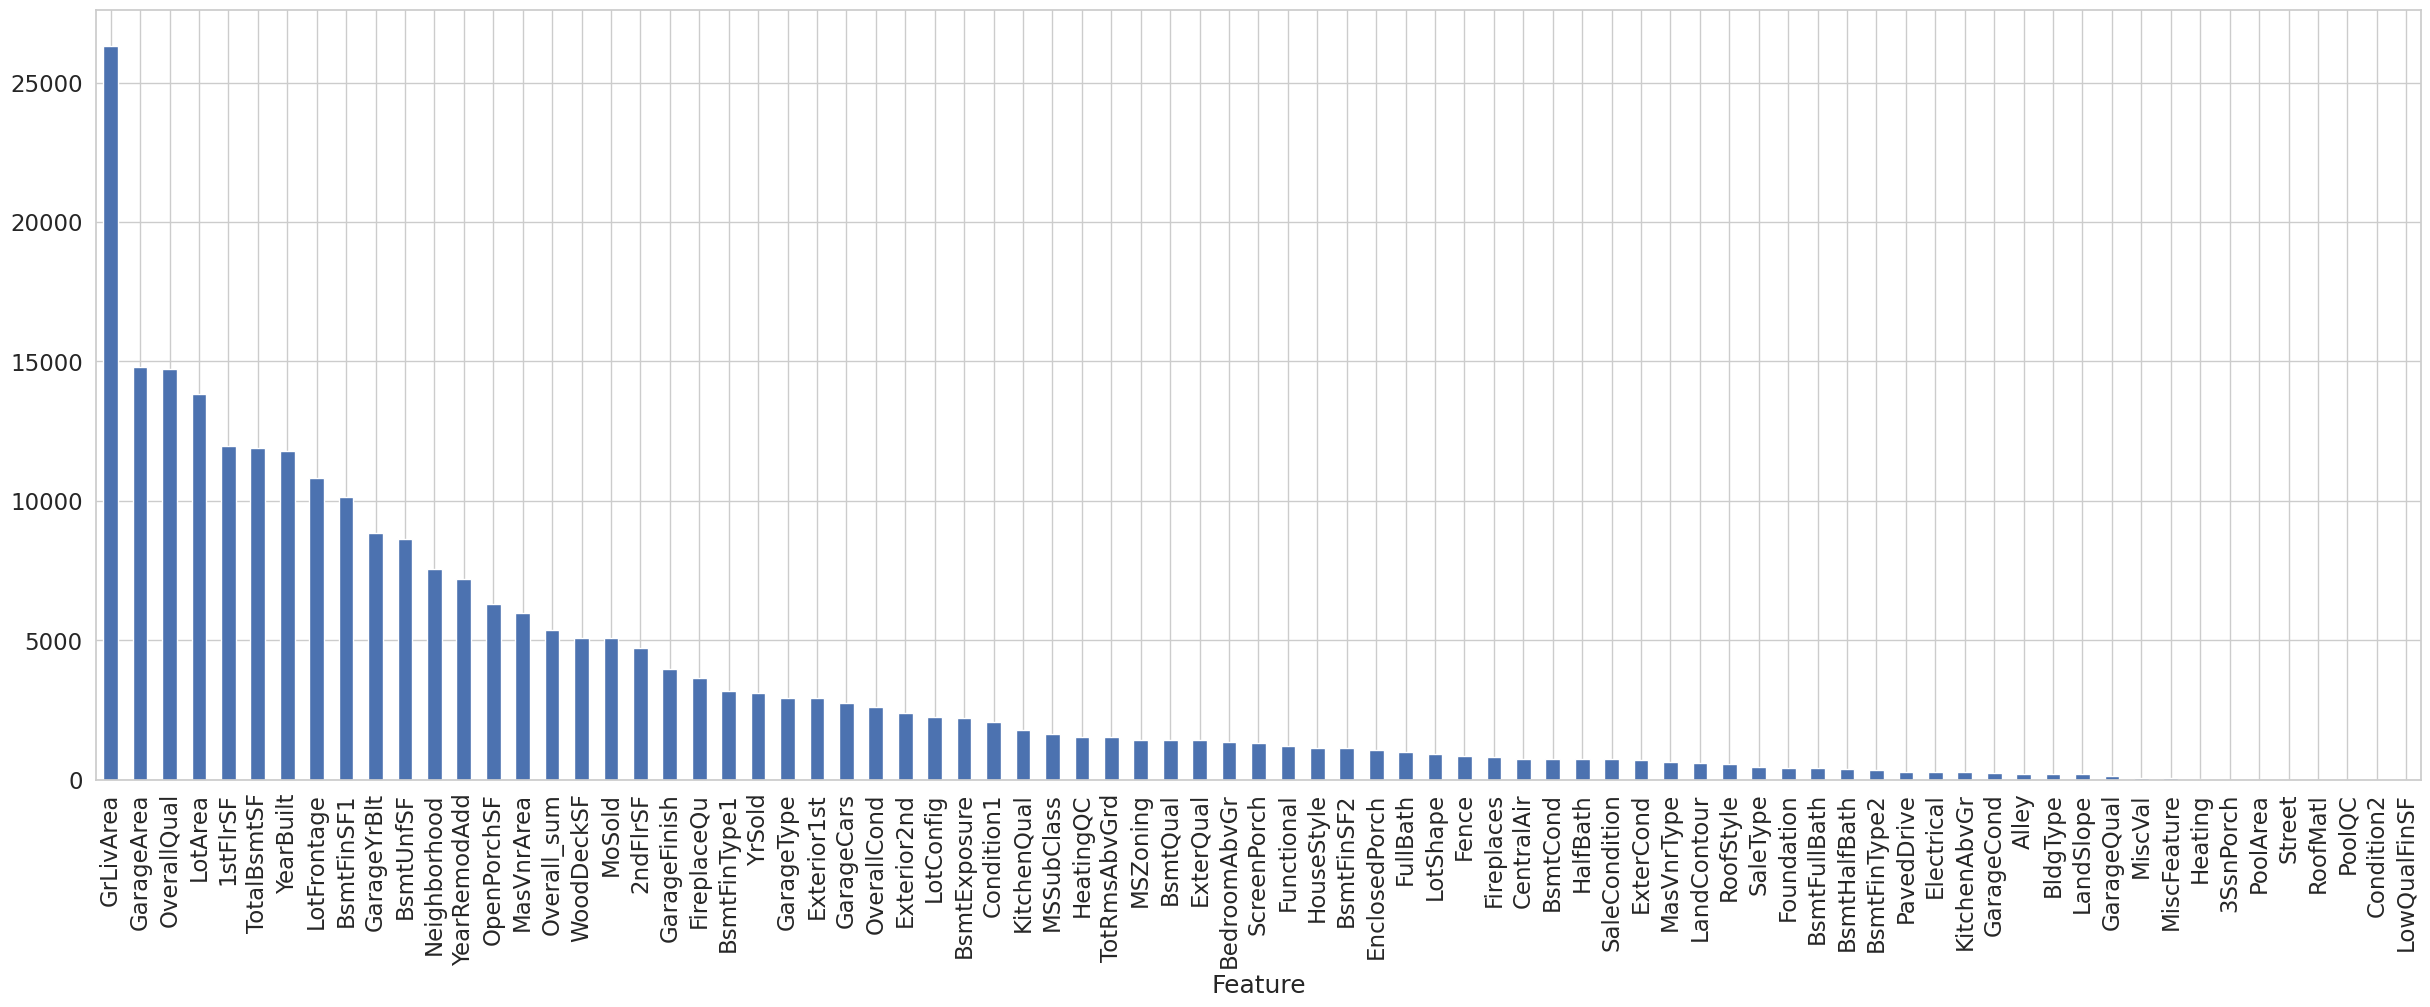

In [ ]:
# важности признаков, полученных во время обучения модели
fast_fi = automl_rd.model.get_feature_scores('fast')
fast_fi.set_index('Feature')['Importance'].plot.bar(figsize = (30, 10), grid = True)
plt.show()

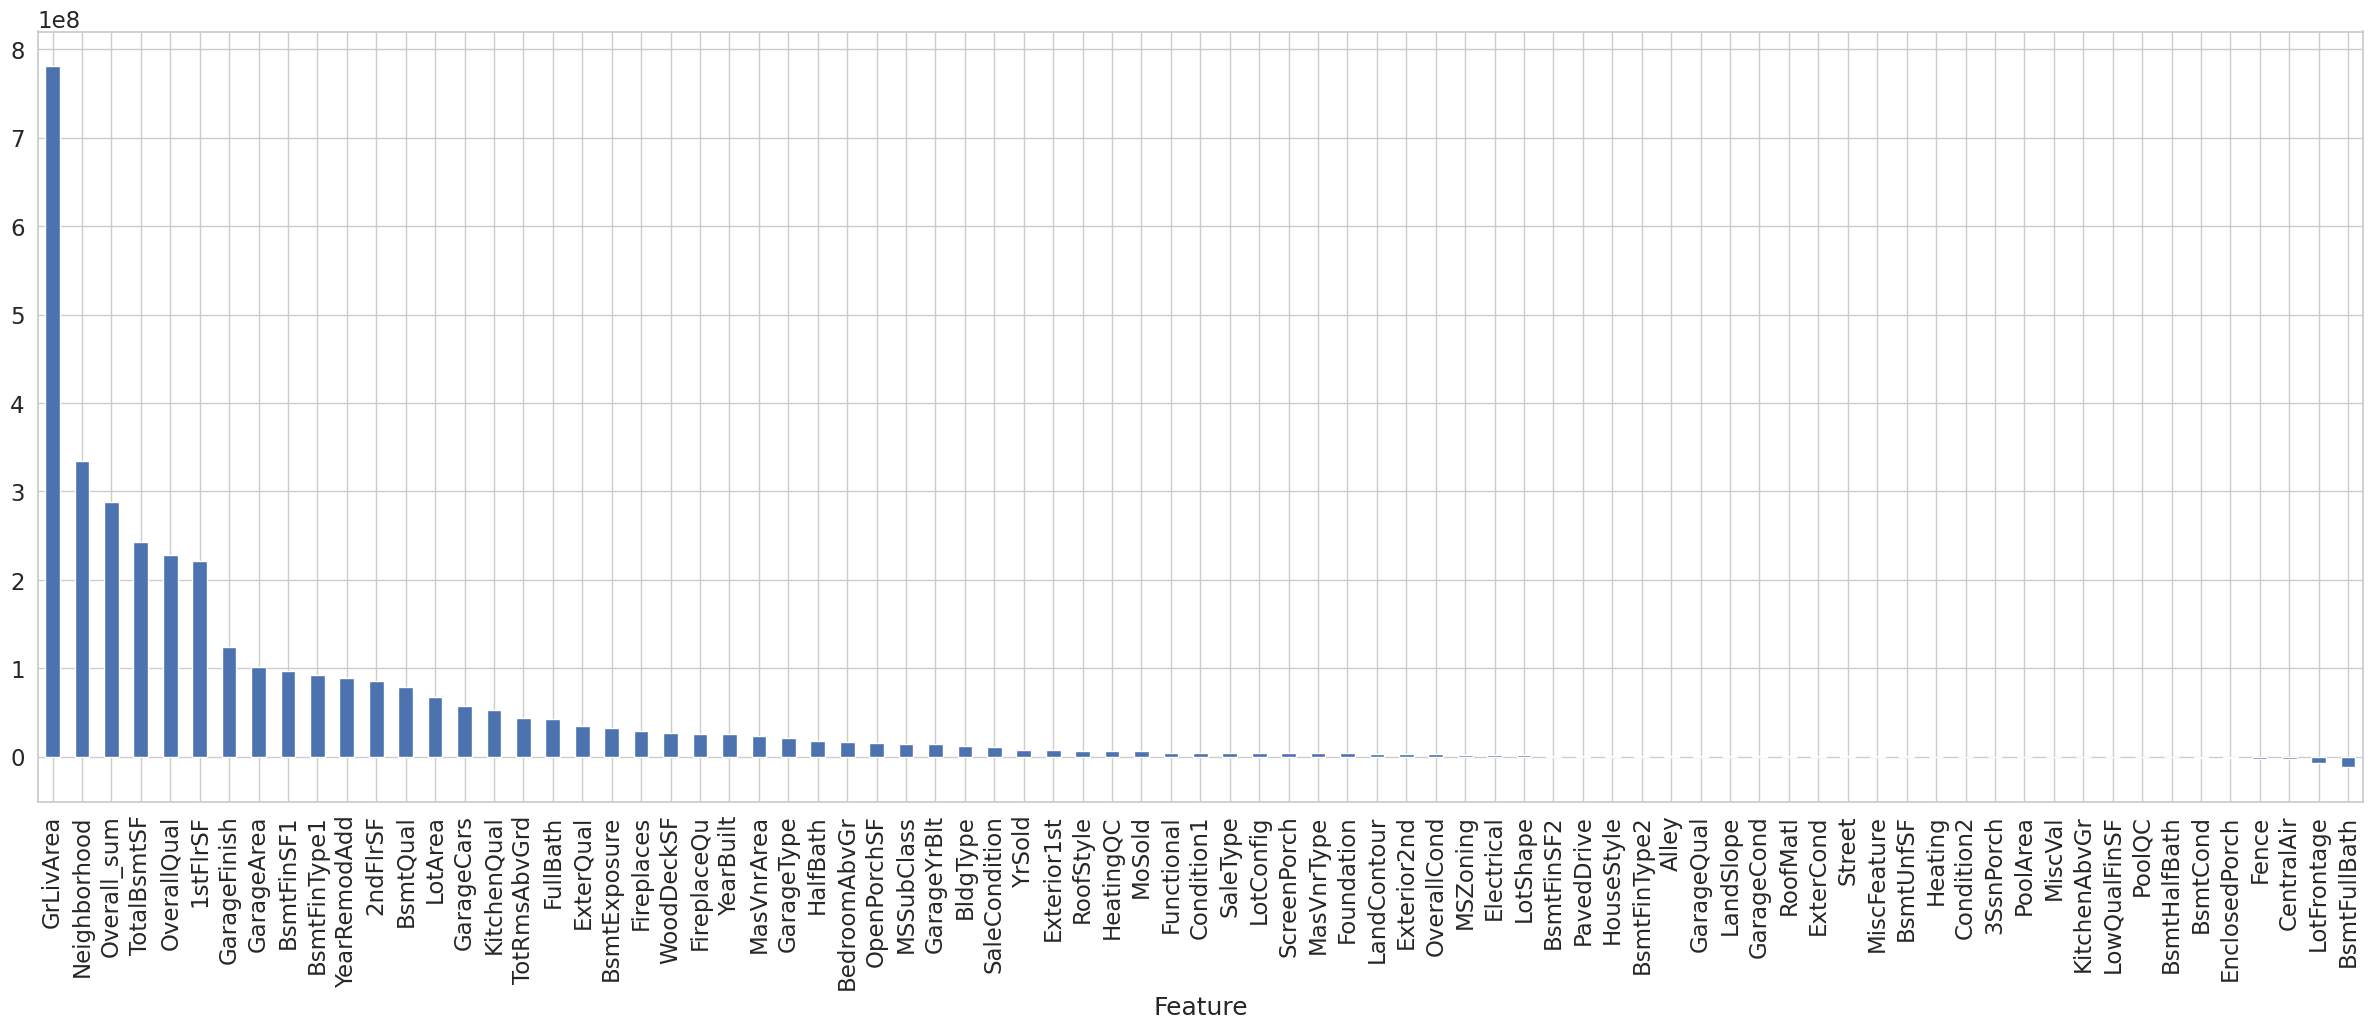

In [ ]:
# важности признаков, полученных методом permutation importance на тестовой выборке
accurate_fi = automl.get_feature_scores('accurate', test_data)
accurate_fi.set_index('Feature')['Importance'].plot.bar(figsize = (30, 10), grid = True)
plt.show()

In [ ]:
# видим что automl использовал не все заданное время и было использовано только 721.20 seconds (из 3600 секунд)

# попробуем улучшить качество метрики за счет более тщательного подбора моделей
# создаем объект TabularUtilizedAutoML
automl_ut = TabularUtilizedAutoML(
    task = task,
    timeout = timeout,
    cpu_limit = threds,
    reader_params = {'n_jobs': threds, 'cv': cv, 'random_state': random_state}
)

oof_pred = automl_ut.fit_predict(train_data, roles=roles, verbose=1)

[11:54:55] Start automl utilizator with listed constraints:


INFO:lightautoml.addons.utilization.utilization:Start automl utilizator with listed constraints:


[11:54:55] - time: 3600.00 seconds


INFO:lightautoml.addons.utilization.utilization:- time: 3600.00 seconds


[11:54:55] - CPU: 4 cores


INFO:lightautoml.addons.utilization.utilization:- CPU: 4 cores


[11:54:55] - memory: 16 GB



INFO:lightautoml.addons.utilization.utilization:- memory: 16 GB



[11:54:55] If one preset completes earlier, next preset configuration will be started



INFO:lightautoml.addons.utilization.utilization:If one preset completes earlier, next preset configuration will be started



[11:54:55] ==================================================


INFO:lightautoml.addons.utilization.utilization:==================================================


[11:54:55] Start 0 automl preset configuration:


INFO:lightautoml.addons.utilization.utilization:Start 0 automl preset configuration:


[11:54:55] conf_0_sel_type_0.yml, random state: {'reader_params': {'random_state': 42}, 'nn_params': {'random_state': 42}, 'general_params': {'return_all_predictions': False}}


INFO:lightautoml.addons.utilization.utilization:conf_0_sel_type_0.yml, random state: {'reader_params': {'random_state': 42}, 'nn_params': {'random_state': 42}, 'general_params': {'return_all_predictions': False}}
INFO3:lightautoml.addons.utilization.utilization:Found reader_params in kwargs, need to combine
INFO3:lightautoml.addons.utilization.utilization:Merged variant for reader_params = {'n_jobs': 4, 'cv': 4, 'random_state': 42}


[11:54:55] Stdout logging level is INFO.


INFO:lightautoml.automl.presets.base:Stdout logging level is INFO.


[11:54:55] Task: reg



INFO:lightautoml.automl.presets.base:Task: reg



[11:54:55] Start automl preset with listed constraints:


INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:


[11:54:55] - time: 3599.99 seconds


INFO:lightautoml.automl.presets.base:- time: 3599.99 seconds


[11:54:55] - CPU: 4 cores


INFO:lightautoml.automl.presets.base:- CPU: 4 cores


[11:54:55] - memory: 16 GB



INFO:lightautoml.automl.presets.base:- memory: 16 GB



[11:54:55] Train data shape: (1168, 81)



INFO:lightautoml.reader.base:Train data shape: (1168, 81)

INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []


[11:55:05] Layer 1 train process start. Time left 3590.34 secs


INFO:lightautoml.automl.base:Layer 1 train process start. Time left 3590.34 secs


[11:55:05] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105], 'embed_sizes': array([ 6, 13,  3,  2,  5,  4,  6,  5,  2,  7,  6,  8, 15,  8,  5, 25,  5,
        5,  6,  4,  5,  8,  8,  4,  5,  7,  5,  2,  9, 11,  3,  8,  5],
      dtype=int32), 'data_size': 106}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1e-05 score = -6283271168.0
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 5e-05 score = -6283216384.0
INFO3:lightautoml.ml_algo.torch_based

[11:55:27] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -991662720.0


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -991662720.0


[11:55:27] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


[11:55:27] Time left 3567.56 secs



INFO:lightautoml.automl.base:Time left 3567.56 secs



[11:55:28] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task': 'train', 'learning_rate': 0.01, 'num_leaves': 16, 'feature_fraction': 0.9, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 1, 'reg_lambda': 0.0, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 2, 'max_bin': 255, 'min_data_in_bin': 3, 'num_trees': 3000, 'early_stopping_rounds': 200, 'random_state': 42}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.92844e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.72777e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.20044e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 9.9178e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[

[11:55:46] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -744258880.0


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -744258880.0


[11:55:46] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed


[11:55:46] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 300.00 secs


INFO:lightautoml.ml_algo.tuning.optuna:Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 300.00 secs
INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-63c8d27a-3362-440e-9d9b-f3a25d0331e0
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.71659e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.52925e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.07441e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 8.92436e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 7.9494e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 7.55196e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.2497e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.07742e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 6.97854e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1

[12:00:49] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed


INFO:lightautoml.ml_algo.tuning.optuna:Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed
INFO2:lightautoml.ml_algo.tuning.optuna:The set of hyperparameters {'feature_fraction': 0.6872700594236812, 'num_leaves': 244, 'bagging_fraction': 0.8659969709057025, 'min_sum_hessian_in_leaf': 0.24810409748678125, 'reg_alpha': 2.5361081166471375e-07, 'reg_lambda': 2.5348407664333426e-07}
 achieve -642206656.0000 mse


[12:00:49] Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task': 'train', 'learning_rate': 0.05, 'num_leaves': 244, 'feature_fraction': 0.6872700594236812, 'bagging_fraction': 0.8659969709057025, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 2.5361081166471375e-07, 'reg_lambda': 2.5348407664333426e-07, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 2, 'max_bin': 255, 'min_data_in_bin': 3, 'num_trees': 3000, 'early_stopping_rounds': 100, 'random_state': 42, 'min_sum_hessian_in_leaf': 0.24810409748678125}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 100 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 8.4841e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 7.25639e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[300

[12:01:00] Fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM finished. score = -728364864.0


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM finished. score = -728364864.0


[12:01:00] Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM fitting and predicting completed


[12:01:00] Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task_type': 'CPU', 'thread_count': 2, 'random_seed': 42, 'num_trees': 2000, 'learning_rate': 0.05, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'boost_from_average': True, 'od_type': 'Iter', 'od_wait': 300, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': 100, 'allow_writing_files': False}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_2_CatBoost =====
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 76751.5491490	test: 77661.3580474	best: 77661.3580474 (0)	total: 2.49ms	remaining: 4.98s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27486.0727170	test: 32846.2793834	best: 32846.2793834 (100)	total: 202ms	remaining: 3.8s
DEBUG:lightautoml.ml

[12:01:12] Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = -696636352.0


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = -696636352.0


[12:01:12] Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed


[12:01:12] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 300.00 secs


INFO:lightautoml.ml_algo.tuning.optuna:Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 300.00 secs
INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-6fd1fed9-5c6e-4ecb-982f-186281cfe011
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77325.3472065	test: 77692.3148462	best: 77692.3148462 (0)	total: 1.45ms	remaining: 2.89s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 29221.7585907	test: 31979.9062463	best: 31979.9062463 (100)	total: 134ms	remaining: 2.53s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 21578.6709280	test: 27563.7564282	best: 27563.7564282 (200)	total: 259ms	remaining: 2.32s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 18075.4553215	test: 26356.7623969	best: 26349.3678901 (296)	total: 389ms	remaining: 2.2s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 16483.5575628	test: 26058.6789473	best: 26058.6789473 (400)	total: 530ms	remaining: 2.11s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 15308.64047

[12:06:14] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed


INFO:lightautoml.ml_algo.tuning.optuna:Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed
INFO2:lightautoml.ml_algo.tuning.optuna:The set of hyperparameters {'max_depth': 3, 'nan_mode': 'Min', 'l2_leaf_reg': 0.47777157256542, 'min_data_in_leaf': 20}
 achieve -617927488.0000 mse


[12:06:14] Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task_type': 'CPU', 'thread_count': 2, 'random_seed': 42, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.47777157256542, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 3, 'min_data_in_leaf': 20, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'boost_from_average': True, 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': 100, 'allow_writing_files': False}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77812.5405387	test: 78453.9660164	best: 78453.9660164 (0)	total: 1.12ms	remaining: 3.36s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 38880.4904877	test: 39991.3971962	best: 39991.3971962 (100)	total: 116ms	remaining: 

[12:06:21] Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = -721721728.0


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = -721721728.0


[12:06:21] Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed


[12:06:21] Time left 2914.18 secs



INFO:lightautoml.automl.base:Time left 2914.18 secs



[12:06:21] Layer 1 training completed.



INFO:lightautoml.automl.base:Layer 1 training completed.



[12:06:21] Blending: optimization starts with equal weights and score -703288000.0


INFO:lightautoml.automl.blend:Blending: optimization starts with equal weights and score -703288000.0


[12:06:21] Blending: iteration 0: score = -686429888.0, weights = [0.08254988 0.         0.16960369 0.7478465  0.        ]


INFO:lightautoml.automl.blend:Blending: iteration 0: score = -686429888.0, weights = [0.08254988 0.         0.16960369 0.7478465  0.        ]


[12:06:21] Blending: iteration 1: score = -685883136.0, weights = [0.10385574 0.         0.22535168 0.6707926  0.        ]


INFO:lightautoml.automl.blend:Blending: iteration 1: score = -685883136.0, weights = [0.10385574 0.         0.22535168 0.6707926  0.        ]


[12:06:21] Blending: iteration 2: score = -685882560.0, weights = [0.10492273 0.         0.22311701 0.6719603  0.        ]


INFO:lightautoml.automl.blend:Blending: iteration 2: score = -685882560.0, weights = [0.10492273 0.         0.22311701 0.6719603  0.        ]


[12:06:21] Blending: iteration 3: score = -685882560.0, weights = [0.10492273 0.         0.22311701 0.6719603  0.        ]


INFO:lightautoml.automl.blend:Blending: iteration 3: score = -685882560.0, weights = [0.10492273 0.         0.22311701 0.6719603  0.        ]


[12:06:21] Blending: no score update. Terminated



INFO:lightautoml.automl.blend:Blending: no score update. Terminated



[12:06:21] Automl preset training completed in 686.13 seconds



INFO:lightautoml.automl.presets.base:Automl preset training completed in 686.13 seconds



[12:06:21] Model description:
Final prediction for new objects (level 0) = 
	 0.10492 * (4 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) +
	 0.22312 * (4 averaged models Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM) +
	 0.67196 * (4 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) 



INFO:lightautoml.automl.presets.base:Model description:
Final prediction for new objects (level 0) = 
	 0.10492 * (4 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) +
	 0.22312 * (4 averaged models Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM) +
	 0.67196 * (4 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) 



[12:06:21] ==================================================


INFO:lightautoml.addons.utilization.utilization:==================================================


[12:06:21] Start 1 automl preset configuration:


INFO:lightautoml.addons.utilization.utilization:Start 1 automl preset configuration:


[12:06:21] conf_1_sel_type_1.yml, random state: {'reader_params': {'random_state': 43}, 'nn_params': {'random_state': 43}, 'general_params': {'return_all_predictions': False}}


INFO:lightautoml.addons.utilization.utilization:conf_1_sel_type_1.yml, random state: {'reader_params': {'random_state': 43}, 'nn_params': {'random_state': 43}, 'general_params': {'return_all_predictions': False}}
INFO3:lightautoml.addons.utilization.utilization:Found reader_params in kwargs, need to combine
INFO3:lightautoml.addons.utilization.utilization:Merged variant for reader_params = {'n_jobs': 4, 'cv': 4, 'random_state': 43}


[12:06:21] Stdout logging level is INFO.


INFO:lightautoml.automl.presets.base:Stdout logging level is INFO.


[12:06:21] Task: reg



INFO:lightautoml.automl.presets.base:Task: reg



[12:06:21] Start automl preset with listed constraints:


INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:


[12:06:21] - time: 2913.74 seconds


INFO:lightautoml.automl.presets.base:- time: 2913.74 seconds


[12:06:21] - CPU: 4 cores


INFO:lightautoml.automl.presets.base:- CPU: 4 cores


[12:06:21] - memory: 16 GB



INFO:lightautoml.automl.presets.base:- memory: 16 GB



[12:06:21] Train data shape: (1168, 81)



INFO:lightautoml.reader.base:Train data shape: (1168, 81)

INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []


[12:06:29] Layer 1 train process start. Time left 2906.38 secs


INFO:lightautoml.automl.base:Layer 1 train process start. Time left 2906.38 secs


[12:06:29] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107], 'embed_sizes': array([ 6, 13,  3,  2,  5,  4,  6,  5,  2,  5,  6,  8, 15,  4,  8,  5, 25,
        5,  3,  5,  6,  4,  5,  8,  8,  5,  7,  5,  2,  9, 11,  3,  8,  5],
      dtype=int32), 'data_size': 108}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1e-05 score = -36713476096.0
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 5e-05 score = -4939759616.0
INFO3:lightautoml.ml_algo.

[12:06:56] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -948897984.0


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -948897984.0


[12:06:56] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


[12:06:56] Time left 2878.56 secs



INFO:lightautoml.automl.base:Time left 2878.56 secs

INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.02301e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.15011e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 8.14857e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 6.981e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 6.63666e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 6.53502e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 6.53745e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 6.54811e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 6.56807e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[743]	valid's l2: 6.52177e+08


[12:06:58] Selector_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Selector_LightGBM fitting and predicting completed


[12:06:58] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task': 'train', 'learning_rate': 0.01, 'num_leaves': 16, 'feature_fraction': 0.9, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 1, 'reg_lambda': 0.0, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 2, 'max_bin': 255, 'min_data_in_bin': 3, 'num_trees': 3000, 'early_stopping_rounds': 200, 'random_state': 42}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.09579e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.15336e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 8.06194e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 6.82332e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:

[12:07:21] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -747705920.0


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -747705920.0


[12:07:21] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed


[12:07:21] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 300.00 secs


INFO:lightautoml.ml_algo.tuning.optuna:Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 300.00 secs
INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-94532a51-d0b7-4b86-87c1-4250c782c377
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 1.96466e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.0742e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 7.592e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 6.62698e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 6.212e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 6.082e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 6.00379e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 5.97033e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 5.95022e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	

[12:12:25] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed


INFO:lightautoml.ml_algo.tuning.optuna:Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed
INFO2:lightautoml.ml_algo.tuning.optuna:The set of hyperparameters {'feature_fraction': 0.5510164584390908, 'num_leaves': 205, 'bagging_fraction': 0.9948377471857348, 'min_sum_hessian_in_leaf': 0.17519198249260806, 'reg_alpha': 9.745268973889301, 'reg_lambda': 8.00749973163896e-05}
 achieve -559209728.0000 mse


[12:12:25] Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task': 'train', 'learning_rate': 0.05, 'num_leaves': 205, 'feature_fraction': 0.5510164584390908, 'bagging_fraction': 0.9948377471857348, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 9.745268973889301, 'reg_lambda': 8.00749973163896e-05, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 2, 'max_bin': 255, 'min_data_in_bin': 3, 'num_trees': 3000, 'early_stopping_rounds': 100, 'random_state': 42, 'min_sum_hessian_in_leaf': 0.17519198249260806}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 100 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 6.59289e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 6.05679e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	vali

[12:12:31] Fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM finished. score = -778229312.0


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM finished. score = -778229312.0


[12:12:31] Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM fitting and predicting completed


[12:12:31] Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task_type': 'CPU', 'thread_count': 2, 'random_seed': 42, 'num_trees': 2000, 'learning_rate': 0.05, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'boost_from_average': True, 'od_type': 'Iter', 'od_wait': 300, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': 100, 'allow_writing_files': False}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_2_CatBoost =====
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 80158.0683729	test: 68264.2603032	best: 68264.2603032 (0)	total: 2.34ms	remaining: 4.68s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 28645.0364307	test: 26542.2819323	best: 26542.2819323 (100)	total: 172ms	remaining: 3.24s
DEBUG:lightautoml.m

[12:12:46] Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = -718754624.0


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = -718754624.0


[12:12:46] Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed


[12:12:46] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 300.00 secs


INFO:lightautoml.ml_algo.tuning.optuna:Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 300.00 secs
INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-18c9438a-200a-4017-aa2b-600d2f0dbf4c
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 80212.0893346	test: 68362.7727806	best: 68362.7727806 (0)	total: 1.93ms	remaining: 3.86s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 31502.4838699	test: 27407.8879267	best: 27407.8879267 (100)	total: 131ms	remaining: 2.46s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 23249.7818870	test: 23616.3612597	best: 23581.4095476 (198)	total: 255ms	remaining: 2.28s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 19988.9405923	test: 22457.8548504	best: 22440.3611277 (288)	total: 385ms	remaining: 2.17s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 18167.5139741	test: 22242.4358644	best: 22242.4358644 (400)	total: 510ms	remaining: 2.03s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 17263.3166

[12:17:36] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed


INFO:lightautoml.ml_algo.tuning.optuna:Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed
INFO2:lightautoml.ml_algo.tuning.optuna:The set of hyperparameters {'max_depth': 4, 'nan_mode': 'Max', 'l2_leaf_reg': 0.5292320874023696, 'min_data_in_leaf': 1}
 achieve -428346368.0000 mse


[12:17:36] Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task_type': 'CPU', 'thread_count': 2, 'random_seed': 42, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.5292320874023696, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 4, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'boost_from_average': True, 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Max', 'verbose': 100, 'allow_writing_files': False}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 81009.0119007	test: 69126.4192514	best: 69126.4192514 (0)	total: 1.83ms	remaining: 5.49s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 36986.6129705	test: 30601.3392155	best: 30601.3392155 (100)	total: 231ms	remaining:

[12:17:46] Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = -698596672.0


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = -698596672.0


[12:17:46] Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed


[12:17:46] Time left 2229.31 secs



INFO:lightautoml.automl.base:Time left 2229.31 secs



[12:17:46] Layer 1 training completed.



INFO:lightautoml.automl.base:Layer 1 training completed.



[12:17:46] Blending: optimization starts with equal weights and score -698712000.0


INFO:lightautoml.automl.blend:Blending: optimization starts with equal weights and score -698712000.0


[12:17:46] Blending: iteration 0: score = -683840256.0, weights = [0.14909935 0.         0.         0.30309343 0.5478072 ]


INFO:lightautoml.automl.blend:Blending: iteration 0: score = -683840256.0, weights = [0.14909935 0.         0.         0.30309343 0.5478072 ]


[12:17:46] Blending: iteration 1: score = -683171072.0, weights = [0.17422101 0.         0.         0.20749728 0.6182817 ]


INFO:lightautoml.automl.blend:Blending: iteration 1: score = -683171072.0, weights = [0.17422101 0.         0.         0.20749728 0.6182817 ]


[12:17:46] Blending: iteration 2: score = -683166144.0, weights = [0.1757451  0.         0.         0.19799091 0.626264  ]


INFO:lightautoml.automl.blend:Blending: iteration 2: score = -683166144.0, weights = [0.1757451  0.         0.         0.19799091 0.626264  ]


[12:17:46] Blending: iteration 3: score = -683166080.0, weights = [0.1758398  0.         0.         0.19796817 0.6261921 ]


INFO:lightautoml.automl.blend:Blending: iteration 3: score = -683166080.0, weights = [0.1758398  0.         0.         0.19796817 0.6261921 ]


[12:17:46] Blending: iteration 4: score = -683166080.0, weights = [0.17584315 0.         0.         0.19796737 0.62618953]


INFO:lightautoml.automl.blend:Blending: iteration 4: score = -683166080.0, weights = [0.17584315 0.         0.         0.19796737 0.62618953]


[12:17:46] Blending: no score update. Terminated



INFO:lightautoml.automl.blend:Blending: no score update. Terminated



[12:17:46] Automl preset training completed in 684.77 seconds



INFO:lightautoml.automl.presets.base:Automl preset training completed in 684.77 seconds



[12:17:46] Model description:
Final prediction for new objects (level 0) = 
	 0.17584 * (4 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) +
	 0.19797 * (4 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) +
	 0.62619 * (4 averaged models Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost) 



INFO:lightautoml.automl.presets.base:Model description:
Final prediction for new objects (level 0) = 
	 0.17584 * (4 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) +
	 0.19797 * (4 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) +
	 0.62619 * (4 averaged models Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost) 



[12:17:46] ==================================================


INFO:lightautoml.addons.utilization.utilization:==================================================


[12:17:46] Start 2 automl preset configuration:


INFO:lightautoml.addons.utilization.utilization:Start 2 automl preset configuration:


[12:17:46] conf_2_select_mode_1_no_typ.yml, random state: {'reader_params': {'random_state': 44}, 'nn_params': {'random_state': 44}, 'general_params': {'return_all_predictions': False}}


INFO:lightautoml.addons.utilization.utilization:conf_2_select_mode_1_no_typ.yml, random state: {'reader_params': {'random_state': 44}, 'nn_params': {'random_state': 44}, 'general_params': {'return_all_predictions': False}}
INFO3:lightautoml.addons.utilization.utilization:Found reader_params in kwargs, need to combine
INFO3:lightautoml.addons.utilization.utilization:Merged variant for reader_params = {'n_jobs': 4, 'cv': 4, 'random_state': 44}


[12:17:46] Stdout logging level is INFO.


INFO:lightautoml.automl.presets.base:Stdout logging level is INFO.


[12:17:46] Task: reg



INFO:lightautoml.automl.presets.base:Task: reg



[12:17:46] Start automl preset with listed constraints:


INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:


[12:17:46] - time: 2228.89 seconds


INFO:lightautoml.automl.presets.base:- time: 2228.89 seconds


[12:17:46] - CPU: 4 cores


INFO:lightautoml.automl.presets.base:- CPU: 4 cores


[12:17:46] - memory: 16 GB



INFO:lightautoml.automl.presets.base:- memory: 16 GB



[12:17:46] Train data shape: (1168, 81)



INFO:lightautoml.reader.base:Train data shape: (1168, 81)



[12:17:46] Layer 1 train process start. Time left 2228.74 secs


INFO:lightautoml.automl.base:Layer 1 train process start. Time left 2228.74 secs


[12:17:47] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91], 'embed_sizes': array([ 6,  6, 13,  3,  5,  6,  2,  5,  4,  6,  5,  2,  5,  6,  8,  5, 25,
        5,  5,  6,  4,  4,  3,  5,  5,  6,  4,  5,  8,  8,  5,  4,  5,  7,
        5,  2,  9, 11,  3,  8,  5,  4], dtype=int32), 'data_size': 92}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1e-05 score = -37338415104.0
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C 

[12:18:09] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -989535232.0


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -989535232.0


[12:18:09] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


[12:18:09] Time left 2206.06 secs



INFO:lightautoml.automl.base:Time left 2206.06 secs

INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.4745e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.4504e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.02629e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 8.94309e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 8.3831e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 8.11454e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 7.91553e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 7.76637e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 7.67601e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 7.61146e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 7.5853e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 7.5849e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]	va

[12:18:15] Selector_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Selector_LightGBM fitting and predicting completed


[12:18:15] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task': 'train', 'learning_rate': 0.01, 'num_leaves': 16, 'feature_fraction': 0.9, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 1, 'reg_lambda': 0.0, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 2, 'max_bin': 255, 'min_data_in_bin': 3, 'num_trees': 3000, 'early_stopping_rounds': 200, 'random_state': 42}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.43959e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.40303e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 9.67355e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 8.33555e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:

[12:18:45] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -738546944.0


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -738546944.0


[12:18:45] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed


[12:18:45] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 300.00 secs


INFO:lightautoml.ml_algo.tuning.optuna:Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 300.00 secs
INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-d4d4c991-3992-439c-88e4-79527e92867c
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 2.29749e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.20888e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 8.51002e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 7.31935e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 6.90174e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 6.68428e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 6.57327e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 6.42569e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 6.37228e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:

[12:23:50] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed


INFO:lightautoml.ml_algo.tuning.optuna:Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed
INFO2:lightautoml.ml_algo.tuning.optuna:The set of hyperparameters {'feature_fraction': 0.6872700594236812, 'num_leaves': 244, 'bagging_fraction': 0.8659969709057025, 'min_sum_hessian_in_leaf': 0.24810409748678125, 'reg_alpha': 2.5361081166471375e-07, 'reg_lambda': 2.5348407664333426e-07}
 achieve -612620096.0000 mse


[12:23:50] Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task': 'train', 'learning_rate': 0.05, 'num_leaves': 244, 'feature_fraction': 0.6872700594236812, 'bagging_fraction': 0.8659969709057025, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 2.5361081166471375e-07, 'reg_lambda': 2.5348407664333426e-07, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 2, 'max_bin': 255, 'min_data_in_bin': 3, 'num_trees': 3000, 'early_stopping_rounds': 100, 'random_state': 42, 'min_sum_hessian_in_leaf': 0.24810409748678125}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 100 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 7.28476e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 6.96609e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[30

[12:24:02] Fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM finished. score = -727370944.0


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM finished. score = -727370944.0


[12:24:02] Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM fitting and predicting completed


[12:24:02] Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task_type': 'CPU', 'thread_count': 2, 'random_seed': 42, 'num_trees': 2000, 'learning_rate': 0.05, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'boost_from_average': True, 'od_type': 'Iter', 'od_wait': 300, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': 100, 'allow_writing_files': False}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_2_CatBoost =====
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 78898.2975266	test: 72073.0102351	best: 72073.0102351 (0)	total: 2.88ms	remaining: 5.76s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 28693.7786980	test: 29290.1953108	best: 29290.1953108 (100)	total: 198ms	remaining: 3.72s
DEBUG:lightautoml.m

[12:24:15] Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = -698732288.0


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = -698732288.0


[12:24:15] Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed


[12:24:15] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 300.00 secs


INFO:lightautoml.ml_algo.tuning.optuna:Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 300.00 secs
INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-d098476a-48f0-43ae-9bcb-b22dd6fb533b
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 79172.8771430	test: 72357.1641770	best: 72357.1641770 (0)	total: 2.13ms	remaining: 4.25s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 30561.0067708	test: 30036.6263132	best: 30036.6263132 (100)	total: 148ms	remaining: 2.78s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 23503.6295456	test: 27164.2428483	best: 27164.2428483 (200)	total: 274ms	remaining: 2.45s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 20700.9495615	test: 25850.0672111	best: 25850.0672111 (300)	total: 399ms	remaining: 2.25s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 19594.6256412	test: 25618.5322581	best: 25618.5322581 (400)	total: 530ms	remaining: 2.11s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 18393.0236

[12:29:18] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed


INFO:lightautoml.ml_algo.tuning.optuna:Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed
INFO2:lightautoml.ml_algo.tuning.optuna:The set of hyperparameters {'max_depth': 6, 'nan_mode': 'Min', 'l2_leaf_reg': 1.6612310896924866e-07, 'min_data_in_leaf': 1}
 achieve -555502784.0000 mse


[12:29:18] Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task_type': 'CPU', 'thread_count': 2, 'random_seed': 42, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 1.6612310896924866e-07, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 6, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'boost_from_average': True, 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': 100, 'allow_writing_files': False}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 79576.9507070	test: 72786.1722301	best: 72786.1722301 (0)	total: 3.4ms	remaining: 10.2s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 32463.6632428	test: 31925.5175118	best: 31925.5175118 (100)	total: 488ms	remaini

[12:29:32] Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = -723633600.0


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = -723633600.0


[12:29:32] Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed


[12:29:32] Time left 1522.54 secs



INFO:lightautoml.automl.base:Time left 1522.54 secs



[12:29:32] Layer 1 training completed.



INFO:lightautoml.automl.base:Layer 1 training completed.



[12:29:32] Blending: optimization starts with equal weights and score -701097088.0


INFO:lightautoml.automl.blend:Blending: optimization starts with equal weights and score -701097088.0


[12:29:33] Blending: iteration 0: score = -686702720.0, weights = [0.05635407 0.         0.2130579  0.59063566 0.13995236]


INFO:lightautoml.automl.blend:Blending: iteration 0: score = -686702720.0, weights = [0.05635407 0.         0.2130579  0.59063566 0.13995236]


[12:29:33] Blending: iteration 1: score = -686466624.0, weights = [0.06250659 0.         0.26463273 0.53975004 0.13311063]


INFO:lightautoml.automl.blend:Blending: iteration 1: score = -686466624.0, weights = [0.06250659 0.         0.26463273 0.53975004 0.13311063]


[12:29:33] Blending: iteration 2: score = -686429248.0, weights = [0.05773334 0.         0.2739874  0.53607494 0.1322043 ]


INFO:lightautoml.automl.blend:Blending: iteration 2: score = -686429248.0, weights = [0.05773334 0.         0.2739874  0.53607494 0.1322043 ]


[12:29:33] Blending: iteration 3: score = -686429184.0, weights = [0.05773334 0.         0.27398744 0.536075   0.1322043 ]


INFO:lightautoml.automl.blend:Blending: iteration 3: score = -686429184.0, weights = [0.05773334 0.         0.27398744 0.536075   0.1322043 ]


[12:29:33] Blending: iteration 4: score = -686429184.0, weights = [0.05773334 0.         0.27398744 0.536075   0.13220428]


INFO:lightautoml.automl.blend:Blending: iteration 4: score = -686429184.0, weights = [0.05773334 0.         0.27398744 0.536075   0.13220428]


[12:29:33] Blending: no score update. Terminated



INFO:lightautoml.automl.blend:Blending: no score update. Terminated



[12:29:33] Automl preset training completed in 706.65 seconds



INFO:lightautoml.automl.presets.base:Automl preset training completed in 706.65 seconds



[12:29:33] Model description:
Final prediction for new objects (level 0) = 
	 0.05773 * (4 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) +
	 0.27399 * (4 averaged models Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM) +
	 0.53607 * (4 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) +
	 0.13220 * (4 averaged models Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost) 



INFO:lightautoml.automl.presets.base:Model description:
Final prediction for new objects (level 0) = 
	 0.05773 * (4 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) +
	 0.27399 * (4 averaged models Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM) +
	 0.53607 * (4 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) +
	 0.13220 * (4 averaged models Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost) 



[12:29:33] ==================================================


INFO:lightautoml.addons.utilization.utilization:==================================================


[12:29:33] Start 3 automl preset configuration:


INFO:lightautoml.addons.utilization.utilization:Start 3 automl preset configuration:


[12:29:33] conf_3_sel_type_1_no_inter_lgbm.yml, random state: {'reader_params': {'random_state': 45}, 'nn_params': {'random_state': 45}, 'general_params': {'return_all_predictions': False}}


INFO:lightautoml.addons.utilization.utilization:conf_3_sel_type_1_no_inter_lgbm.yml, random state: {'reader_params': {'random_state': 45}, 'nn_params': {'random_state': 45}, 'general_params': {'return_all_predictions': False}}
INFO3:lightautoml.addons.utilization.utilization:Found reader_params in kwargs, need to combine
INFO3:lightautoml.addons.utilization.utilization:Merged variant for reader_params = {'n_jobs': 4, 'cv': 4, 'random_state': 45}


[12:29:33] Stdout logging level is INFO.


INFO:lightautoml.automl.presets.base:Stdout logging level is INFO.


[12:29:33] Task: reg



INFO:lightautoml.automl.presets.base:Task: reg



[12:29:33] Start automl preset with listed constraints:


INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:


[12:29:33] - time: 1522.16 seconds


INFO:lightautoml.automl.presets.base:- time: 1522.16 seconds


[12:29:33] - CPU: 4 cores


INFO:lightautoml.automl.presets.base:- CPU: 4 cores


[12:29:33] - memory: 16 GB



INFO:lightautoml.automl.presets.base:- memory: 16 GB



[12:29:33] Train data shape: (1168, 81)



INFO:lightautoml.reader.base:Train data shape: (1168, 81)

INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []


[12:29:42] Layer 1 train process start. Time left 1512.89 secs


INFO:lightautoml.automl.base:Layer 1 train process start. Time left 1512.89 secs


[12:29:43] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105], 'embed_sizes': array([ 6, 13,  3,  6,  2,  5,  4,  6,  5,  2,  6,  8, 15,  8,  5, 25,  5,
        3,  5,  6,  4,  5,  8,  8,  5,  7,  5,  2,  9, 11,  3,  8,  5],
      dtype=int32), 'data_size': 106}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1e-05 score = -37945618432.0
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 5e-05 score = -6461027840.0
INFO3:lightautoml.ml_algo.torch_base

[12:30:11] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -999346368.0


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -999346368.0


[12:30:11] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


[12:30:11] Time left 1483.58 secs



INFO:lightautoml.automl.base:Time left 1483.58 secs

INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 3.3861e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 2.21961e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.67735e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 1.43757e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 1.32056e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 1.27424e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 1.25173e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 1.2331e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 1.22518e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's l2: 1.21488e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's l2: 1.20918e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's l2: 1.20274e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[1300]

[12:30:16] Selector_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Selector_LightGBM fitting and predicting completed


[12:30:16] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task': 'train', 'learning_rate': 0.01, 'num_leaves': 16, 'feature_fraction': 0.9, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 1, 'reg_lambda': 0.0, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 2, 'max_bin': 255, 'min_data_in_bin': 3, 'num_trees': 3000, 'early_stopping_rounds': 200, 'random_state': 42}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 3.37495e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 2.17571e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.59155e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 1.34192e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:

[12:30:35] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -746747712.0


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -746747712.0


[12:30:35] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed


[12:30:35] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 256.07 secs


INFO:lightautoml.ml_algo.tuning.optuna:Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 256.07 secs
INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-c5546ef6-4ad9-41ad-a0c1-487865df4a40
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 3.15298e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.94309e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.46531e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 1.25872e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 1.1855e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 1.15071e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 1.12721e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 1.11076e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 1.09472e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[

[12:34:52] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed


INFO:lightautoml.ml_algo.tuning.optuna:Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed
INFO2:lightautoml.ml_algo.tuning.optuna:The set of hyperparameters {'feature_fraction': 0.8083736797049783, 'num_leaves': 99, 'bagging_fraction': 0.6465455436474444, 'min_sum_hessian_in_leaf': 0.004516421083805813, 'reg_alpha': 1.1907621154344374e-05, 'reg_lambda': 0.00023295750512569133}
 achieve -1035667968.0000 mse


[12:34:52] Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task': 'train', 'learning_rate': 0.05, 'num_leaves': 99, 'feature_fraction': 0.8083736797049783, 'bagging_fraction': 0.6465455436474444, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 1.1907621154344374e-05, 'reg_lambda': 0.00023295750512569133, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 2, 'max_bin': 255, 'min_data_in_bin': 3, 'num_trees': 3000, 'early_stopping_rounds': 100, 'random_state': 42, 'min_sum_hessian_in_leaf': 0.004516421083805813}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 100 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 1.19347e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.08095e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[30

[12:35:00] Fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM finished. score = -738090752.0


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM finished. score = -738090752.0


[12:35:00] Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM fitting and predicting completed


[12:35:00] Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task_type': 'CPU', 'thread_count': 2, 'random_seed': 42, 'num_trees': 2000, 'learning_rate': 0.05, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'boost_from_average': True, 'od_type': 'Iter', 'od_wait': 300, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': 100, 'allow_writing_files': False}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_2_CatBoost =====
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 76141.2268447	test: 78826.3739544	best: 78826.3739544 (0)	total: 2.05ms	remaining: 4.09s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 24206.9983091	test: 38489.0289680	best: 38461.6858727 (96)	total: 174ms	remaining: 3.28s
DEBUG:lightautoml.ml

[12:35:10] Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = -733223808.0


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = -733223808.0


[12:35:10] Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed


[12:35:10] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 300.00 secs


INFO:lightautoml.ml_algo.tuning.optuna:Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 300.00 secs
INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-355226f9-15a2-4b1b-a2ce-48d7e2fb6849
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 76538.0651857	test: 79133.3354580	best: 79133.3354580 (0)	total: 1.77ms	remaining: 3.54s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27024.2601571	test: 39079.4888846	best: 39079.4888846 (100)	total: 217ms	remaining: 4.07s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 19457.7503567	test: 33915.0698401	best: 33915.0698401 (200)	total: 416ms	remaining: 3.73s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 17529.6658444	test: 33203.0318998	best: 33116.0975864 (284)	total: 579ms	remaining: 3.27s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 16366.9014877	test: 32965.5611136	best: 32895.3706098 (393)	total: 885ms	remaining: 3.53s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 15350.7799

[12:39:12] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed


INFO:lightautoml.ml_algo.tuning.optuna:Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed
INFO2:lightautoml.ml_algo.tuning.optuna:The set of hyperparameters {'max_depth': 3, 'nan_mode': 'Max', 'l2_leaf_reg': 1.527156759251193, 'min_data_in_leaf': 6}
 achieve -921295232.0000 mse


[12:39:12] Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task_type': 'CPU', 'thread_count': 2, 'random_seed': 42, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 1.527156759251193, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 3, 'min_data_in_leaf': 6, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'boost_from_average': True, 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Max', 'verbose': 100, 'allow_writing_files': False}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 77120.8686630	test: 79650.8058003	best: 79650.8058003 (0)	total: 2.54ms	remaining: 7.63s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 36387.0969413	test: 45059.1198779	best: 45059.1198779 (100)	total: 151ms	remaining: 

[12:39:18] Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = -753294144.0


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = -753294144.0


[12:39:18] Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed


[12:39:18] Time left 937.36 secs



INFO:lightautoml.automl.base:Time left 937.36 secs



[12:39:18] Layer 1 training completed.



INFO:lightautoml.automl.base:Layer 1 training completed.



[12:39:18] Blending: optimization starts with equal weights and score -728212544.0


INFO:lightautoml.automl.blend:Blending: optimization starts with equal weights and score -728212544.0


[12:39:18] Blending: iteration 0: score = -714180224.0, weights = [0.         0.06725018 0.35893637 0.51405865 0.05975476]


INFO:lightautoml.automl.blend:Blending: iteration 0: score = -714180224.0, weights = [0.         0.06725018 0.35893637 0.51405865 0.05975476]


[12:39:18] Blending: iteration 1: score = -713868160.0, weights = [0.05551955 0.06994063 0.37329614 0.50124365 0.        ]


INFO:lightautoml.automl.blend:Blending: iteration 1: score = -713868160.0, weights = [0.05551955 0.06994063 0.37329614 0.50124365 0.        ]


[12:39:18] Blending: iteration 2: score = -713781888.0, weights = [0.05081757 0.05157373 0.39578187 0.5018268  0.        ]


INFO:lightautoml.automl.blend:Blending: iteration 2: score = -713781888.0, weights = [0.05081757 0.05157373 0.39578187 0.5018268  0.        ]


[12:39:18] Blending: iteration 3: score = -713773760.0, weights = [0.05031877 0.05106751 0.4017125  0.49690118 0.        ]


INFO:lightautoml.automl.blend:Blending: iteration 3: score = -713773760.0, weights = [0.05031877 0.05106751 0.4017125  0.49690118 0.        ]


[12:39:18] Blending: iteration 4: score = -713773760.0, weights = [0.05031877 0.05106751 0.4017125  0.49690118 0.        ]


INFO:lightautoml.automl.blend:Blending: iteration 4: score = -713773760.0, weights = [0.05031877 0.05106751 0.4017125  0.49690118 0.        ]


[12:39:18] Blending: no score update. Terminated



INFO:lightautoml.automl.blend:Blending: no score update. Terminated



[12:39:18] Automl preset training completed in 585.08 seconds



INFO:lightautoml.automl.presets.base:Automl preset training completed in 585.08 seconds



[12:39:18] Model description:
Final prediction for new objects (level 0) = 
	 0.05032 * (4 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) +
	 0.05107 * (4 averaged models Lvl_0_Pipe_1_Mod_0_LightGBM) +
	 0.40171 * (4 averaged models Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM) +
	 0.49690 * (4 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) 



INFO:lightautoml.automl.presets.base:Model description:
Final prediction for new objects (level 0) = 
	 0.05032 * (4 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) +
	 0.05107 * (4 averaged models Lvl_0_Pipe_1_Mod_0_LightGBM) +
	 0.40171 * (4 averaged models Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM) +
	 0.49690 * (4 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) 



[12:39:18] ==================================================


INFO:lightautoml.addons.utilization.utilization:==================================================


[12:39:18] Start 4 automl preset configuration:


INFO:lightautoml.addons.utilization.utilization:Start 4 automl preset configuration:


[12:39:18] conf_4_sel_type_0_no_int.yml, random state: {'reader_params': {'random_state': 46}, 'nn_params': {'random_state': 46}, 'general_params': {'return_all_predictions': False}}


INFO:lightautoml.addons.utilization.utilization:conf_4_sel_type_0_no_int.yml, random state: {'reader_params': {'random_state': 46}, 'nn_params': {'random_state': 46}, 'general_params': {'return_all_predictions': False}}
INFO3:lightautoml.addons.utilization.utilization:Found reader_params in kwargs, need to combine
INFO3:lightautoml.addons.utilization.utilization:Merged variant for reader_params = {'n_jobs': 4, 'cv': 4, 'random_state': 46}


[12:39:18] Stdout logging level is INFO.


INFO:lightautoml.automl.presets.base:Stdout logging level is INFO.


[12:39:18] Task: reg



INFO:lightautoml.automl.presets.base:Task: reg



[12:39:18] Start automl preset with listed constraints:


INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:


[12:39:18] - time: 936.99 seconds


INFO:lightautoml.automl.presets.base:- time: 936.99 seconds


[12:39:18] - CPU: 4 cores


INFO:lightautoml.automl.presets.base:- CPU: 4 cores


[12:39:18] - memory: 16 GB



INFO:lightautoml.automl.presets.base:- memory: 16 GB



[12:39:18] Train data shape: (1168, 81)



INFO:lightautoml.reader.base:Train data shape: (1168, 81)

INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []


[12:39:27] Layer 1 train process start. Time left 927.61 secs


INFO:lightautoml.automl.base:Layer 1 train process start. Time left 927.61 secs


[12:39:28] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93], 'embed_sizes': array([ 6, 13,  3,  6,  2,  5,  4,  6,  5,  2,  5,  6,  8, 15,  8,  5, 25,
        5,  3,  5,  6,  4,  5,  8,  8,  5,  7,  5,  9, 11,  3,  8,  5],
      dtype=int32), 'data_size': 94}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1e-05 score = -40000598016.0
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 5e-05 score = -6932206592.0
INFO3:lightautoml.ml_algo.torch_based.linea

[12:39:47] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -965508352.0


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -965508352.0


[12:39:47] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


[12:39:47] Time left 908.06 secs



INFO:lightautoml.automl.base:Time left 908.06 secs



[12:39:47] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task': 'train', 'learning_rate': 0.01, 'num_leaves': 16, 'feature_fraction': 0.9, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 1, 'reg_lambda': 0.0, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 2, 'max_bin': 255, 'min_data_in_bin': 3, 'num_trees': 3000, 'early_stopping_rounds': 200, 'random_state': 42}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 3.34925e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 2.11338e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.47267e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 1.20501e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:

[12:40:14] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -723729408.0


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -723729408.0


[12:40:14] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed


[12:40:14] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 111.18 secs


INFO:lightautoml.ml_algo.tuning.optuna:Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 111.18 secs
INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-b0294109-651e-4d8f-bcbb-04b3138b62eb
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 3.12315e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 1.80486e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's l2: 1.27772e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's l2: 1.08804e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's l2: 1.00267e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's l2: 9.74854e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's l2: 9.52765e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's l2: 9.3824e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's l2: 9.25178e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[

[12:42:06] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed


INFO:lightautoml.ml_algo.tuning.optuna:Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed
INFO2:lightautoml.ml_algo.tuning.optuna:The set of hyperparameters {'feature_fraction': 0.7159725093210578, 'num_leaves': 85, 'bagging_fraction': 0.8059264473611898, 'min_sum_hessian_in_leaf': 0.003613894271216527, 'reg_alpha': 4.258943089524393e-06, 'reg_lambda': 1.9826980964985924e-05}
 achieve -839087936.0000 mse


[12:42:06] Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task': 'train', 'learning_rate': 0.05, 'num_leaves': 85, 'feature_fraction': 0.7159725093210578, 'bagging_fraction': 0.8059264473611898, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 4.258943089524393e-06, 'reg_lambda': 1.9826980964985924e-05, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 2, 'max_bin': 255, 'min_data_in_bin': 3, 'num_trees': 3000, 'early_stopping_rounds': 100, 'random_state': 42, 'min_sum_hessian_in_leaf': 0.003613894271216527}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 100 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's l2: 1.00056e+09
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's l2: 8.94512e+08
DEBUG:lightautoml.ml_algo.boost_lgbm:[300

[12:42:18] Fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM finished. score = -694139840.0


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM finished. score = -694139840.0


[12:42:18] Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM fitting and predicting completed


[12:42:18] Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task_type': 'CPU', 'thread_count': 2, 'random_seed': 42, 'num_trees': 2000, 'learning_rate': 0.05, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'boost_from_average': True, 'od_type': 'Iter', 'od_wait': 300, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': 100, 'allow_writing_files': False}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_2_CatBoost =====
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 75893.0288749	test: 81729.8990091	best: 81729.8990091 (0)	total: 2.34ms	remaining: 4.68s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 25475.4647488	test: 33232.1910829	best: 33232.1910829 (100)	total: 277ms	remaining: 5.21s
DEBUG:lightautoml.m

[12:42:32] Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = -683131776.0


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = -683131776.0


[12:42:32] Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed


[12:42:32] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 300.00 secs


INFO:lightautoml.ml_algo.tuning.optuna:Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 300.00 secs
INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-0e92e11b-0a99-42d5-92cd-35e149502d35
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 75712.8656969	test: 81447.2001835	best: 81447.2001835 (0)	total: 1.61ms	remaining: 3.22s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 27447.3947164	test: 35504.0599164	best: 35504.0599164 (100)	total: 182ms	remaining: 3.41s
DEBUG:lightautoml.ml_algo.boost_cb:200:	learn: 20415.1908901	test: 31987.5507893	best: 31987.5507893 (200)	total: 353ms	remaining: 3.16s
DEBUG:lightautoml.ml_algo.boost_cb:300:	learn: 17503.5936058	test: 30691.1060685	best: 30660.1210787 (298)	total: 474ms	remaining: 2.67s
DEBUG:lightautoml.ml_algo.boost_cb:400:	learn: 16154.9808921	test: 29969.6528091	best: 29969.6528091 (400)	total: 603ms	remaining: 2.4s
DEBUG:lightautoml.ml_algo.boost_cb:500:	learn: 15236.41019

[12:47:33] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed


INFO:lightautoml.ml_algo.tuning.optuna:Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed
INFO2:lightautoml.ml_algo.tuning.optuna:The set of hyperparameters {'max_depth': 4, 'nan_mode': 'Min', 'l2_leaf_reg': 0.6211474617656373, 'min_data_in_leaf': 6}
 achieve -680322624.0000 mse


[12:47:33] Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task_type': 'CPU', 'thread_count': 2, 'random_seed': 42, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.6211474617656373, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 4, 'min_data_in_leaf': 6, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'boost_from_average': True, 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': 100, 'allow_writing_files': False}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 76536.8495401	test: 82348.9153729	best: 82348.9153729 (0)	total: 3.79ms	remaining: 11.4s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 34709.1912508	test: 40478.3087637	best: 40478.3087637 (100)	total: 199ms	remaining:

[12:47:42] Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = -707006272.0


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = -707006272.0


[12:47:42] Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed


[12:47:42] Time left 432.50 secs



INFO:lightautoml.automl.base:Time left 432.50 secs



[12:47:42] Layer 1 training completed.



INFO:lightautoml.automl.base:Layer 1 training completed.



[12:47:42] Blending: optimization starts with equal weights and score -682615808.0


INFO:lightautoml.automl.blend:Blending: optimization starts with equal weights and score -682615808.0


[12:47:43] Blending: iteration 0: score = -661948416.0, weights = [0.         0.         0.42038015 0.5796198  0.        ]


INFO:lightautoml.automl.blend:Blending: iteration 0: score = -661948416.0, weights = [0.         0.         0.42038015 0.5796198  0.        ]


[12:47:43] Blending: iteration 1: score = -661867264.0, weights = [0.         0.         0.44803405 0.55196595 0.        ]


INFO:lightautoml.automl.blend:Blending: iteration 1: score = -661867264.0, weights = [0.         0.         0.44803405 0.55196595 0.        ]


[12:47:43] Blending: iteration 2: score = -661867264.0, weights = [0.         0.         0.44803405 0.55196595 0.        ]


INFO:lightautoml.automl.blend:Blending: iteration 2: score = -661867264.0, weights = [0.         0.         0.44803405 0.55196595 0.        ]


[12:47:43] Blending: no score update. Terminated



INFO:lightautoml.automl.blend:Blending: no score update. Terminated



[12:47:43] Automl preset training completed in 504.69 seconds



INFO:lightautoml.automl.presets.base:Automl preset training completed in 504.69 seconds



[12:47:43] Model description:
Final prediction for new objects (level 0) = 
	 0.44803 * (4 averaged models Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM) +
	 0.55197 * (4 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) 



INFO:lightautoml.automl.presets.base:Model description:
Final prediction for new objects (level 0) = 
	 0.44803 * (4 averaged models Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM) +
	 0.55197 * (4 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) 



[12:47:43] ==================================================


INFO:lightautoml.addons.utilization.utilization:==================================================


[12:47:43] Blending: optimization starts with equal weights and score -666429312.0


INFO:lightautoml.automl.blend:Blending: optimization starts with equal weights and score -666429312.0


[12:47:43] Blending: iteration 0: score = -656185024.0, weights = [0.12480453 0.18263659 0.09295349 0.         0.5996054 ]


INFO:lightautoml.automl.blend:Blending: iteration 0: score = -656185024.0, weights = [0.12480453 0.18263659 0.09295349 0.         0.5996054 ]


[12:47:43] Blending: iteration 1: score = -656131392.0, weights = [0.10434359 0.21651568 0.0727028  0.         0.6064379 ]


INFO:lightautoml.automl.blend:Blending: iteration 1: score = -656131392.0, weights = [0.10434359 0.21651568 0.0727028  0.         0.6064379 ]


[12:47:43] Blending: iteration 2: score = -656131264.0, weights = [0.10335786 0.21675399 0.07278282 0.         0.6071054 ]


INFO:lightautoml.automl.blend:Blending: iteration 2: score = -656131264.0, weights = [0.10335786 0.21675399 0.07278282 0.         0.6071054 ]


[12:47:43] Blending: iteration 3: score = -656131264.0, weights = [0.10335786 0.21675399 0.07278282 0.         0.6071054 ]


INFO:lightautoml.automl.blend:Blending: iteration 3: score = -656131264.0, weights = [0.10335786 0.21675399 0.07278282 0.         0.6071054 ]


[12:47:43] Blending: no score update. Terminated



INFO:lightautoml.automl.blend:Blending: no score update. Terminated



In [ ]:
print(automl_ut.create_model_str_desc())

Final prediction for new objects = 
	0.10336 * 1 averaged models with config = "conf_0_sel_type_0.yml" and different CV random_states. Their structures: 

	    Model #0.
		Final prediction for new objects (level 0) = 
			 0.10492 * (4 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) +
			 0.22312 * (4 averaged models Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM) +
			 0.67196 * (4 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) 


	+ 0.21675 * 1 averaged models with config = "conf_1_sel_type_1.yml" and different CV random_states. Their structures: 

	    Model #0.
		Final prediction for new objects (level 0) = 
			 0.17584 * (4 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) +
			 0.19797 * (4 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) +
			 0.62619 * (4 averaged models Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost) 


	+ 0.07278 * 1 averaged models with config = "conf_2_select_mode_1_no_typ.yml" and different CV random_states. Their structures: 

	    Model #0.
		Final prediction for new objects (level 0) = 
			 0.

In [ ]:
# оценим работу модели TabularUtilizedAutoML

test_prediction = automl_ut.predict(test_data).data[:, 0]
print('test_MAE', mean_absolute_error(test_data[target].values, test_prediction))

test_MAE 15045.943359375


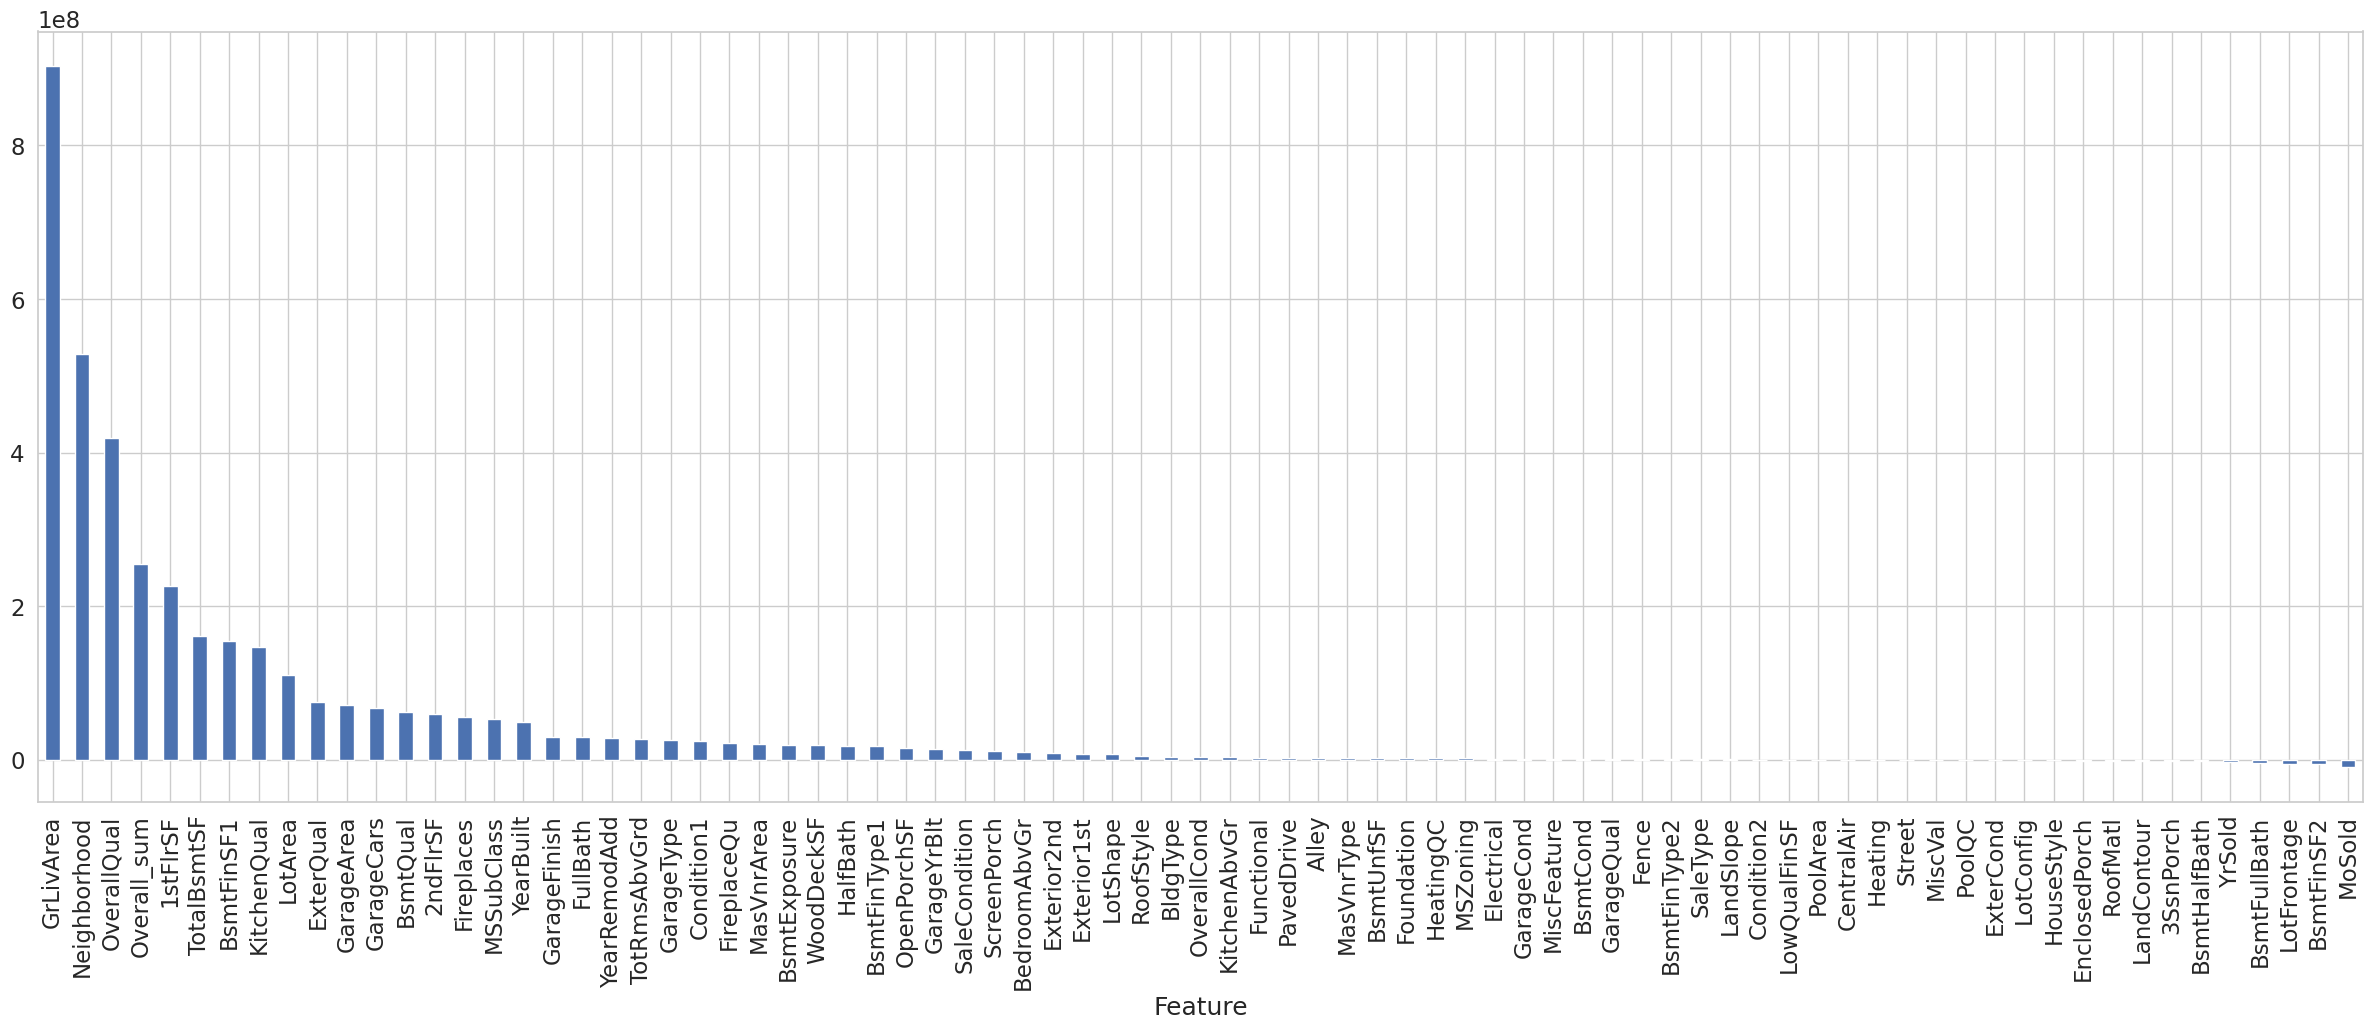

In [ ]:
# важности признаков, полученных методом permutation importance на тестовой выборке
accurate_fi = automl_ut.get_feature_scores('accurate', test_data)
accurate_fi.set_index('Feature')['Importance'].plot.bar(figsize = (30, 10), grid = True)
plt.show()

## Резюме

метрика MAE значительно улучшилась при использовании TabularUtilizedAutoML

**было**:
```
test_MAE 15337.9892578125
```

Модель TabularAutoML:
```
Model description:
Final prediction for new objects (level 0) =
	 0.09655 * (4 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) +
	 0.19597 * (4 averaged models Lvl_0_Pipe_1_Mod_0_LightGBM) +
	 0.70748 * (4 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost)
```


**стало**:
```
test_MAE 15045.943359375
```

**Итоговая модель TabularUtilizedAutoML**
```
Model description:
Final prediction for new objects (level 0) =
	 0.44803 * (4 averaged models Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM) +
	 0.55197 * (4 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost)
```

**ТОП-5 самых важных признаков для модели:**
1. 'GrLivArea',
2. 'Neighborhood',
3. 'OverallQual',
4. 'Overall_sum',
5. '1stFlrSF'

